In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ComplexUpset)

In [3]:
library(ggrepel)

In [4]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: 'Co

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [6]:
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_protein_list.csv')
hpath_df = read.csv(hpath_fname)


# Enrichment of differentially expressed proteins and transcripts

Compare DE genes and DE proteins and run enrichment for all

In [7]:
rnaseq_dpath = file.path('..', 'RNASEQ', 'DE_results')
list.files(rnaseq_dpath)


[1] "HOT1A3_DE_DESEQ_longterm_results.csv"       
 [2] "HOT1A3_DE_DESEQ_results.csv"                
 [3] "HOT1A3_DE_DESEQ_results_ref_vs_long.csv"    
 [4] "HOT1A3_DE_DESEQ_vsd.csv"                    
 [5] "HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv"
 [6] "HOT1A3_GOSEQ_results_ref_vs_long.csv"       
 [7] "MED4_DE_DESEQ_longterm_results.csv"         
 [8] "MED4_DE_DESEQ_results.csv"                  
 [9] "MED4_DE_DESEQ_results_ref_vs_long.csv"      
[10] "MED4_DE_DESEQ_vsd.csv"                      
[11] "MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv"  
[12] "MED4_GOSEQ_results_ref_vs_long.csv"

In [8]:
proteome_dpath = file.path('..', 'Proteome', 'data')
list.files(proteome_dpath)


[1] "A_axenic_proteome.txt"                                                                          
 [2] "A_axenic_proteome_norm.txt"                                                                     
 [3] "ALT_Axenic_DE.csv"                                                                              
 [4] "ALT_CC_DE.csv"                                                                                  
 [5] "C_ALT_proteome.txt"                                                                             
 [6] "C_ALT_proteome_norm.txt"                                                                        
 [7] "C_PRO_proteome.txt"                                                                             
 [8] "C_PRO_proteome_norm.txt"                                                                        
 [9] "Nov22_Processing.xlsx"                                                                          
[10] "P_axenic_proteome.txt"                                                                          
[11] "P_axenic_proteome_norm.txt"                                                                     
[12] "PRO_Axenic_DE.csv"                                                                              
[13] "PRO_CC_DE.csv"                                                                                  
[14] "uniprot-compressed_true_download_true_fields_accession_2Cid_2Cprotei-2023.01.11-12.43.22.99.txt"

In [9]:
df_rnaseq1 = read.csv(file.path(rnaseq_dpath,'MED4_DE_DESEQ_longterm_results.csv'))  %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

df_rnaseq2 = read.csv(file.path(rnaseq_dpath,'MED4_DE_DESEQ_results.csv')) %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

In [10]:
unique(df_rnaseq2$contrast)

[1] "P2vsP1" "C1vsP1" "C2vsC1" "C3vsC1" "C4vsC1" "C5vsC1" "C3vsC2" "C4vsC3"
 [9] "C5vsC3" "C5vsC4"

In [11]:
df_prot1 = read.csv(file.path(proteome_dpath,'PRO_CC_DE.csv'))
df_prot2 = read.csv(file.path(proteome_dpath,'PRO_Axenic_DE.csv'))

In [12]:
names(df_rnaseq1)
names(df_rnaseq2)
names(df_prot1)
names(df_prot2)



[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "X"            "logFC"        "AveExpr"      "t"            "P.Value"     
 [6] "adj.P.Val"    "B"            "gene"         "count"        "sca.t"       
[11] "sca.P.Value"  "sca.adj.pval" "contrast"     "log.sca.pval"

[1] "X"            "logFC"        "AveExpr"      "t"            "P.Value"     
 [6] "adj.P.Val"    "B"            "gene"         "count"        "sca.t"       
[11] "sca.P.Value"  "sca.adj.pval" "contrast"     "log.sca.pval"

In [13]:
dput(unique(df_prot1$contrast))
dput(unique(df_prot2$contrast))
dput(unique(df_rnaseq1$contrast))
dput(unique(df_rnaseq2$contrast))


c("C2 - C1", "C3 - C1", "C4 - C1", "C5 - C1", "C3 - C2", "C4 - C2", 
"C5 - C2", "C4 - C3", "C5 - C3", "C5 - C4", "Clongterm - C1", 
"Clongterm - C2", "Clongterm - C3")
c("P2 - P1", "P3 - P1", "P5 - P1", "Plongterm - P1", "Plongterm - P2"
)
c("longtermvsP1", "longtermvsP2", "longtermvsC1", "longtermvsC2", 
"longtermvsC3")
c("P2vsP1", "C1vsP1", "C2vsC1", "C3vsC1", "C4vsC1", "C5vsC1", 
"C3vsC2", "C4vsC3", "C5vsC3", "C5vsC4")


In [14]:
dp1 = df_prot1 %>%  select(
    'contrast','gene','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval', 'protein_id'='gene') %>%
    mutate(Assay = 'Proteome')
dp2 = df_prot2 %>%  select(
    'contrast','gene','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval', 'protein_id'='gene')%>%
    mutate(Assay = 'Proteome')


In [15]:
dr1 = df_rnaseq1 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
dr2 = df_rnaseq2 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
    


In [16]:
lookup <- c(
    "C2 - C1" = 'C2vsC1_prot', 
    "C3 - C1" = 'C3vsC1_prot', 
    "C4 - C1" = 'C4vsC1_prot', 
    "C5 - C1" = 'C5vsC1_prot',

    "C3 - C2" = 'C3vsC2_prot', 
    "C4 - C2" = 'C4vsC2_prot', 
    "C5 - C2" = 'C5vsC2_prot', 

    "C4 - C3" = 'C4vsC3_prot', 
    "C5 - C3" = 'C5vsC3_prot', 
    "C5 - C4" = 'C5vsC4_prot', 

    "Clongterm - C1" = 'LATEvsC1_prot', 
    "Clongterm - C2" = 'LATEvsC2_prot', 
    "Clongterm - C3" = 'LATEvsC3_prot', 
    
    "P2 - P1" = 'P2vsP1_prot',
    "P3 - P1" = 'P3vsP1_prot',
    "P5 - P1" = 'P5vsP1_prot',
    "Plongterm - P1" = 'LATEvsP1_prot', 
    "Plongterm - P2" = 'LATEvsP2_prot', 
    "Intercept" = "Intercept",

    "longtermvsP1" = 'LATEvsP1_rna', 
    "longtermvsP2" = 'LATEvsP2_rna', 
    "longtermvsC1" = 'LATEvsC1_rna', 
    "longtermvsC2" = 'LATEvsC2_rna', 
    "longtermvsC3" = 'LATEvsC3_rna', 

    "P2vsP1" = 'P2vsP1_rna', 
    "C1vsP1" = 'C1vsP1_rna', 
    "C2vsC1" = 'C2vsC1_rna', 
    "C3vsC1" = 'C3vsC1_rna', 
    "C4vsC1" = 'C4vsC1_rna', 
    "C5vsC1" = 'C5vsC1_rna',
    "C3vsC2" = 'C3vsC2_rna', 
    "C4vsC3" = 'C4vsC3_rna',
    "C5vsC3" = 'C5vsC3_rna',
    "C5vsC4" = 'C5vsC4_rna'
)
    
    


In [17]:
dr1 = dr1 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dr2 = dr2 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dp1 = dp1 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')
dp2 = dp2 %>% mutate(contrast1 = lookup[contrast]) %>% filter(contrast != 'Intercept')


In [18]:
names(hpath_df)

[1] "Name"               "gene"               "locus_tag"         
 [4] "old_locus_tag"      "source"             "start"             
 [7] "end"                "strand"             "Note"              
[10] "exception"          "inference"          "product"           
[13] "protein_id"         "gene_length"        "path_id"           
[16] "main"               "sub"                "path"              
[19] "ecpath"             "Category"           "Membrane.transport"
[22] "kegg_gene1"         "kegg_gene2"

In [19]:
dp1 = left_join(dp1, hpath_df, by='protein_id') %>% mutate(gene_id = locus_tag)
dp2 = left_join(dp2, hpath_df, by='protein_id') %>% mutate(gene_id = locus_tag)


In [20]:
names(dp1)# %>% mutate(gene_id = locus_tag)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Name"              
[10] "gene"               "locus_tag"          "old_locus_tag"     
[13] "source"             "start"              "end"               
[16] "strand"             "Note"               "exception"         
[19] "inference"          "product"            "gene_length"       
[22] "path_id"            "main"               "sub"               
[25] "path"               "ecpath"             "Category"          
[28] "Membrane.transport" "kegg_gene1"         "kegg_gene2"        
[31] "gene_id"

In [21]:
 dr1 = left_join(dr1, hpath_df, by=c('gene_id'='locus_tag'))
 dr2 = left_join(dr2, hpath_df, by=c('gene_id'='locus_tag'))
 


In [22]:
df_all = bind_rows(dp1, dp2, dr1, dr2)

In [23]:
df_all = df_all %>% 
    mutate(
        Category = if_else(is.na(Category), 'Uncharacterized', Category),
        Category = if_else(Category == 'Poorly characterized', 'Uncharacterized', Category)
          )

In [24]:
dput(unique(df_all$contrast))

c("C2 - C1", "C3 - C1", "C4 - C1", "C5 - C1", "C3 - C2", "C4 - C2", 
"C5 - C2", "C4 - C3", "C5 - C3", "C5 - C4", "Clongterm - C1", 
"Clongterm - C2", "Clongterm - C3", "P2 - P1", "P3 - P1", "P5 - P1", 
"Plongterm - P1", "Plongterm - P2", "longtermvsP1", "longtermvsP2", 
"longtermvsC1", "longtermvsC2", "longtermvsC3", "P2vsP1", "C1vsP1", 
"C2vsC1", "C3vsC1", "C4vsC1", "C5vsC1", "C3vsC2", "C4vsC3", "C5vsC3", 
"C5vsC4")


In [25]:
df_all %>% count(contrast1, contrast,  .drop = FALSE)


contrast1     contrast       n   
1  C1vsP1_rna    C1vsP1         1855
2  C2vsC1_prot   C2 - C1        1424
3  C2vsC1_rna    C2vsC1         1855
4  C3vsC1_prot   C3 - C1        1424
5  C3vsC1_rna    C3vsC1         1855
6  C3vsC2_prot   C3 - C2        1424
7  C3vsC2_rna    C3vsC2         1855
8  C4vsC1_prot   C4 - C1        1424
9  C4vsC1_rna    C4vsC1         1855
10 C4vsC2_prot   C4 - C2        1424
11 C4vsC3_prot   C4 - C3        1424
12 C4vsC3_rna    C4vsC3         1855
13 C5vsC1_prot   C5 - C1        1424
14 C5vsC1_rna    C5vsC1         1855
15 C5vsC2_prot   C5 - C2        1424
16 C5vsC3_prot   C5 - C3        1424
17 C5vsC3_rna    C5vsC3         1855
18 C5vsC4_prot   C5 - C4        1424
19 C5vsC4_rna    C5vsC4         1855
20 LATEvsC1_prot Clongterm - C1 1424
21 LATEvsC1_rna  longtermvsC1   1855
22 LATEvsC2_prot Clongterm - C2 1424
23 LATEvsC2_rna  longtermvsC2   1855
24 LATEvsC3_prot Clongterm - C3 1424
25 LATEvsC3_rna  longtermvsC3   1855
26 LATEvsP1_prot Plongterm - P1 1424
27 LATEvsP1_rna  longtermvsP1   1855
28 LATEvsP2_prot Plongterm - P2 1424
29 LATEvsP2_rna  longtermvsP2   1855
30 P2vsP1_prot   P2 - P1        1424
31 P2vsP1_rna    P2vsP1         1855
32 P3vsP1_prot   P3 - P1        1424
33 P5vsP1_prot   P5 - P1        1424

# GOSEQ

In [26]:
names(df_all)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Name"              
[10] "gene"               "locus_tag"          "old_locus_tag"     
[13] "source"             "start"              "end"               
[16] "strand"             "Note"               "exception"         
[19] "inference"          "product"            "gene_length"       
[22] "path_id"            "main"               "sub"               
[25] "path"               "ecpath"             "Category"          
[28] "Membrane.transport" "kegg_gene1"         "kegg_gene2"        
[31] "gene_id"

In [27]:
df_all = df_all %>% 
    mutate(
        down = ((logFC < 0) & (padj < 0.05)),
        up   = ((logFC > 0) & (padj < 0.05)),
        is_de   = (padj < 0.05),
)

In [28]:
kegg_fname = file.path('..', 'genomes', 'MED4', 'MED4_pathways_category.csv')
kegg_df = read.csv(kegg_fname)


In [29]:
kegg_df = left_join(kegg_df, hpath_df %>% select(locus_tag, protein_id), 
          by='protein_id', multiple = "all") %>% 
    mutate(gene_id=locus_tag)

In [30]:
t(kegg_df)

[,1]                                     
protein_id         WP_002805124.1                           
path_id            K02710                                   
main               09100 Metabolism                         
sub                09102 Energy metabolism                  
path               00195 Photosynthesis [PATH:ko00195]      
ecpath             K02710  psbI; photosystem II PsbI protein
Category           Photosynthesis/Carbon fixation           
Membrane.transport                                          
locus_tag          TX50_RS01310                             
gene_id            TX50_RS01310                             
                   [,2]                                      
protein_id         WP_002805124.1                            
path_id            K02710                                    
main               09180 Brite Hierarchies                   
sub                09181 Protein families: metabolism        
path               00194 Photosynthesis proteins [BR:ko00194]
ecpath             K02710  psbI; photosystem II PsbI protein 
Category           Photosynthesis/Carbon fixation            
Membrane.transport                                           
locus_tag          TX50_RS01310                              
gene_id            TX50_RS01310                              
                   [,3]                                                         
protein_id         WP_002805169.1                                               
path_id            K02110                                                       
main               09100 Metabolism                                             
sub                09102 Energy metabolism                                      
path               00190 Oxidative phosphorylation [PATH:ko00190]               
ecpath             K02110  ATPF0C, atpE; F-type H+-transporting ATPase subunit c
Category           Energy/Carbohydrate/Glycan                                   
Membrane.transport                                                              
locus_tag          TX50_RS07825                                                 
gene_id            TX50_RS07825                                                 
                   [,4]                                                         
protein_id         WP_002805169.1                                               
path_id            K02110                                                       
main               09100 Metabolism                                             
sub                09102 Energy metabolism                                      
path               00195 Photosynthesis [PATH:ko00195]                          
ecpath             K02110  ATPF0C, atpE; F-type H+-transporting ATPase subunit c
Category           Photosynthesis/Carbon fixation                               
Membrane.transport                                                              
locus_tag          TX50_RS07825                                                 
gene_id            TX50_RS07825                                                 
                   [,5]                                                         
protein_id         WP_002805169.1                                               
path_id            K02110                                                       
main               09180 Brite Hierarchies                                      
sub                09181 Protein families: metabolism                           
path               00194 Photosynthesis proteins [BR:ko00194]                   
ecpath             K02110  ATPF0C, atpE; F-type H+-transporting ATPase subunit c
Category           Photosynthesis/Carbon fixation                               
Membrane.transport                                                              
locus_tag          TX50_RS07825                                                 
gene_id            TX50_RS07825                                           

In [31]:
ignore_main = c('09160 Human Diseases', 
                '09150 Organismal Systems', 
                #'09190 Not Included in Pathway or Brite', 
                #'09180 Brite Hierarchies',
                ''
               )

In [32]:
run_enrichment <- function(contrastname, encolname, testcolname) {
    #cat_df = path_df %>% select(encolname, main) %>% distinct()    
    mpath_df = kegg_df %>%
       filter(!main %in% ignore_main)  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(PATH = word(PATH)) %>%
       distinct(PATH, gene_id, .keep_all= TRUE) %>%
       select(gene_id, PATH)
    test_df = df_all %>% drop_na(padj) %>% filter(contrast1 == contrastname)
    test_df$sigval = if_else(test_df[[testcolname]], 1, 0)
    DEgenes = test_df$sigval
    names(DEgenes) = test_df$gene_id
    #table(DEgenes)
    LENgenes = test_df$gene_length
    names(LENgenes) = test_df$gene_id
    pwf = nullp(DEgenes, bias.data=LENgenes)
    goseq_res = goseq(pwf, gene2cat = as.data.frame(mpath_df))
    goseq_res = goseq_res %>% filter(numInCat>=5) 
    goseq_res$padj = p.adjust(goseq_res$over_represented_pvalue, method="BH")
    goseq_res = goseq_res %>%
       relocate(padj, .after = over_represented_pvalue) #%>%
       #relocate(PATH, .after = category) 
    goseq_res$type = testcolname
    goseq_res$enrich = encolname
    goseq_res$contrast = contrastname
    goseq_res$organism = 'MED4'
    #return(mpath_df)
    return (goseq_res)
}

In [33]:
kegg_df

protein_id     path_id main                                      
1    WP_002805124.1 K02710  09100 Metabolism                          
2    WP_002805124.1 K02710  09180 Brite Hierarchies                   
3    WP_002805169.1 K02110  09100 Metabolism                          
4    WP_002805169.1 K02110  09100 Metabolism                          
5    WP_002805169.1 K02110  09180 Brite Hierarchies                   
6    WP_002805854.1 K01601  09100 Metabolism                          
7    WP_002805854.1 K01601  09100 Metabolism                          
8    WP_002806014.1 K02963  09120 Genetic Information Processing      
9    WP_002806014.1 K02963  09180 Brite Hierarchies                   
10   WP_002806486.1 K02970  09120 Genetic Information Processing      
11   WP_002806486.1 K02970  09180 Brite Hierarchies                   
12   WP_007099573.1 K02691  09100 Metabolism                          
13   WP_007099573.1 K02691  09180 Brite Hierarchies                   
14   WP_011131639.1 K02338  09120 Genetic Information Processing      
15   WP_011131639.1 K02338  09120 Genetic Information Processing      
16   WP_011131639.1 K02338  09120 Genetic Information Processing      
17   WP_011131639.1 K02338  09180 Brite Hierarchies                   
18   WP_011131639.1 K02338  09180 Brite Hierarchies                   
19   WP_011131641.1 K23269  09100 Metabolism                          
20   WP_011131642.1 K00764  09100 Metabolism                          
21   WP_011131642.1 K00764  09100 Metabolism                          
22   WP_011131642.1 K00764  09180 Brite Hierarchies                   
23   WP_011131643.1 K02469  09180 Brite Hierarchies                   
24   WP_011131643.1 K02469  09180 Brite Hierarchies                   
25   WP_011131645.1 K18979  09180 Brite Hierarchies                   
26   WP_011131648.1 K03110  09120 Genetic Information Processing      
27   WP_011131648.1 K03110  09130 Environmental Information Processing
28   WP_011131648.1 K03110  09140 Cellular Processes                  
29   WP_011131648.1 K03110  09180 Brite Hierarchies                   
30   WP_011131649.1 K07315  09180 Brite Hierarchies                   
⋮    ⋮              ⋮       ⋮                                         
1913 WP_225866751.1 K24180  09180 Brite Hierarchies                   
1914 WP_225866756.1 K02116  09180 Brite Hierarchies                   
1915 WP_225866764.1 K02259  09100 Metabolism                          
1916 WP_225866764.1 K02259  09100 Metabolism                          
1917 WP_225866764.1 K02259  09130 Environmental Information Processing
1918 WP_225866764.1 K02259  09180 Brite Hierarchies                   
1919 WP_225866765.1 K02634  09100 Metabolism                          
1920 WP_225866765.1 K02634  09180 Brite Hierarchies                   
1921 WP_225866766.1 K02884  09120 Genetic Information Processing      
1922 WP_225866766.1 K02884  09180 Brite Hierarchies                   
1923 WP_225866768.1 K04066  09120 Genetic Information Processing      
1924 WP_225866768.1 K04066  09180 Brite Hierarchies                   
1925 WP_225866770.1 K06883  09190 Not Included in Pathway or Brite    
1926 WP_225866771.1 K03795  09100 Metabolism                          
1927 WP_225866772.1 K03892  09180 Brite Hierarchies                   
1928 WP_225866775.1 K02005  09190 Not Included in Pathway or Brite    
1929 WP_225866779.1 K02294  09100 Metabolism                          
1930 WP_225866780.1 K05582  09100 Metabolism                          
1931 WP_225866782.1 K15576  09100 Metabolism                          
1932 WP_225866782.1 K15576  09130 Environmental Information Processing
1933 WP_225866782.1 K15576  09180 Brite Hierarchies                   
1934 WP_225866783.1 K03800  09100 Metabolism                          
1935 WP_225866786.1 K08678  09100 Metabolism                          
1936 WP_225866787.1 K03100  09120 Genetic Information Processing      
1937 WP_225866787.1 K03100  0

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version

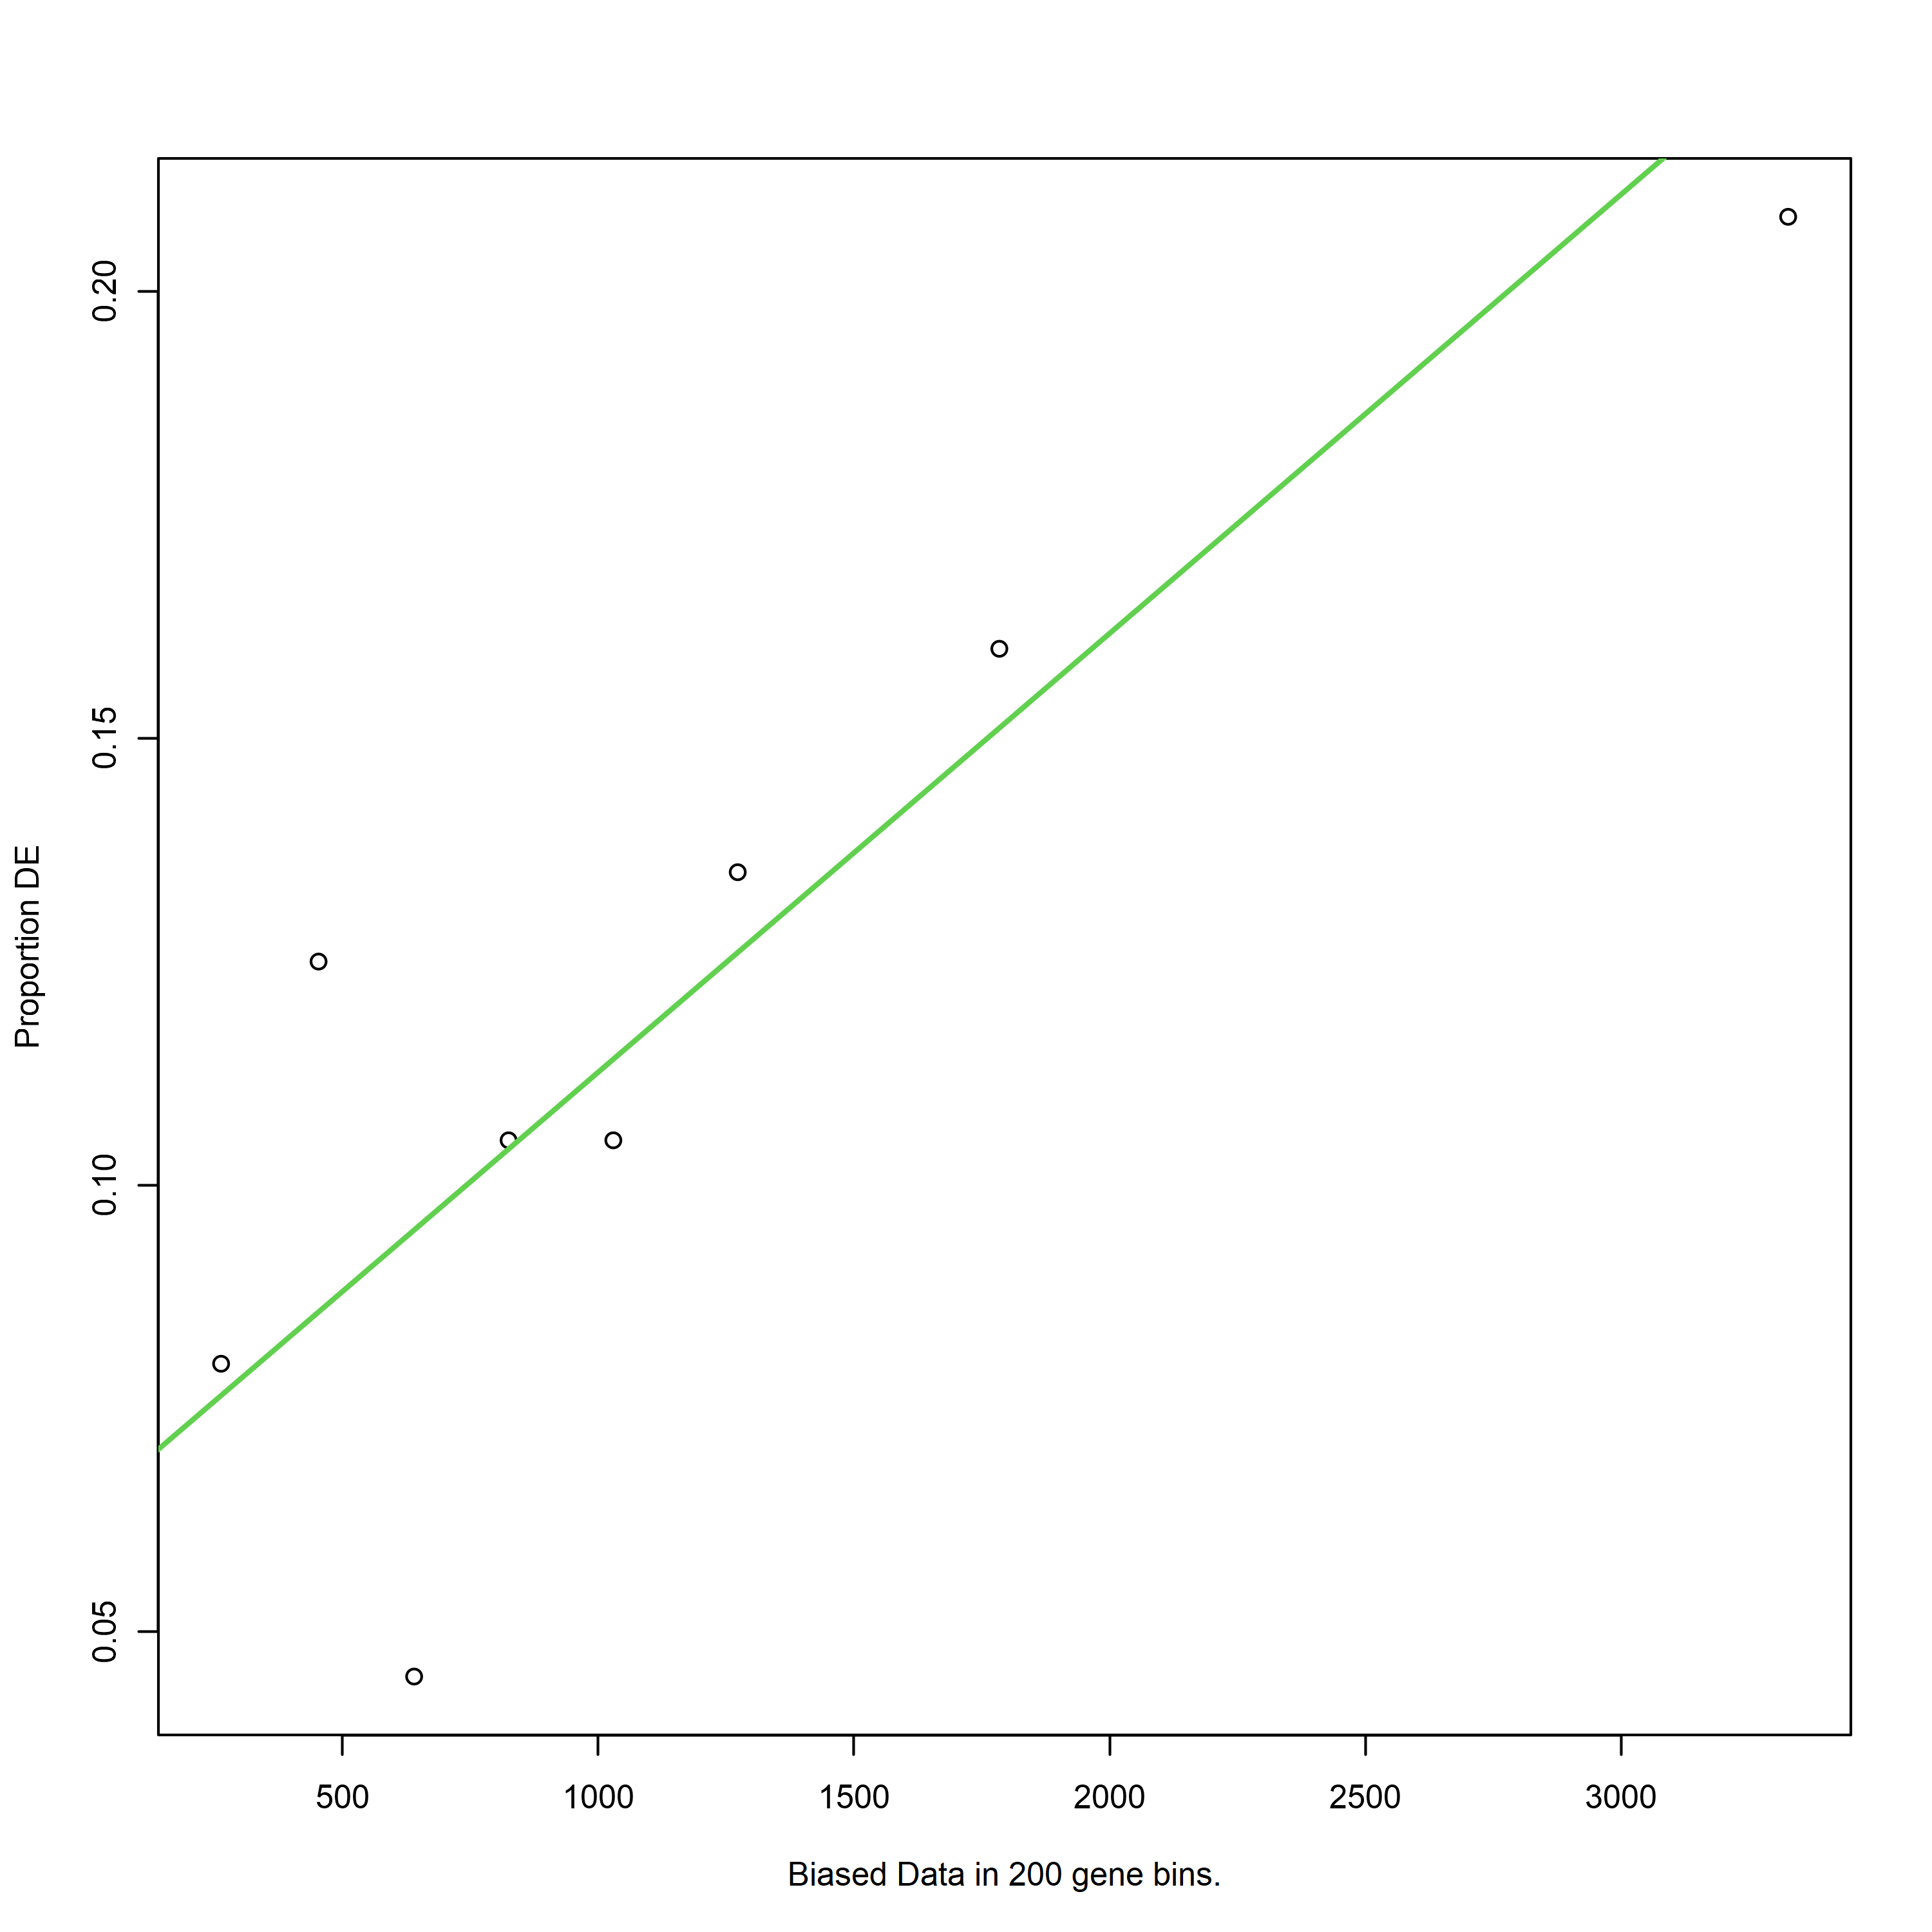

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


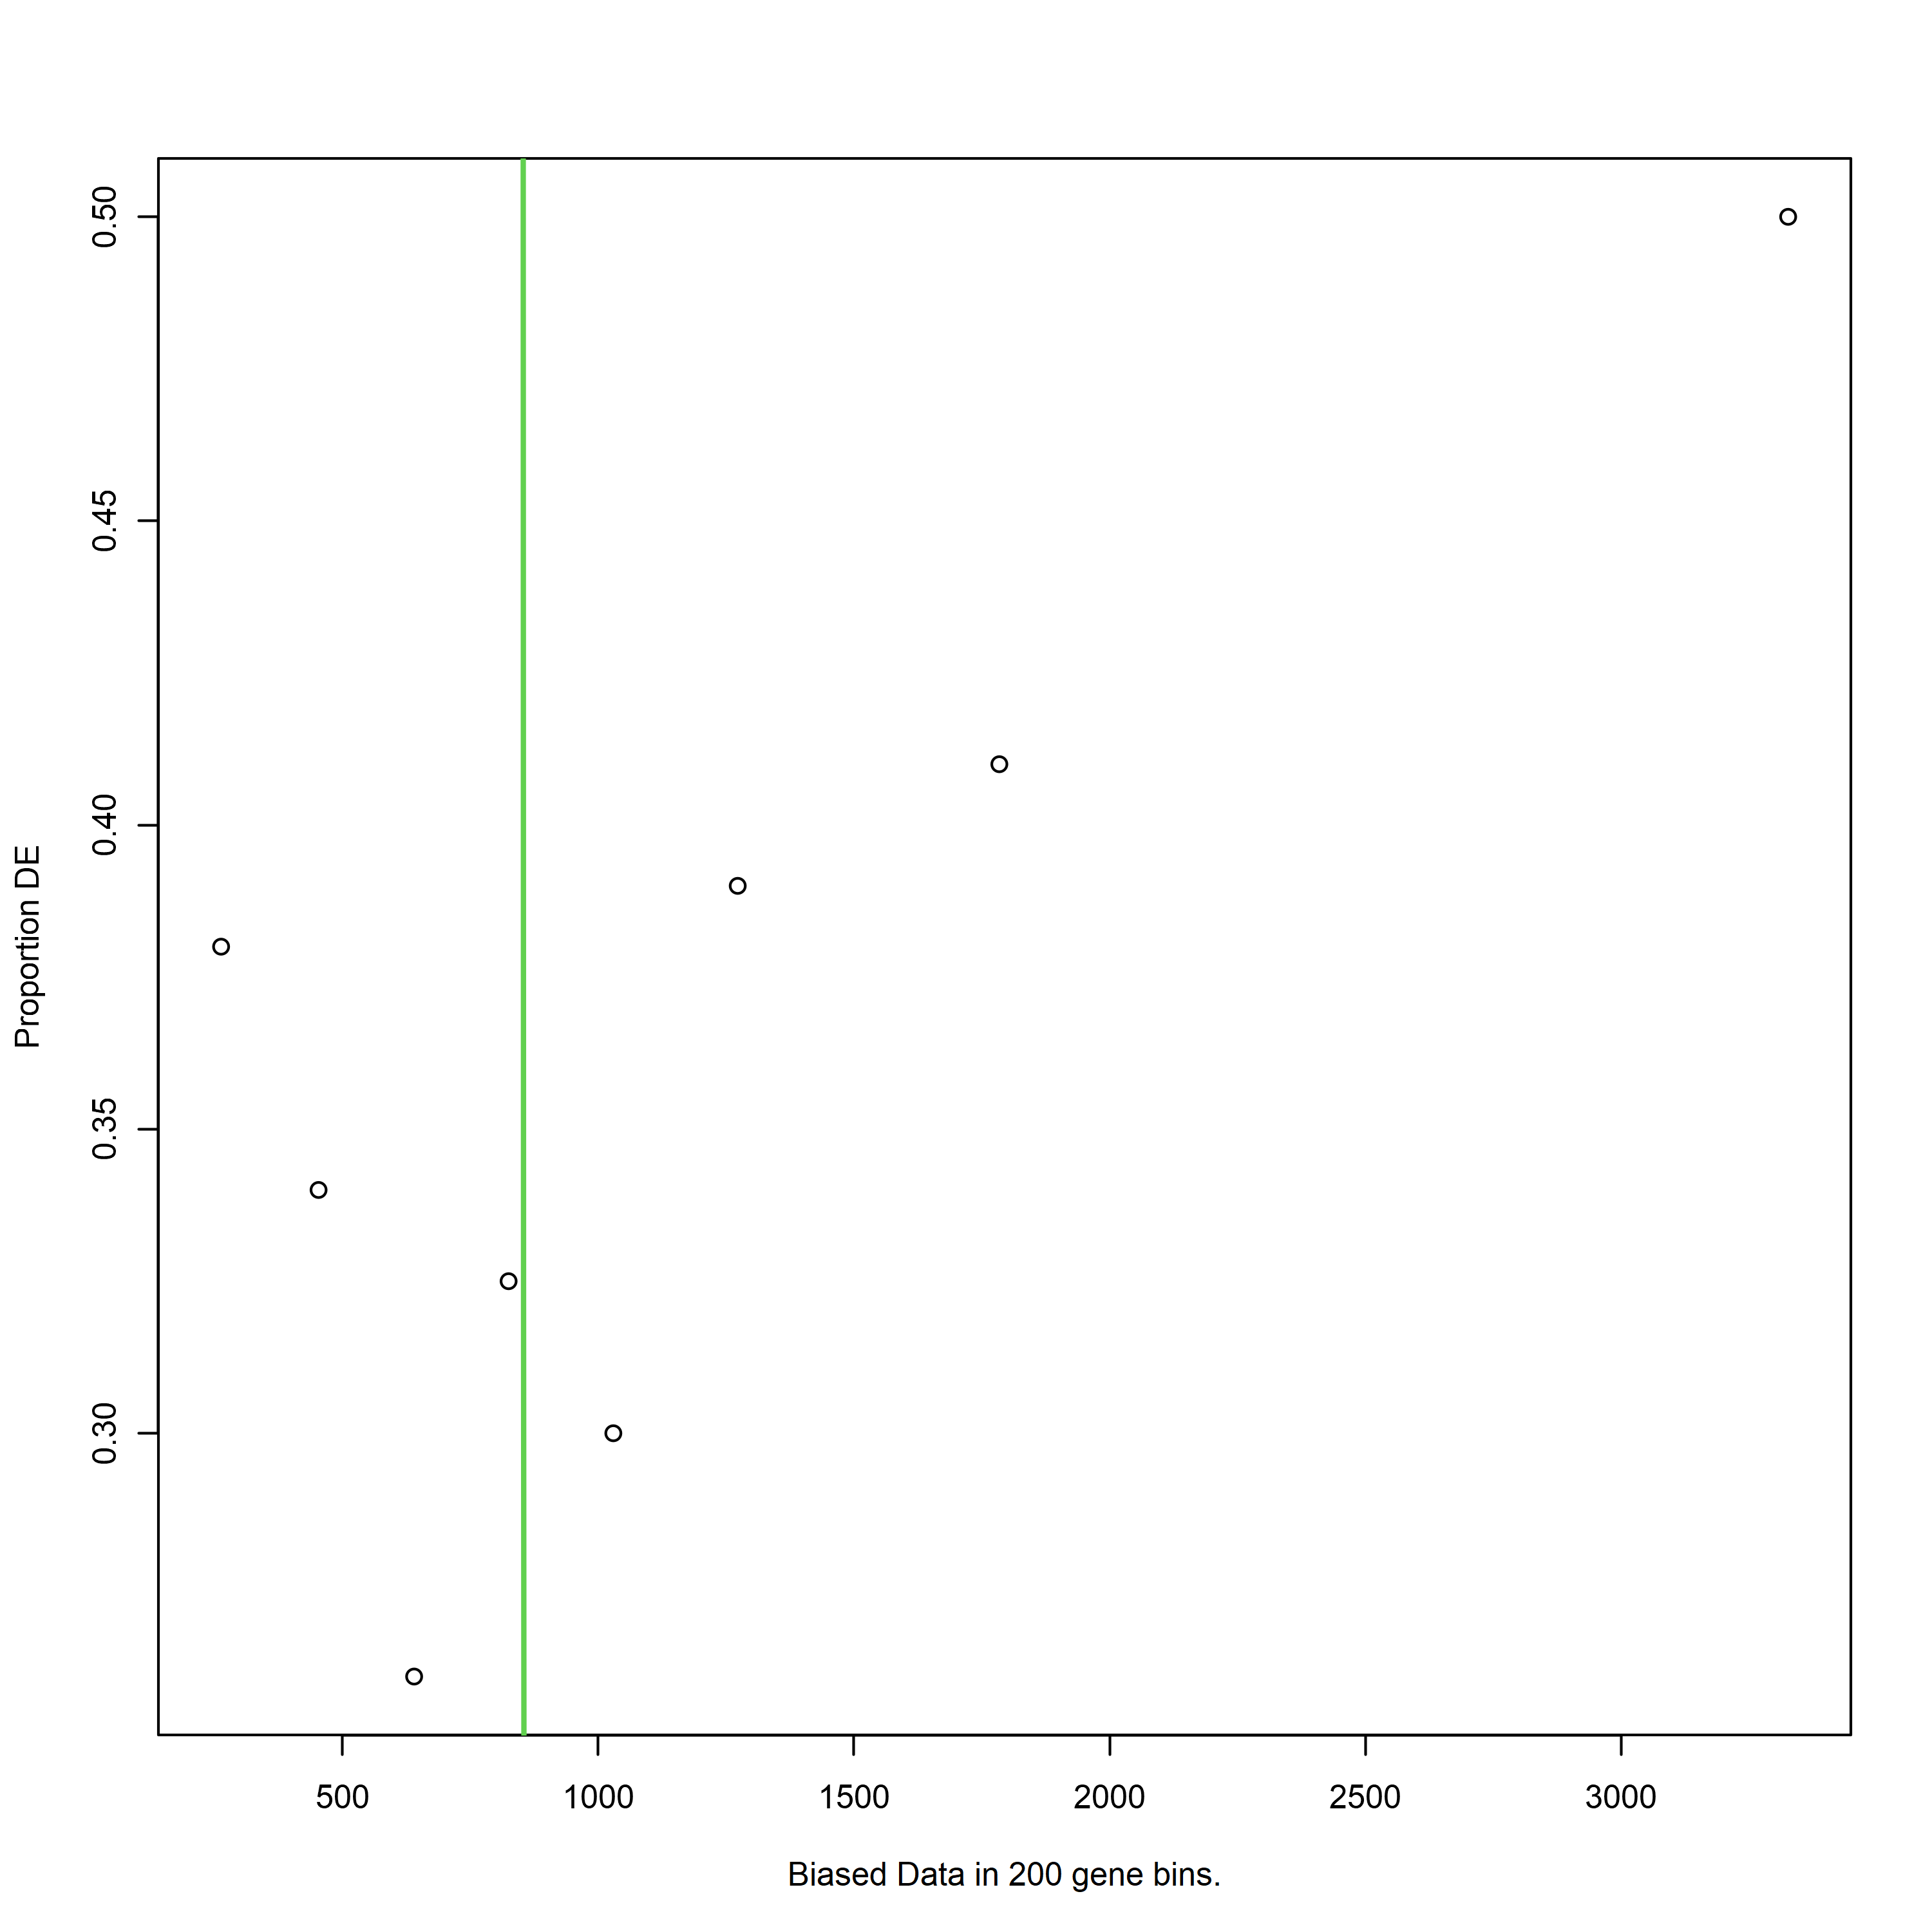

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


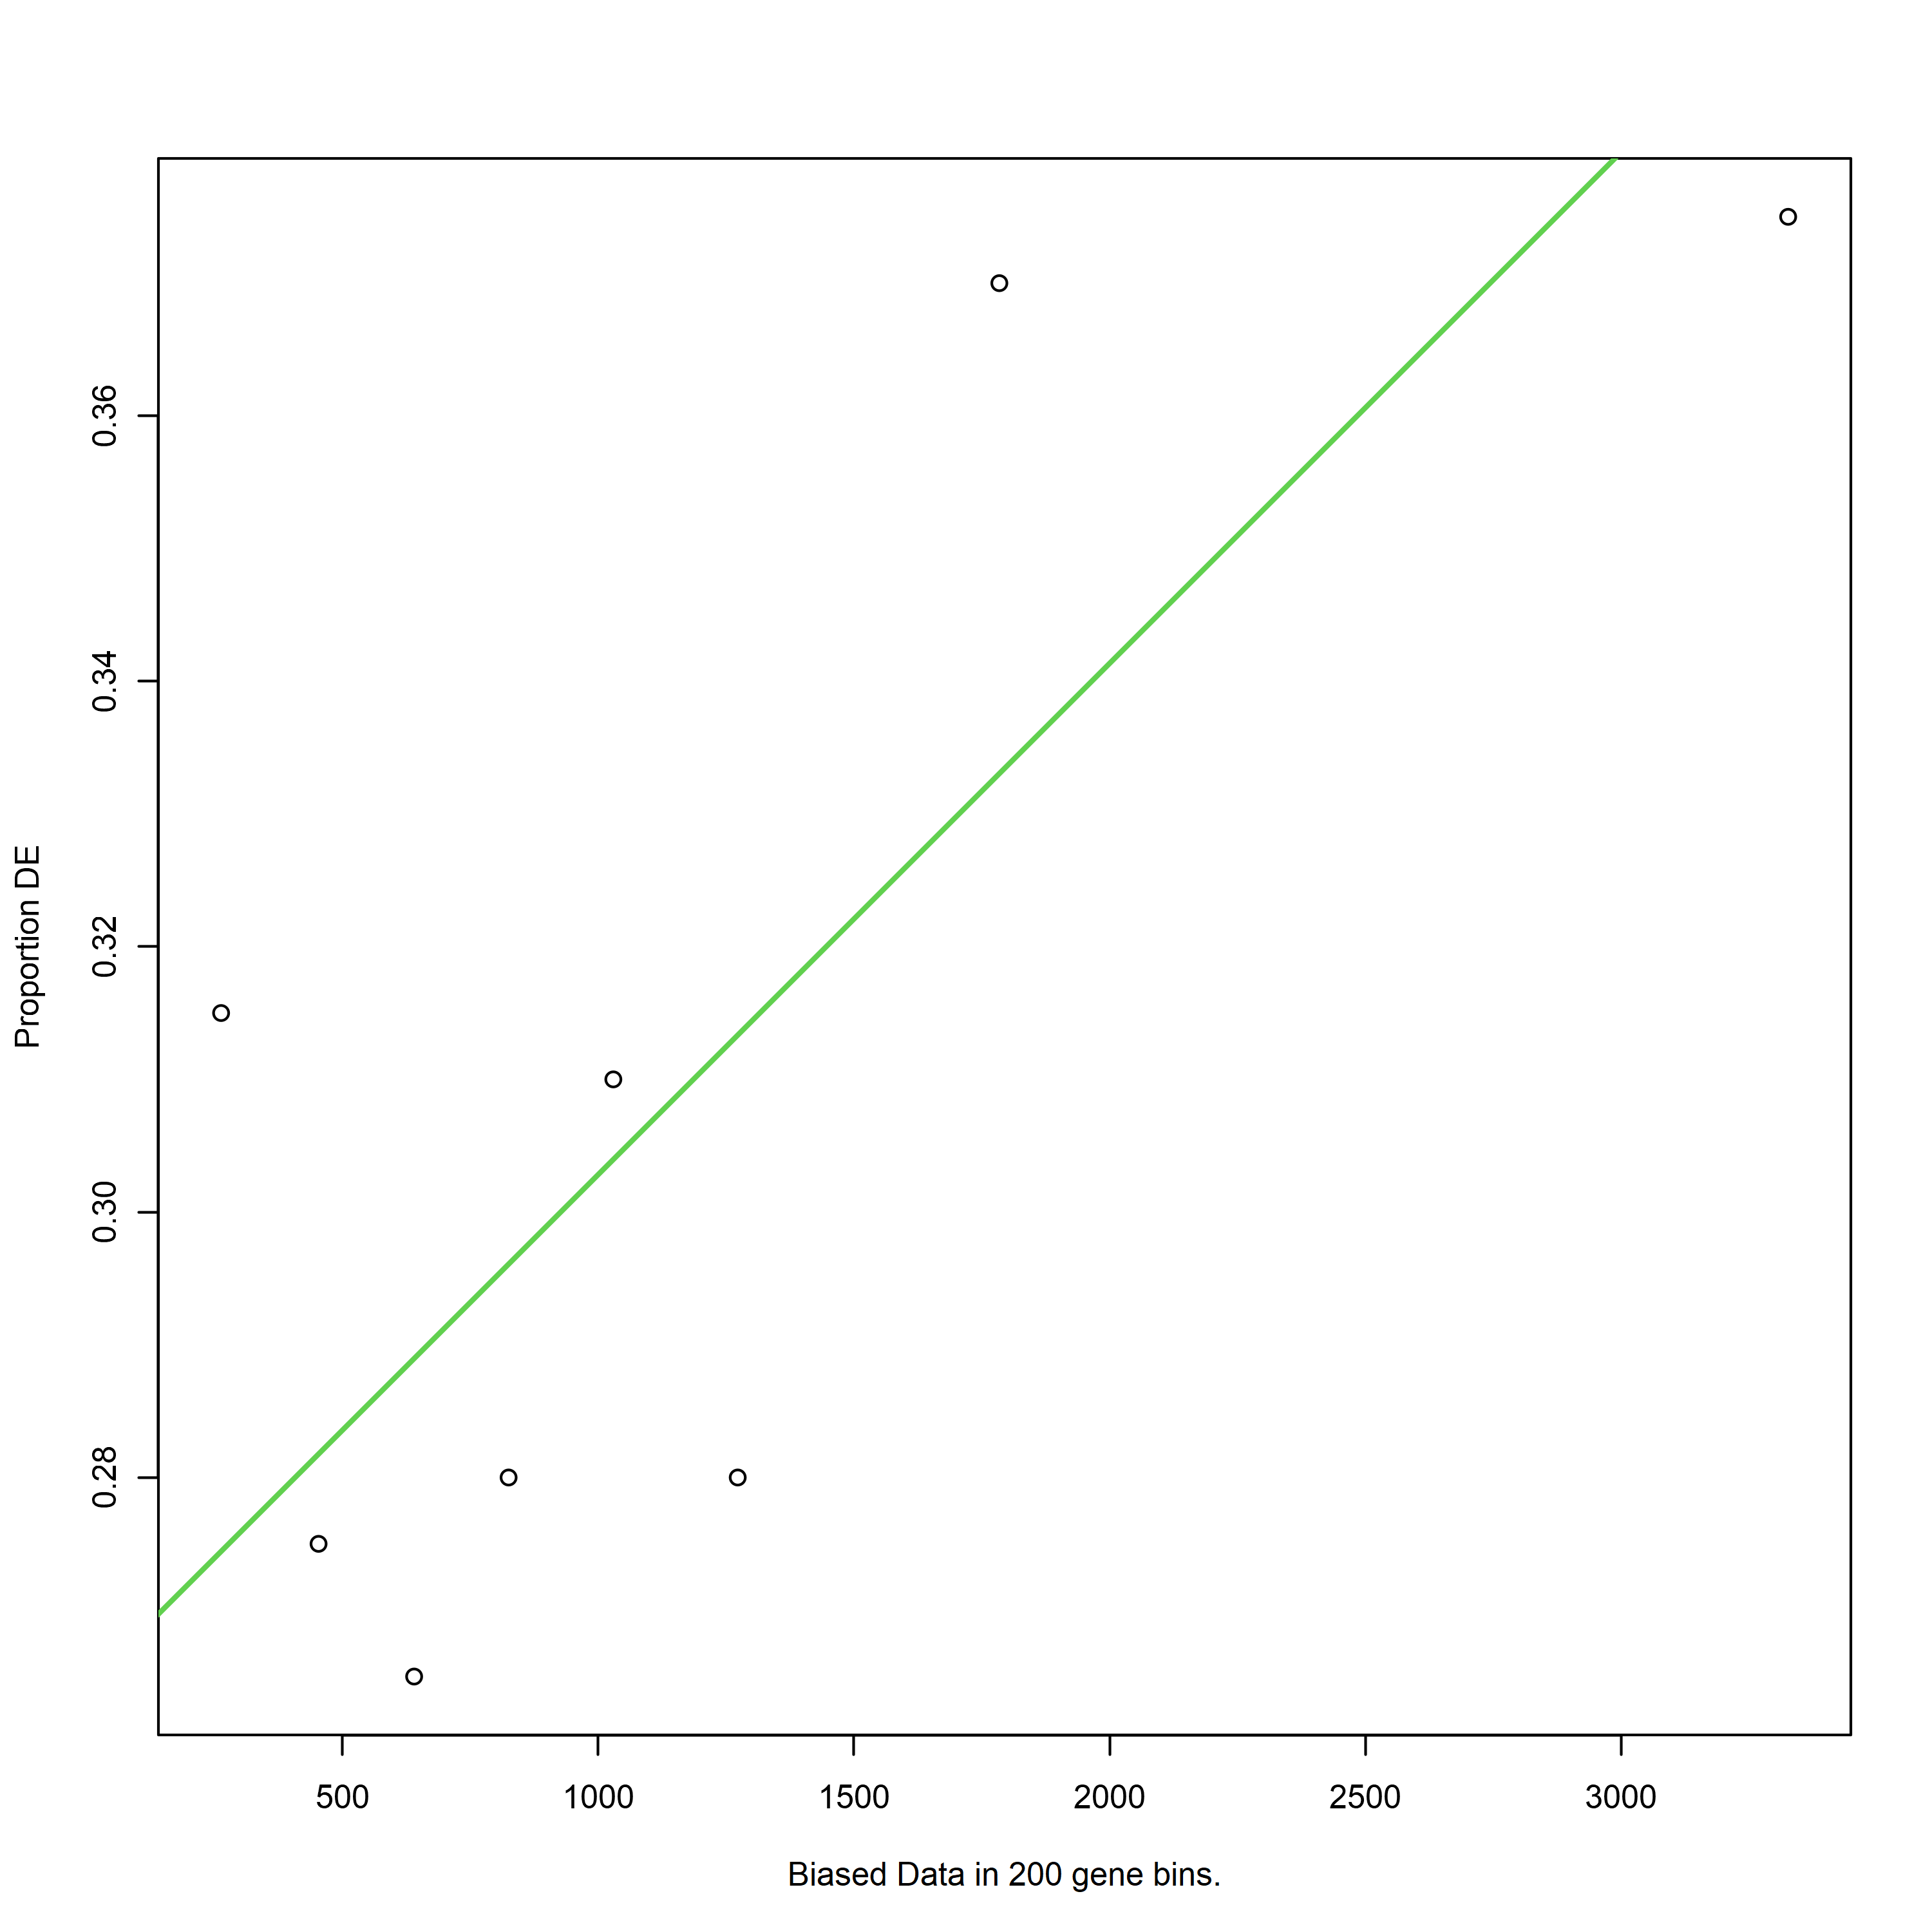

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


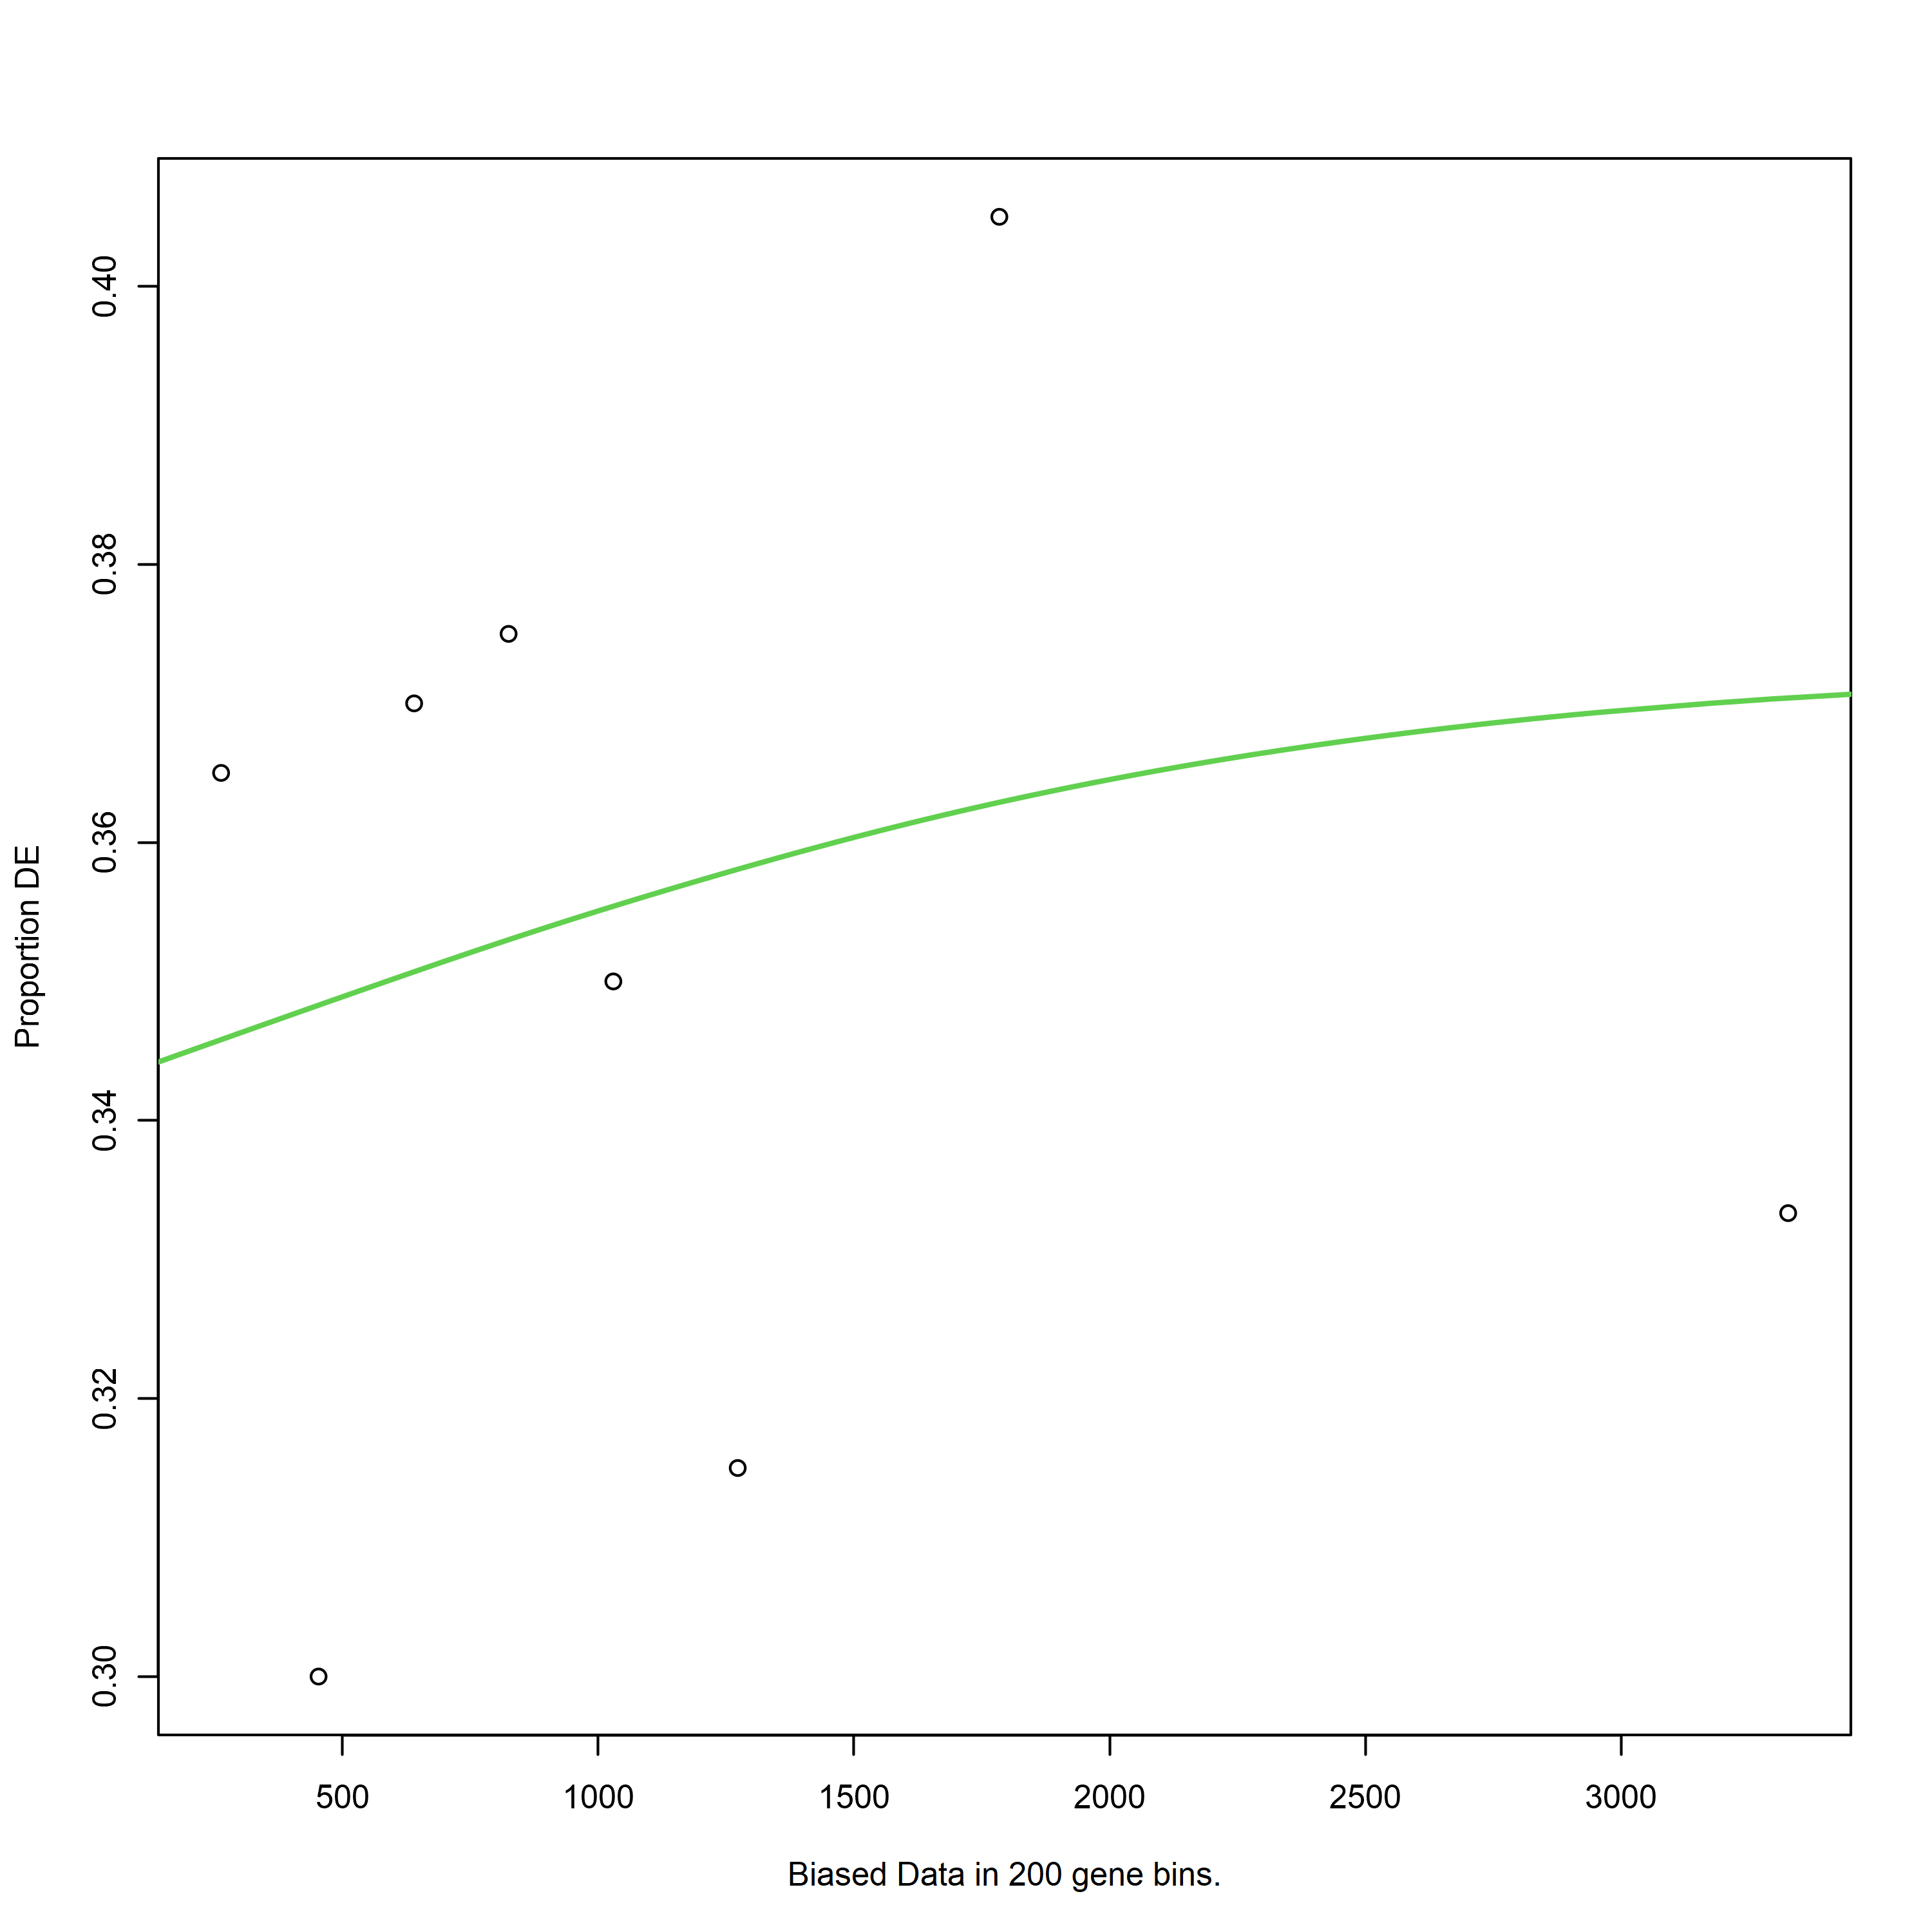

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


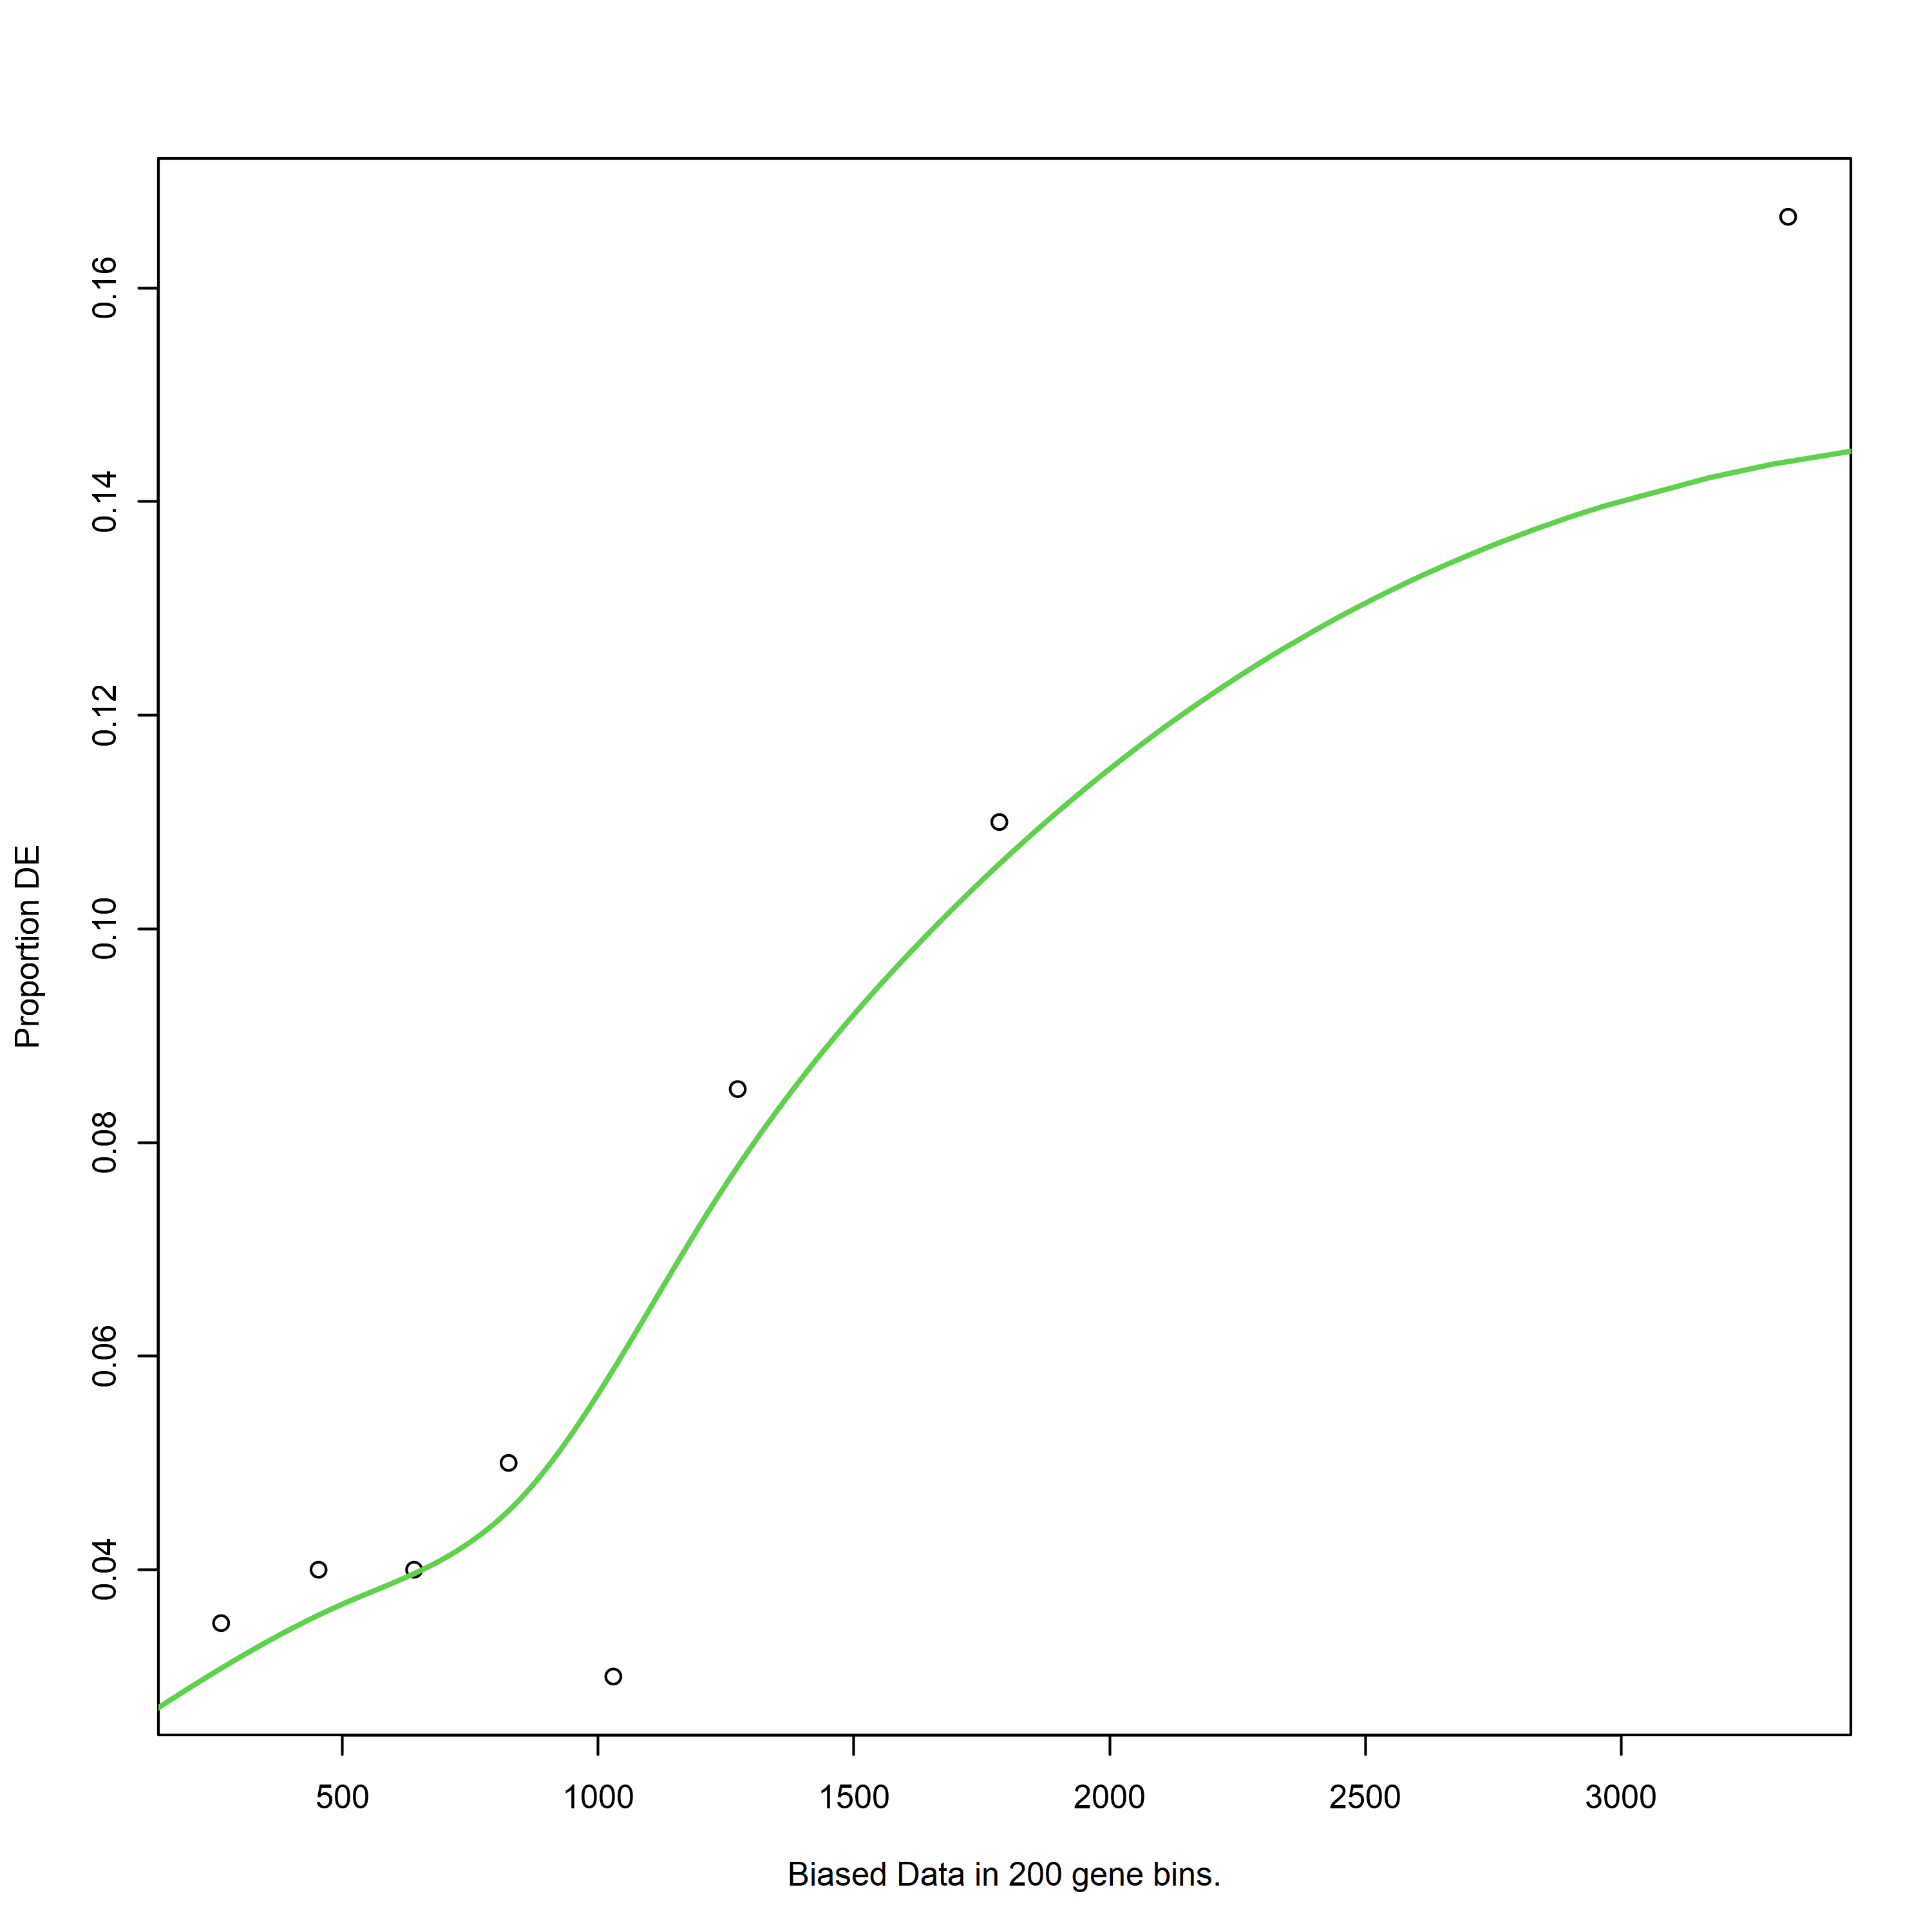

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


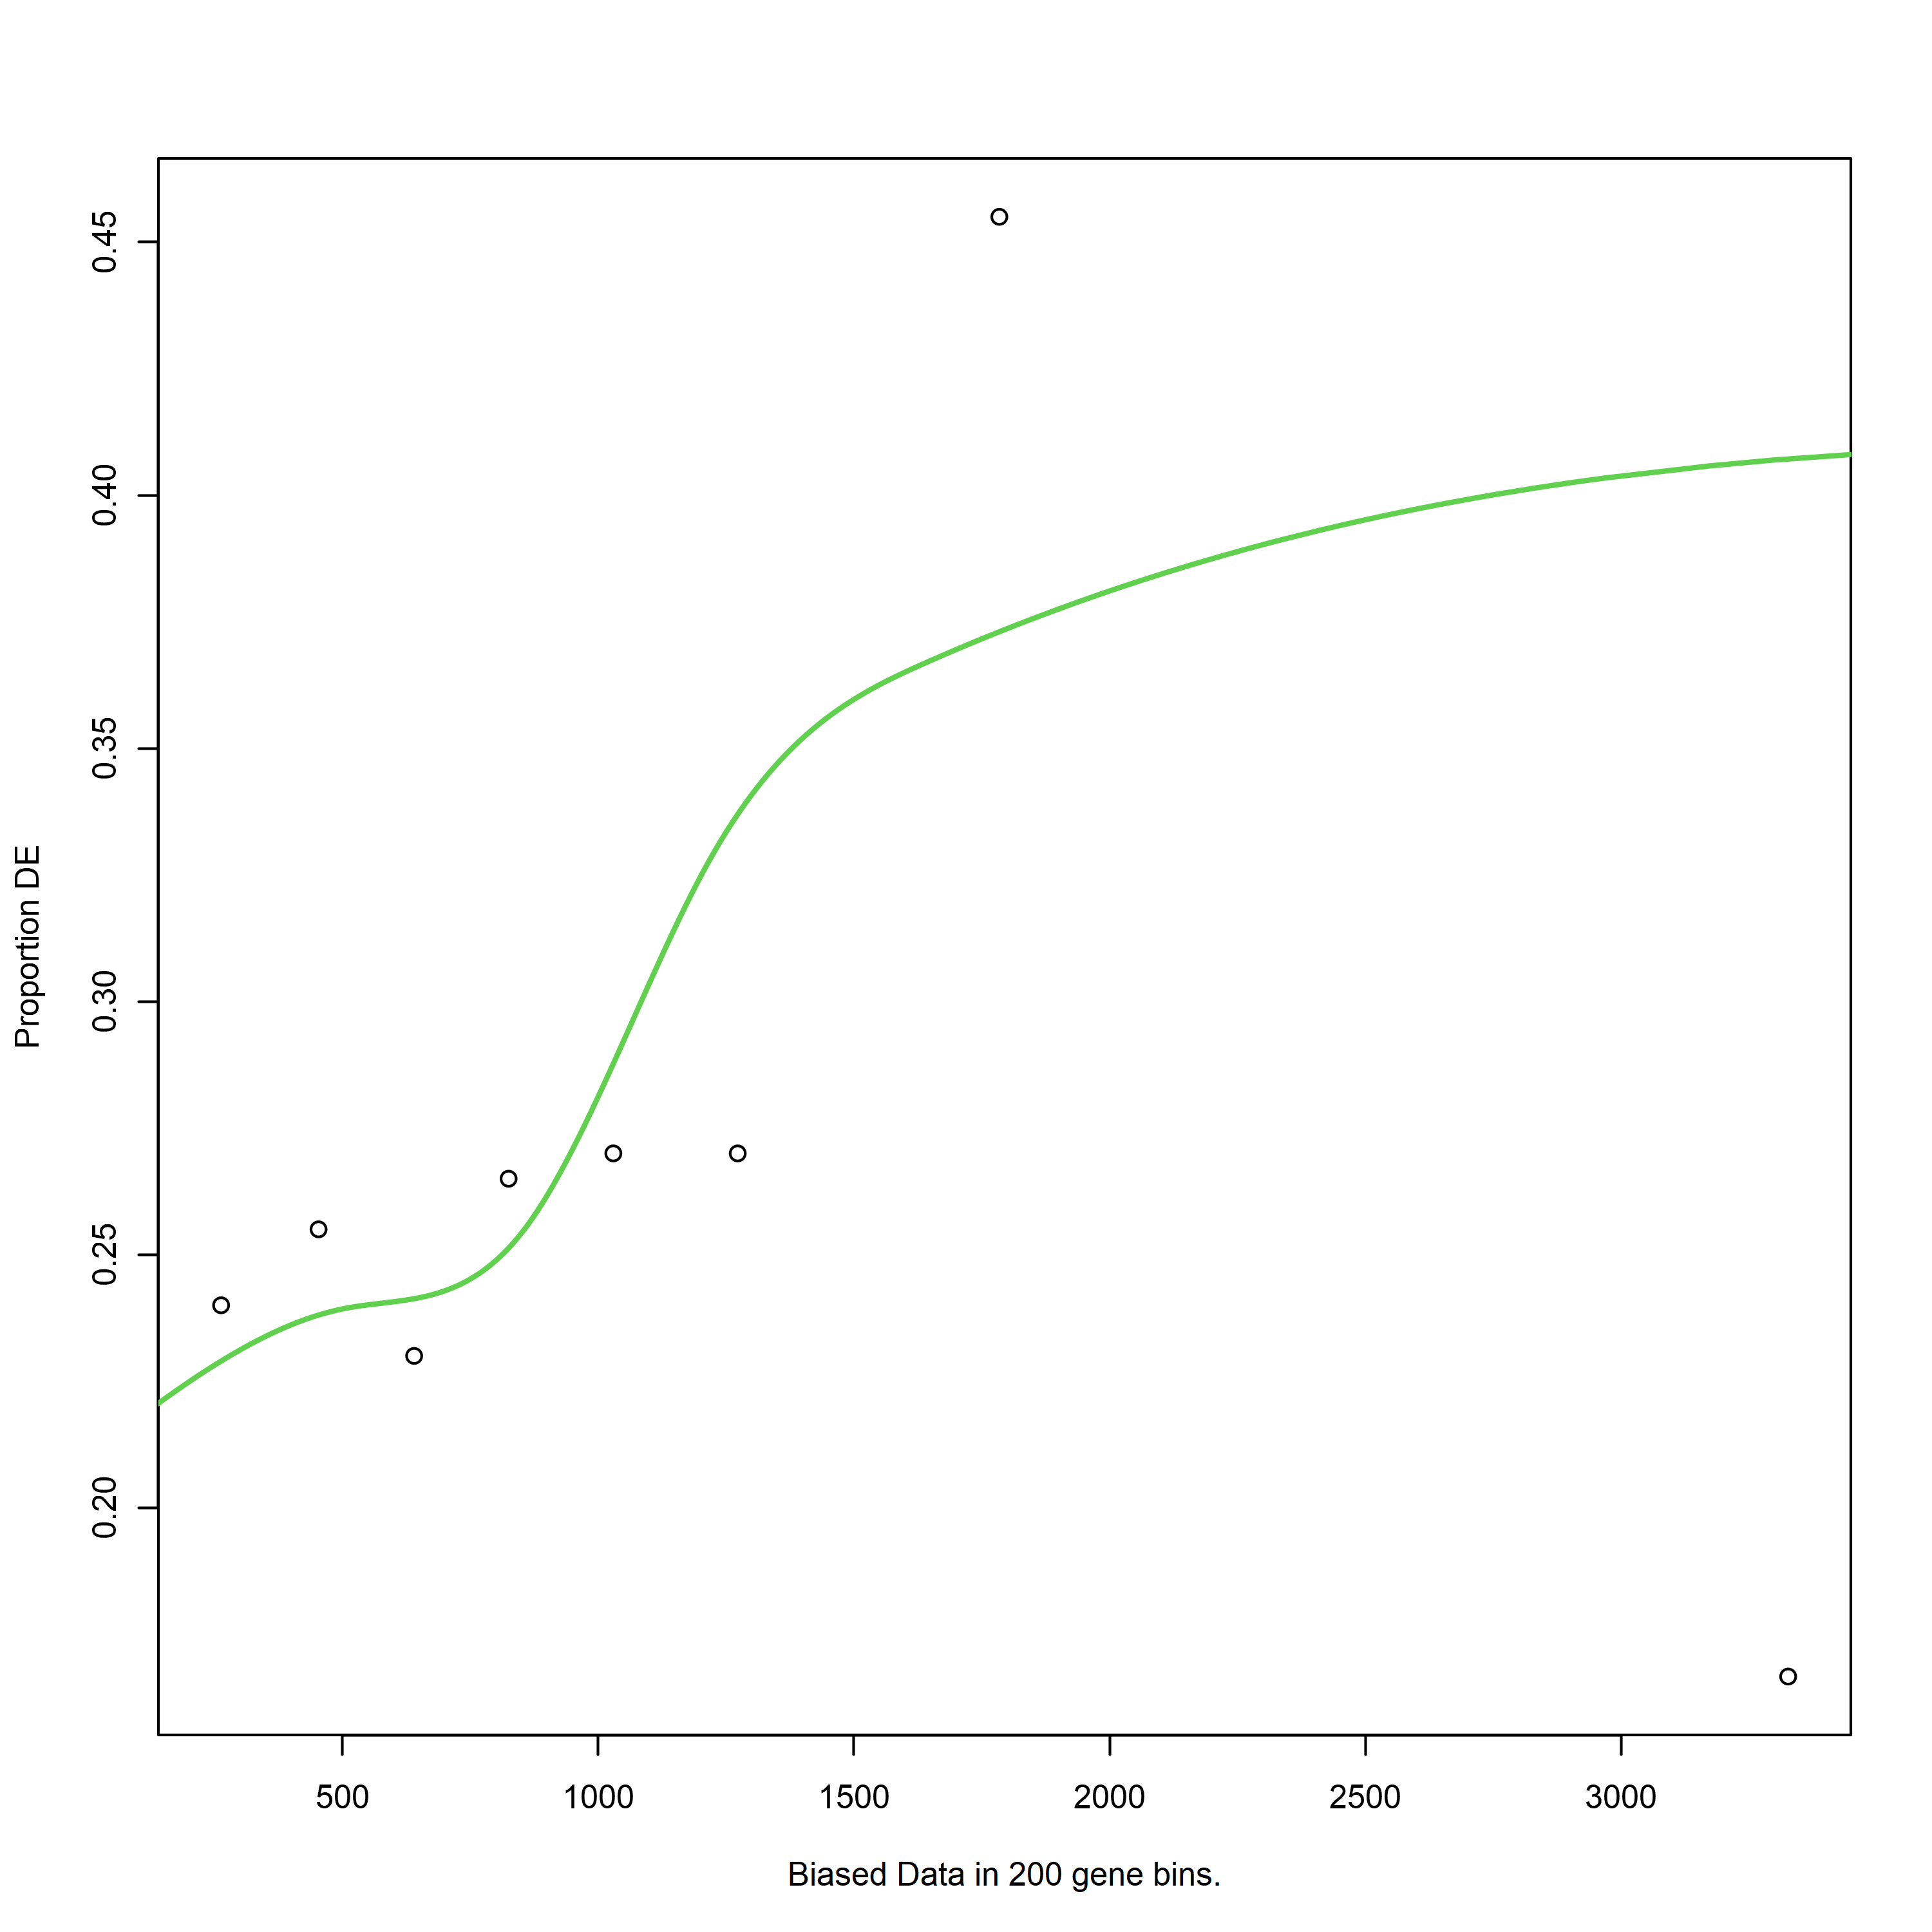

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


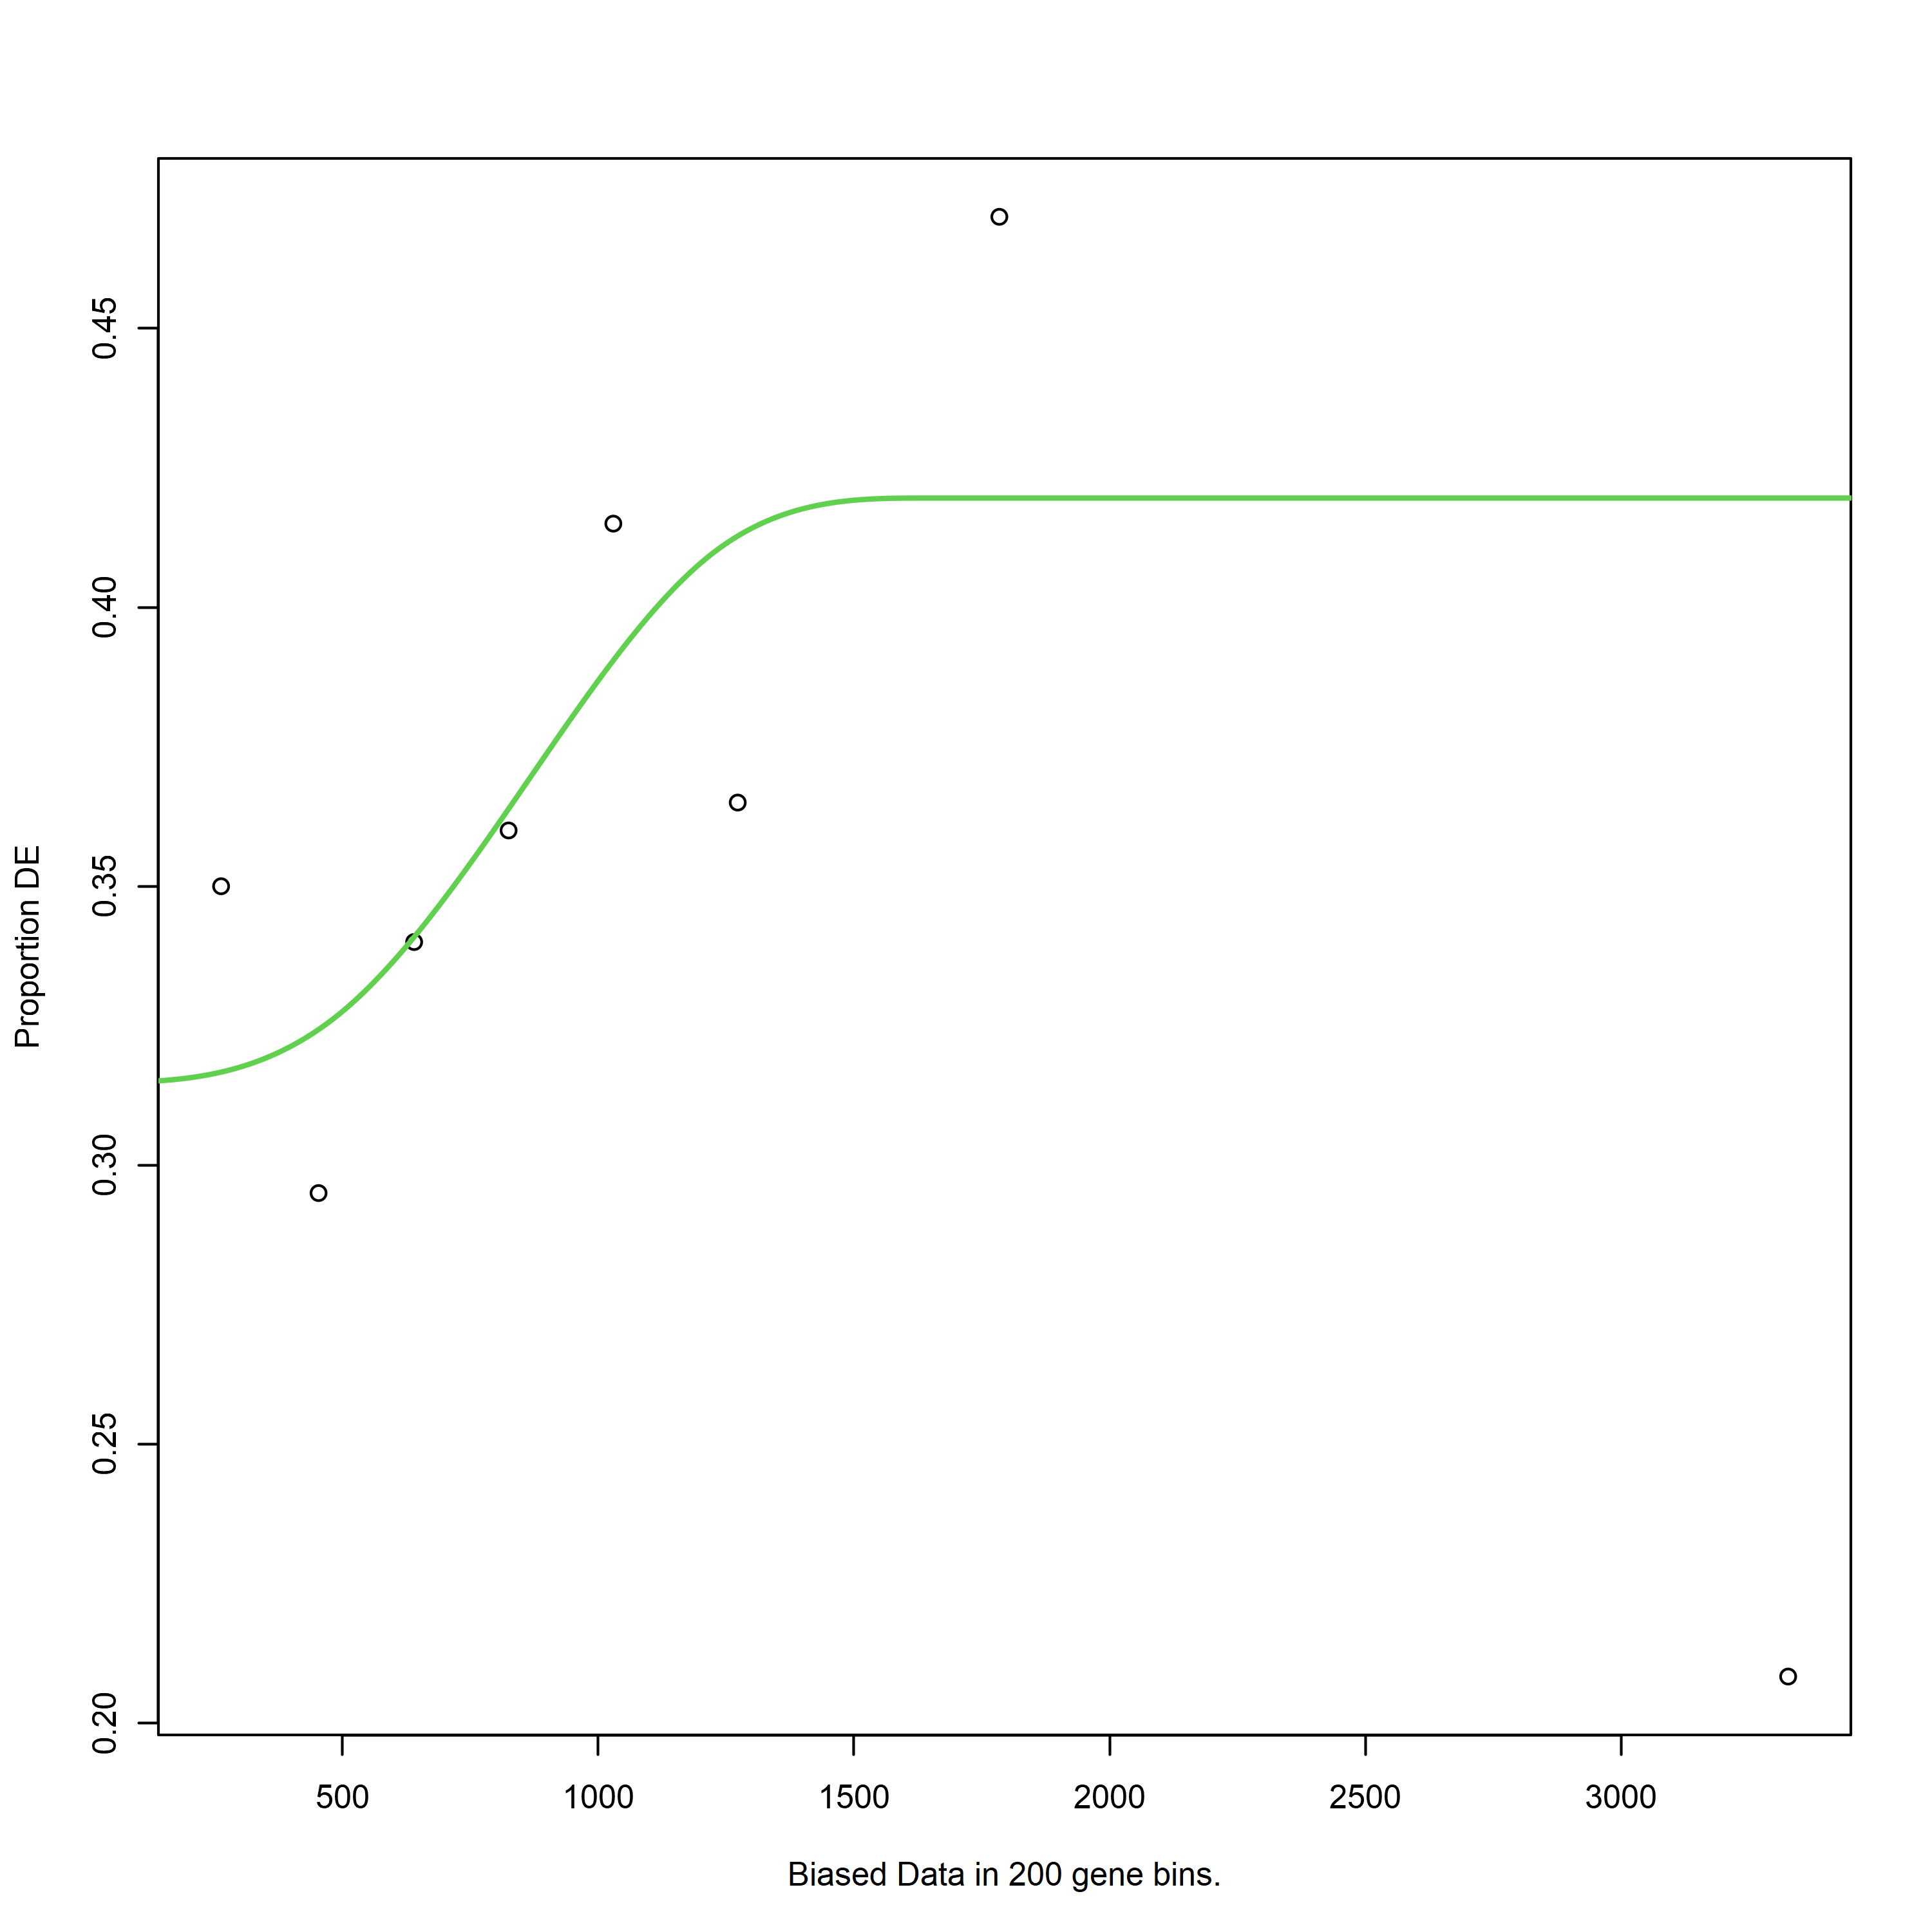

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


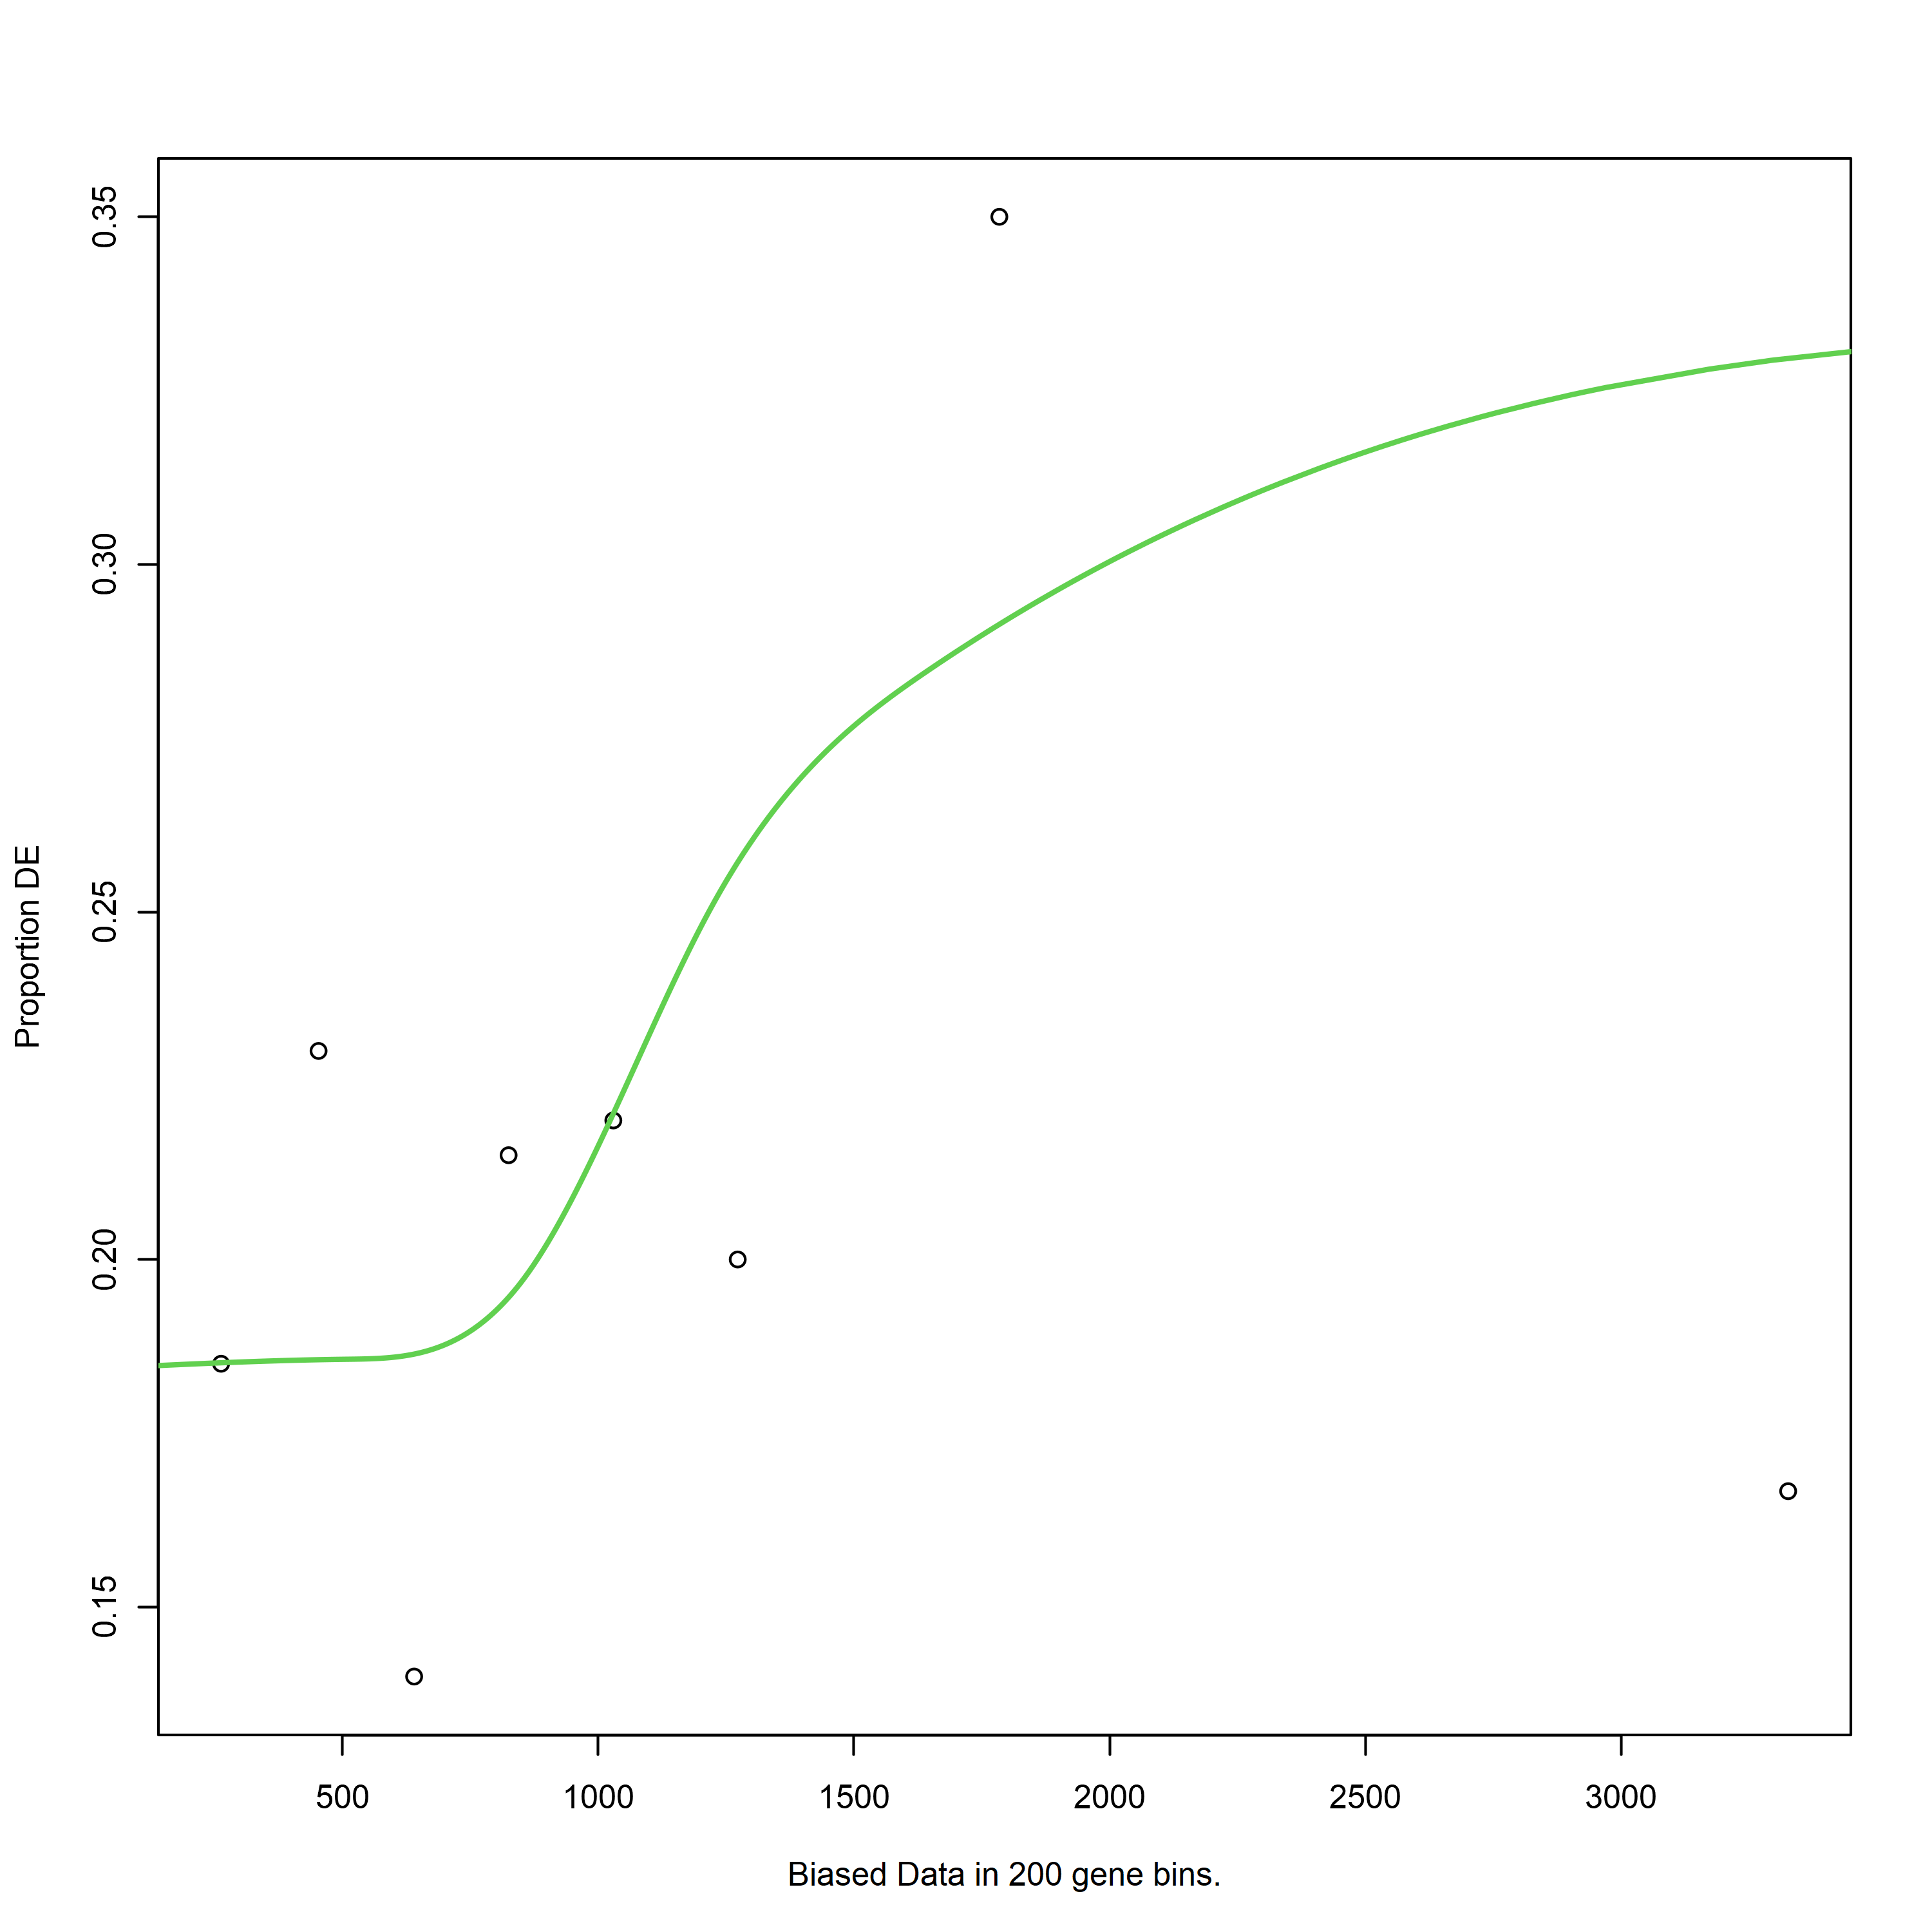

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



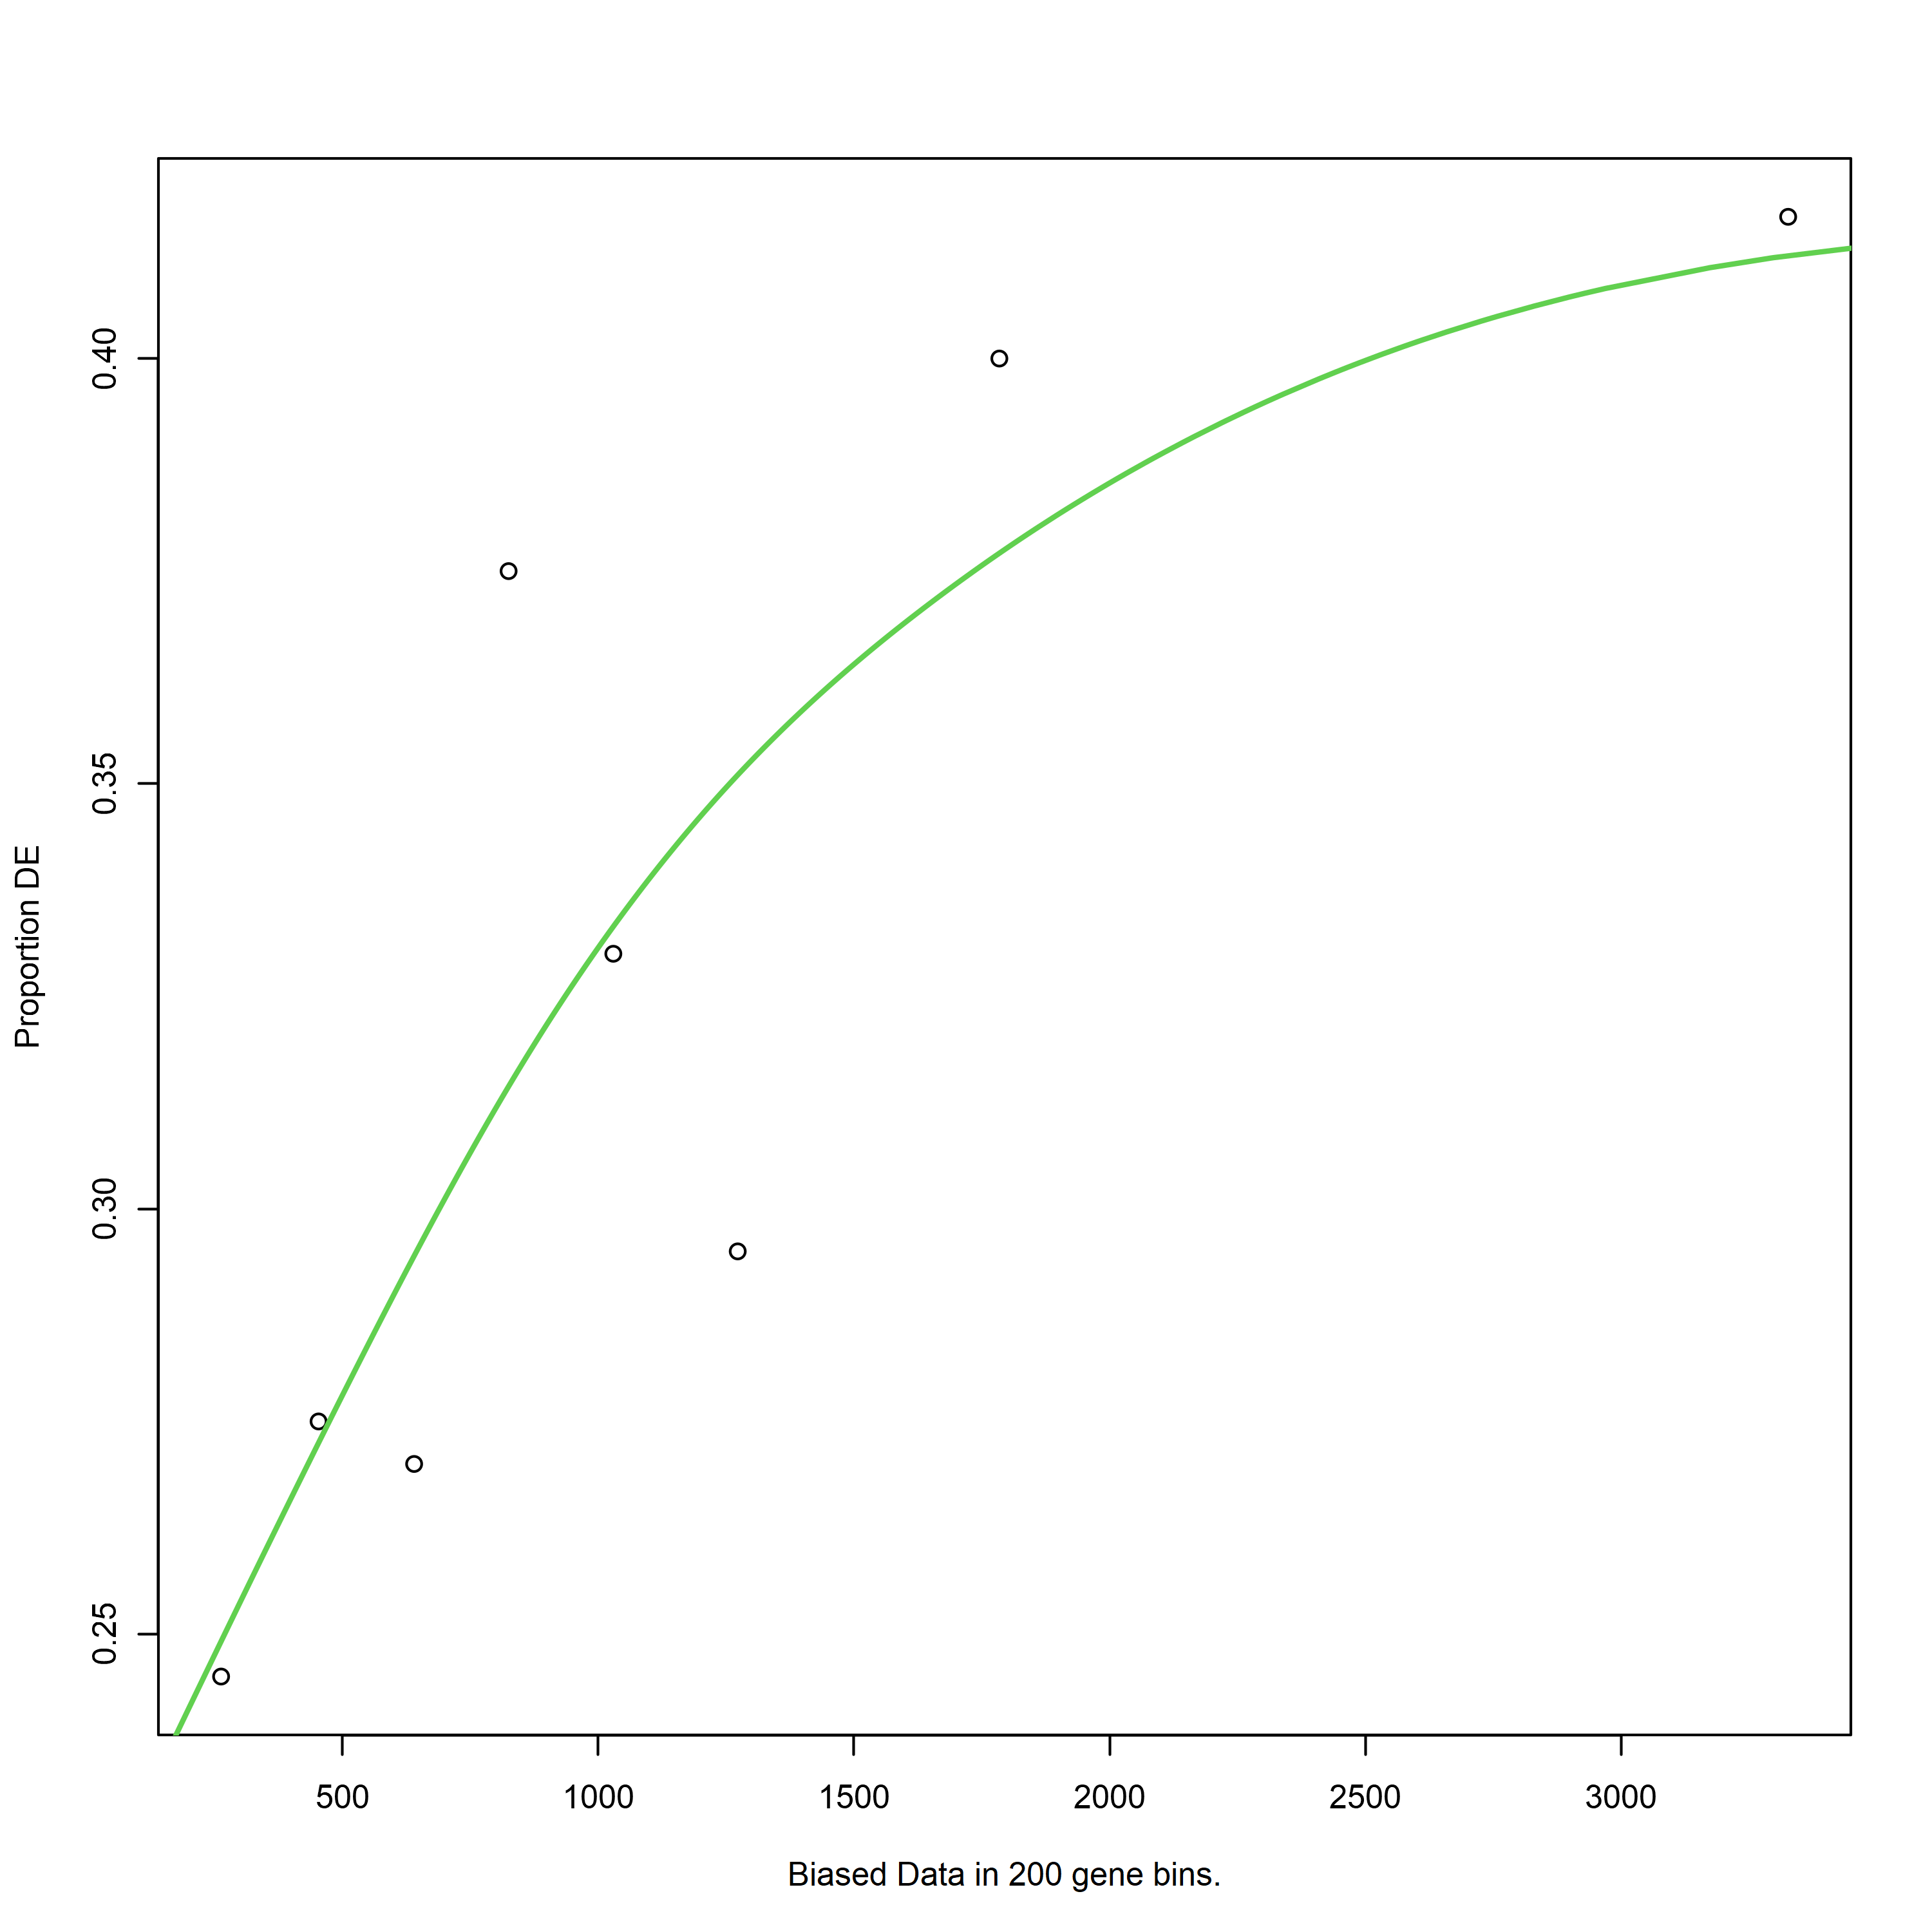

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


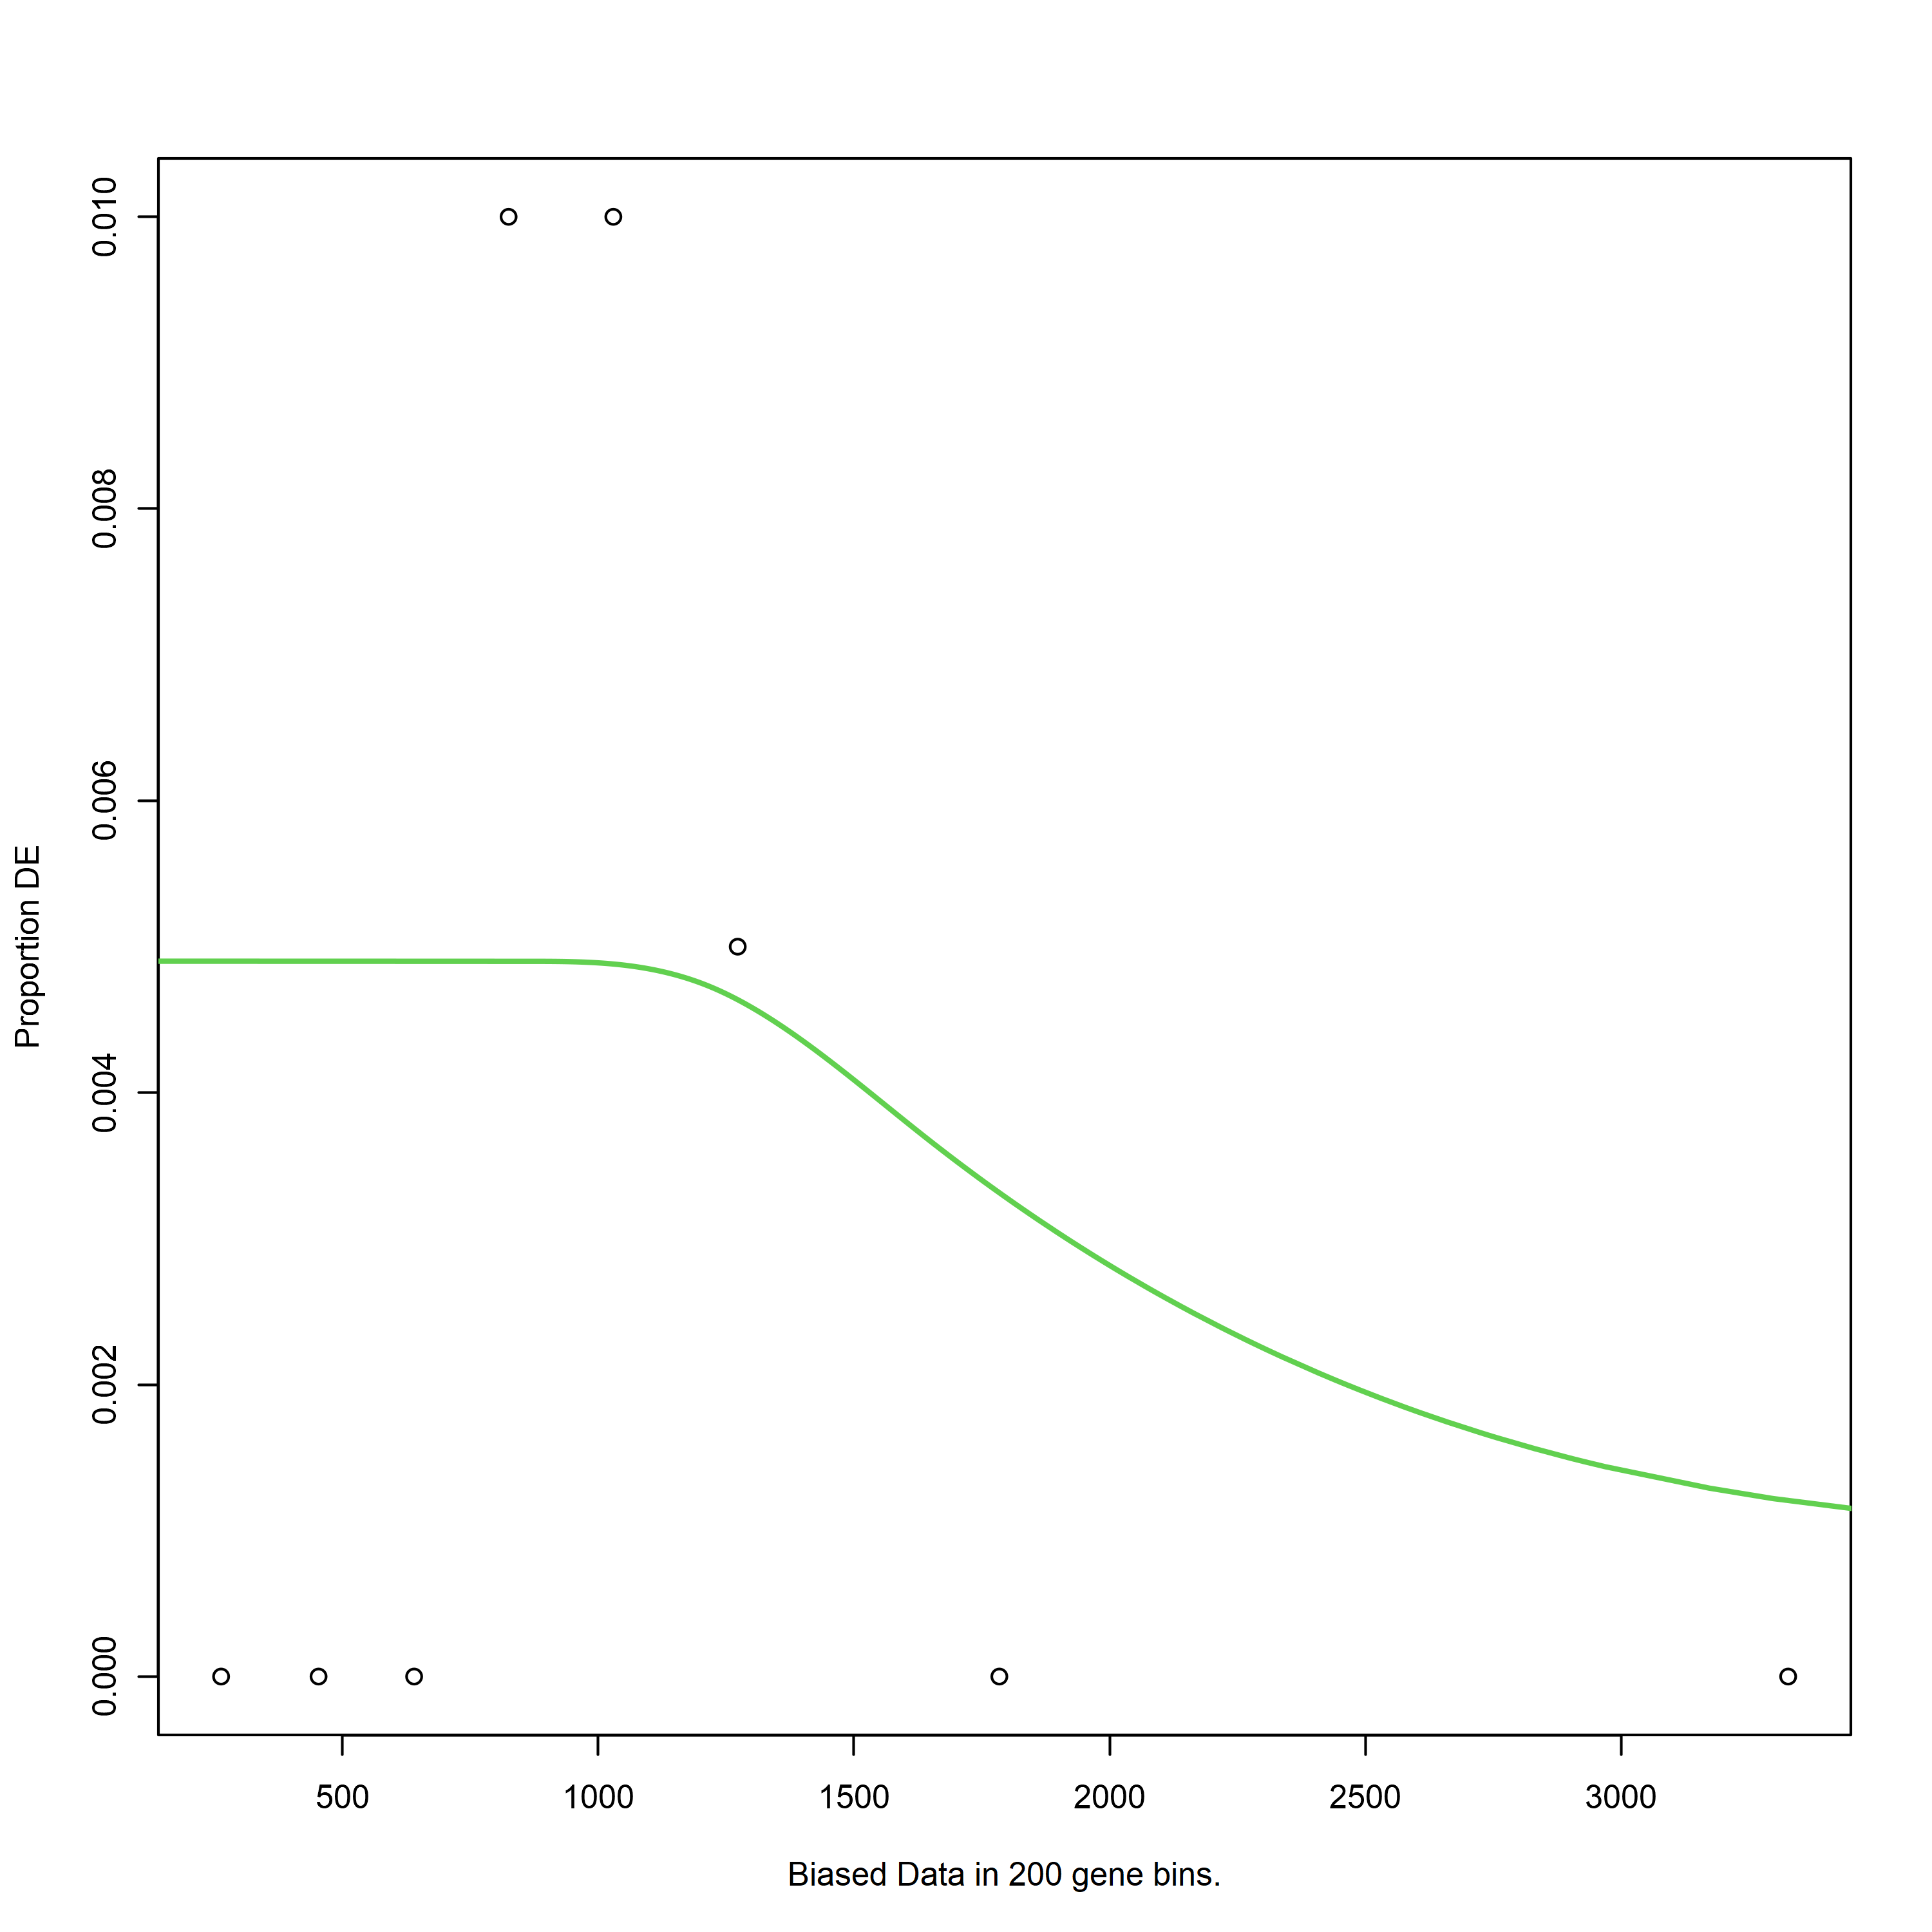

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


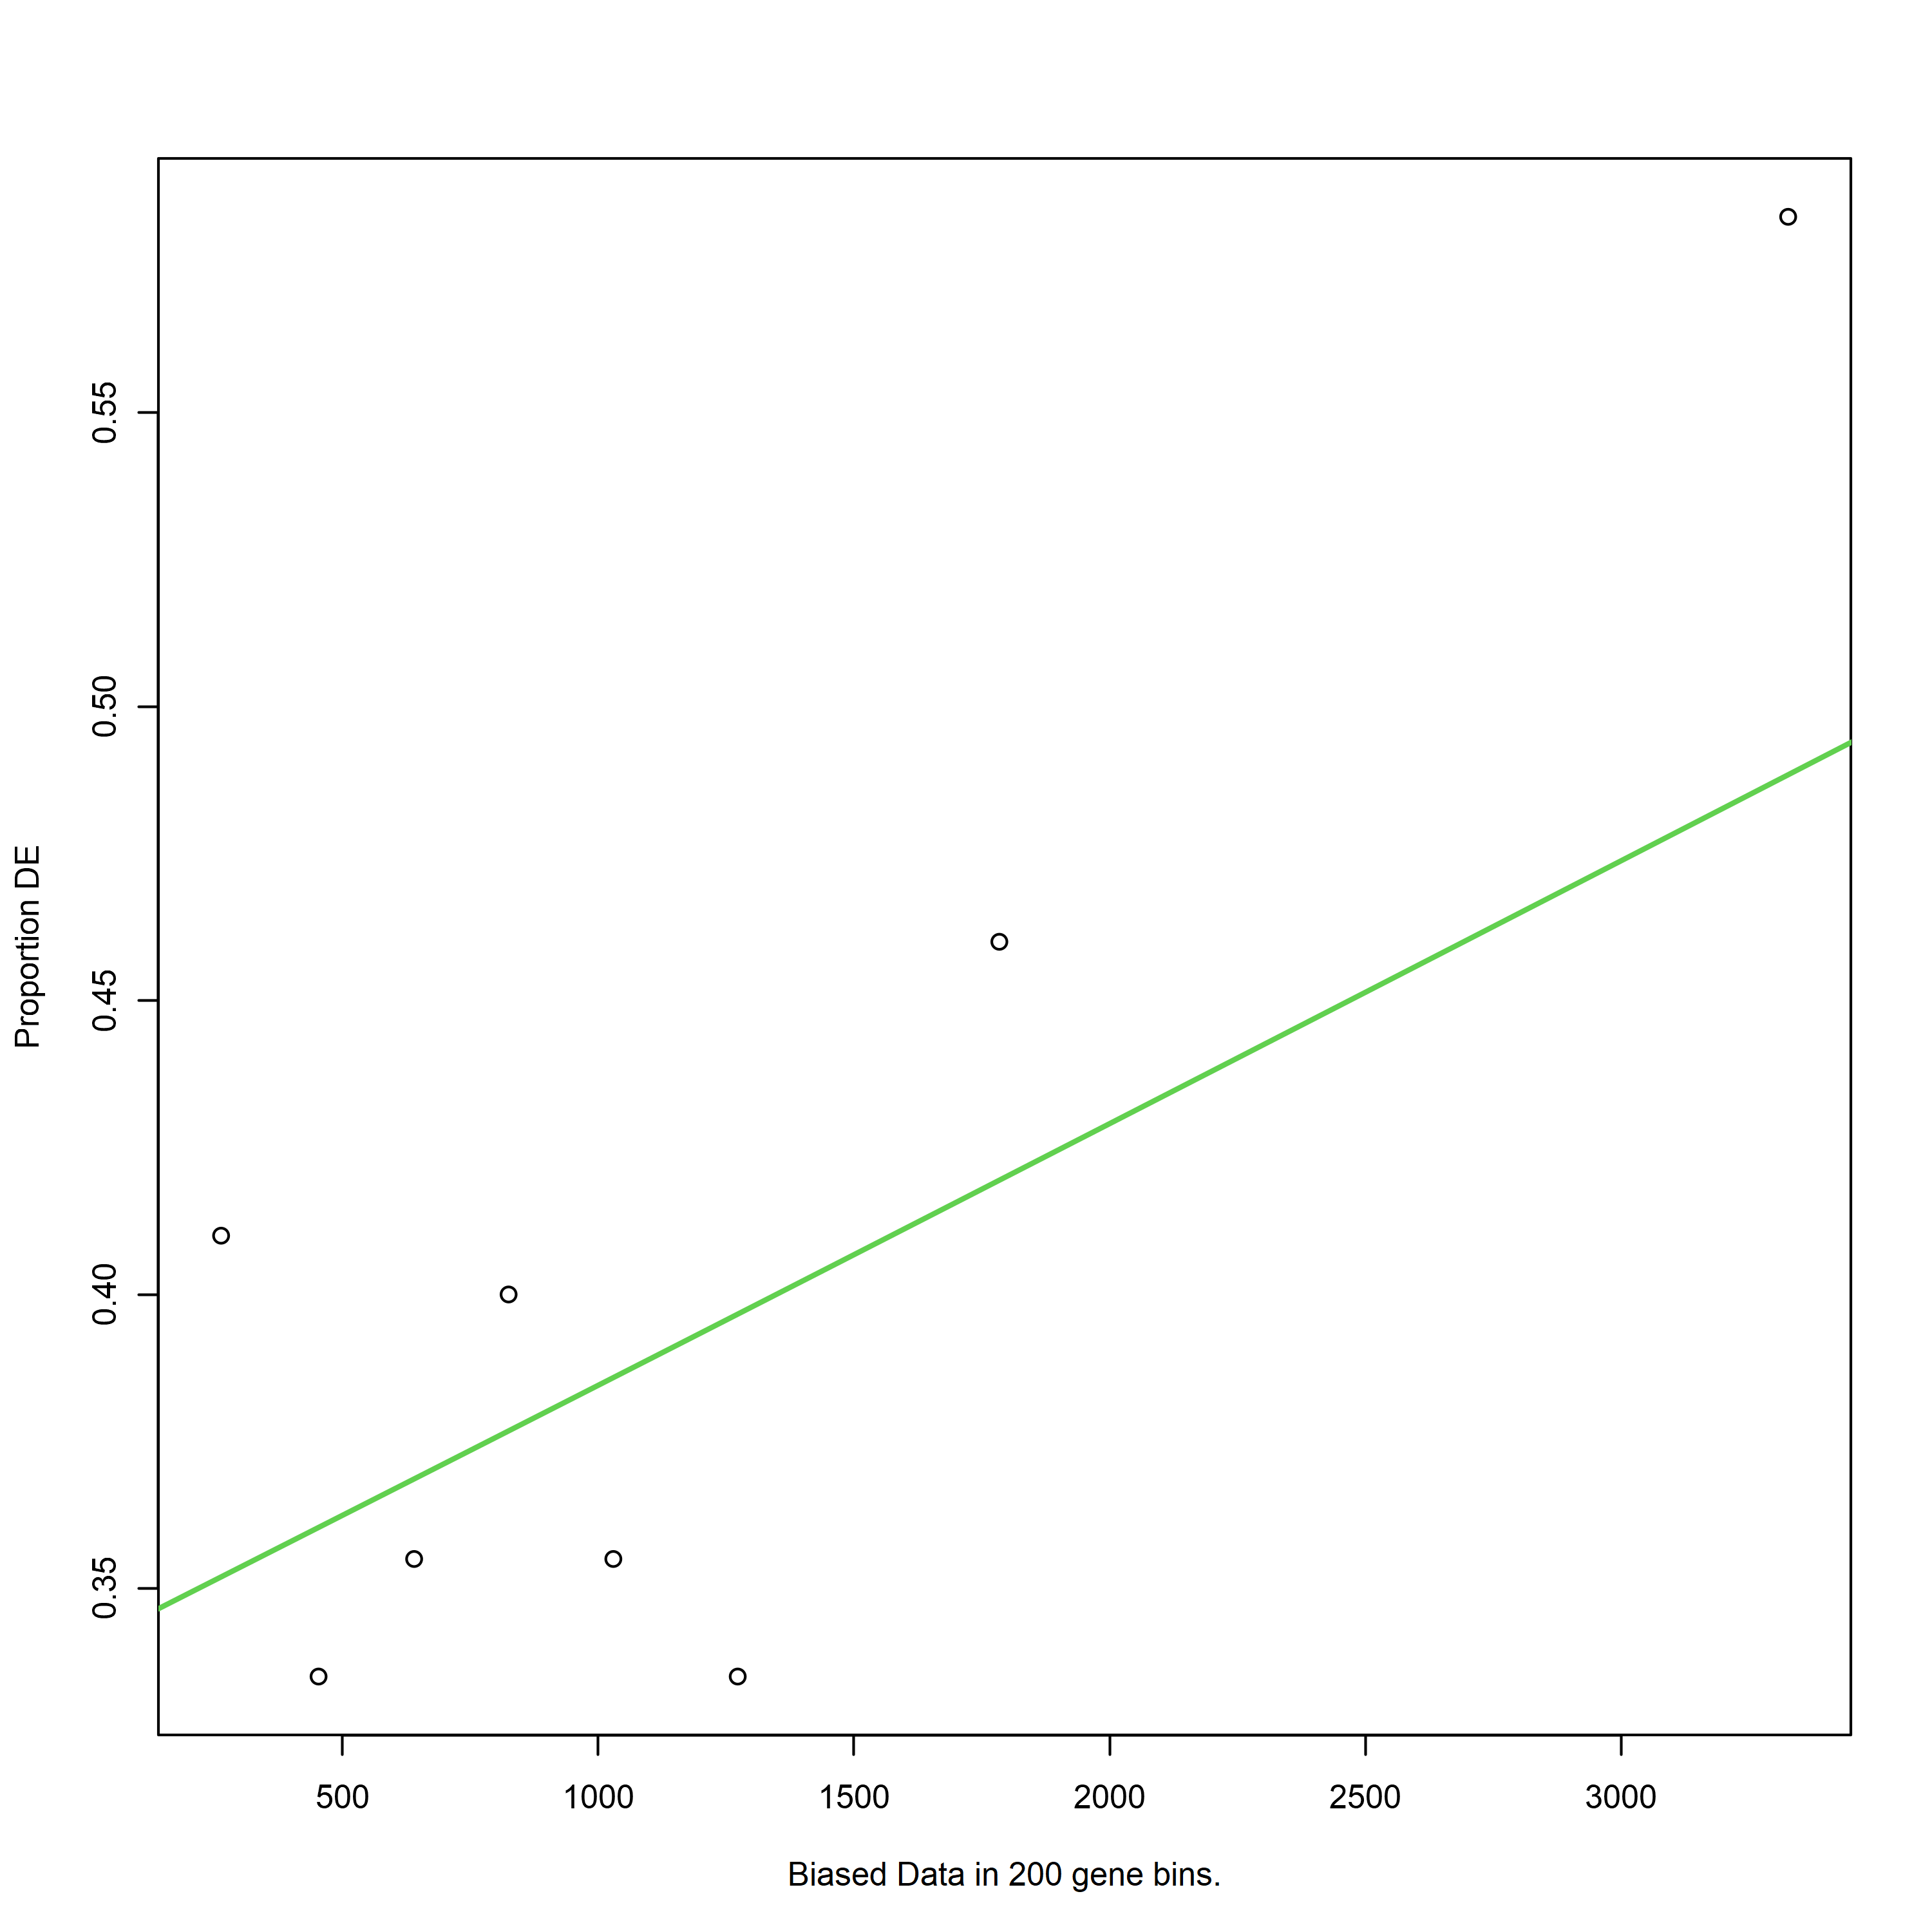

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


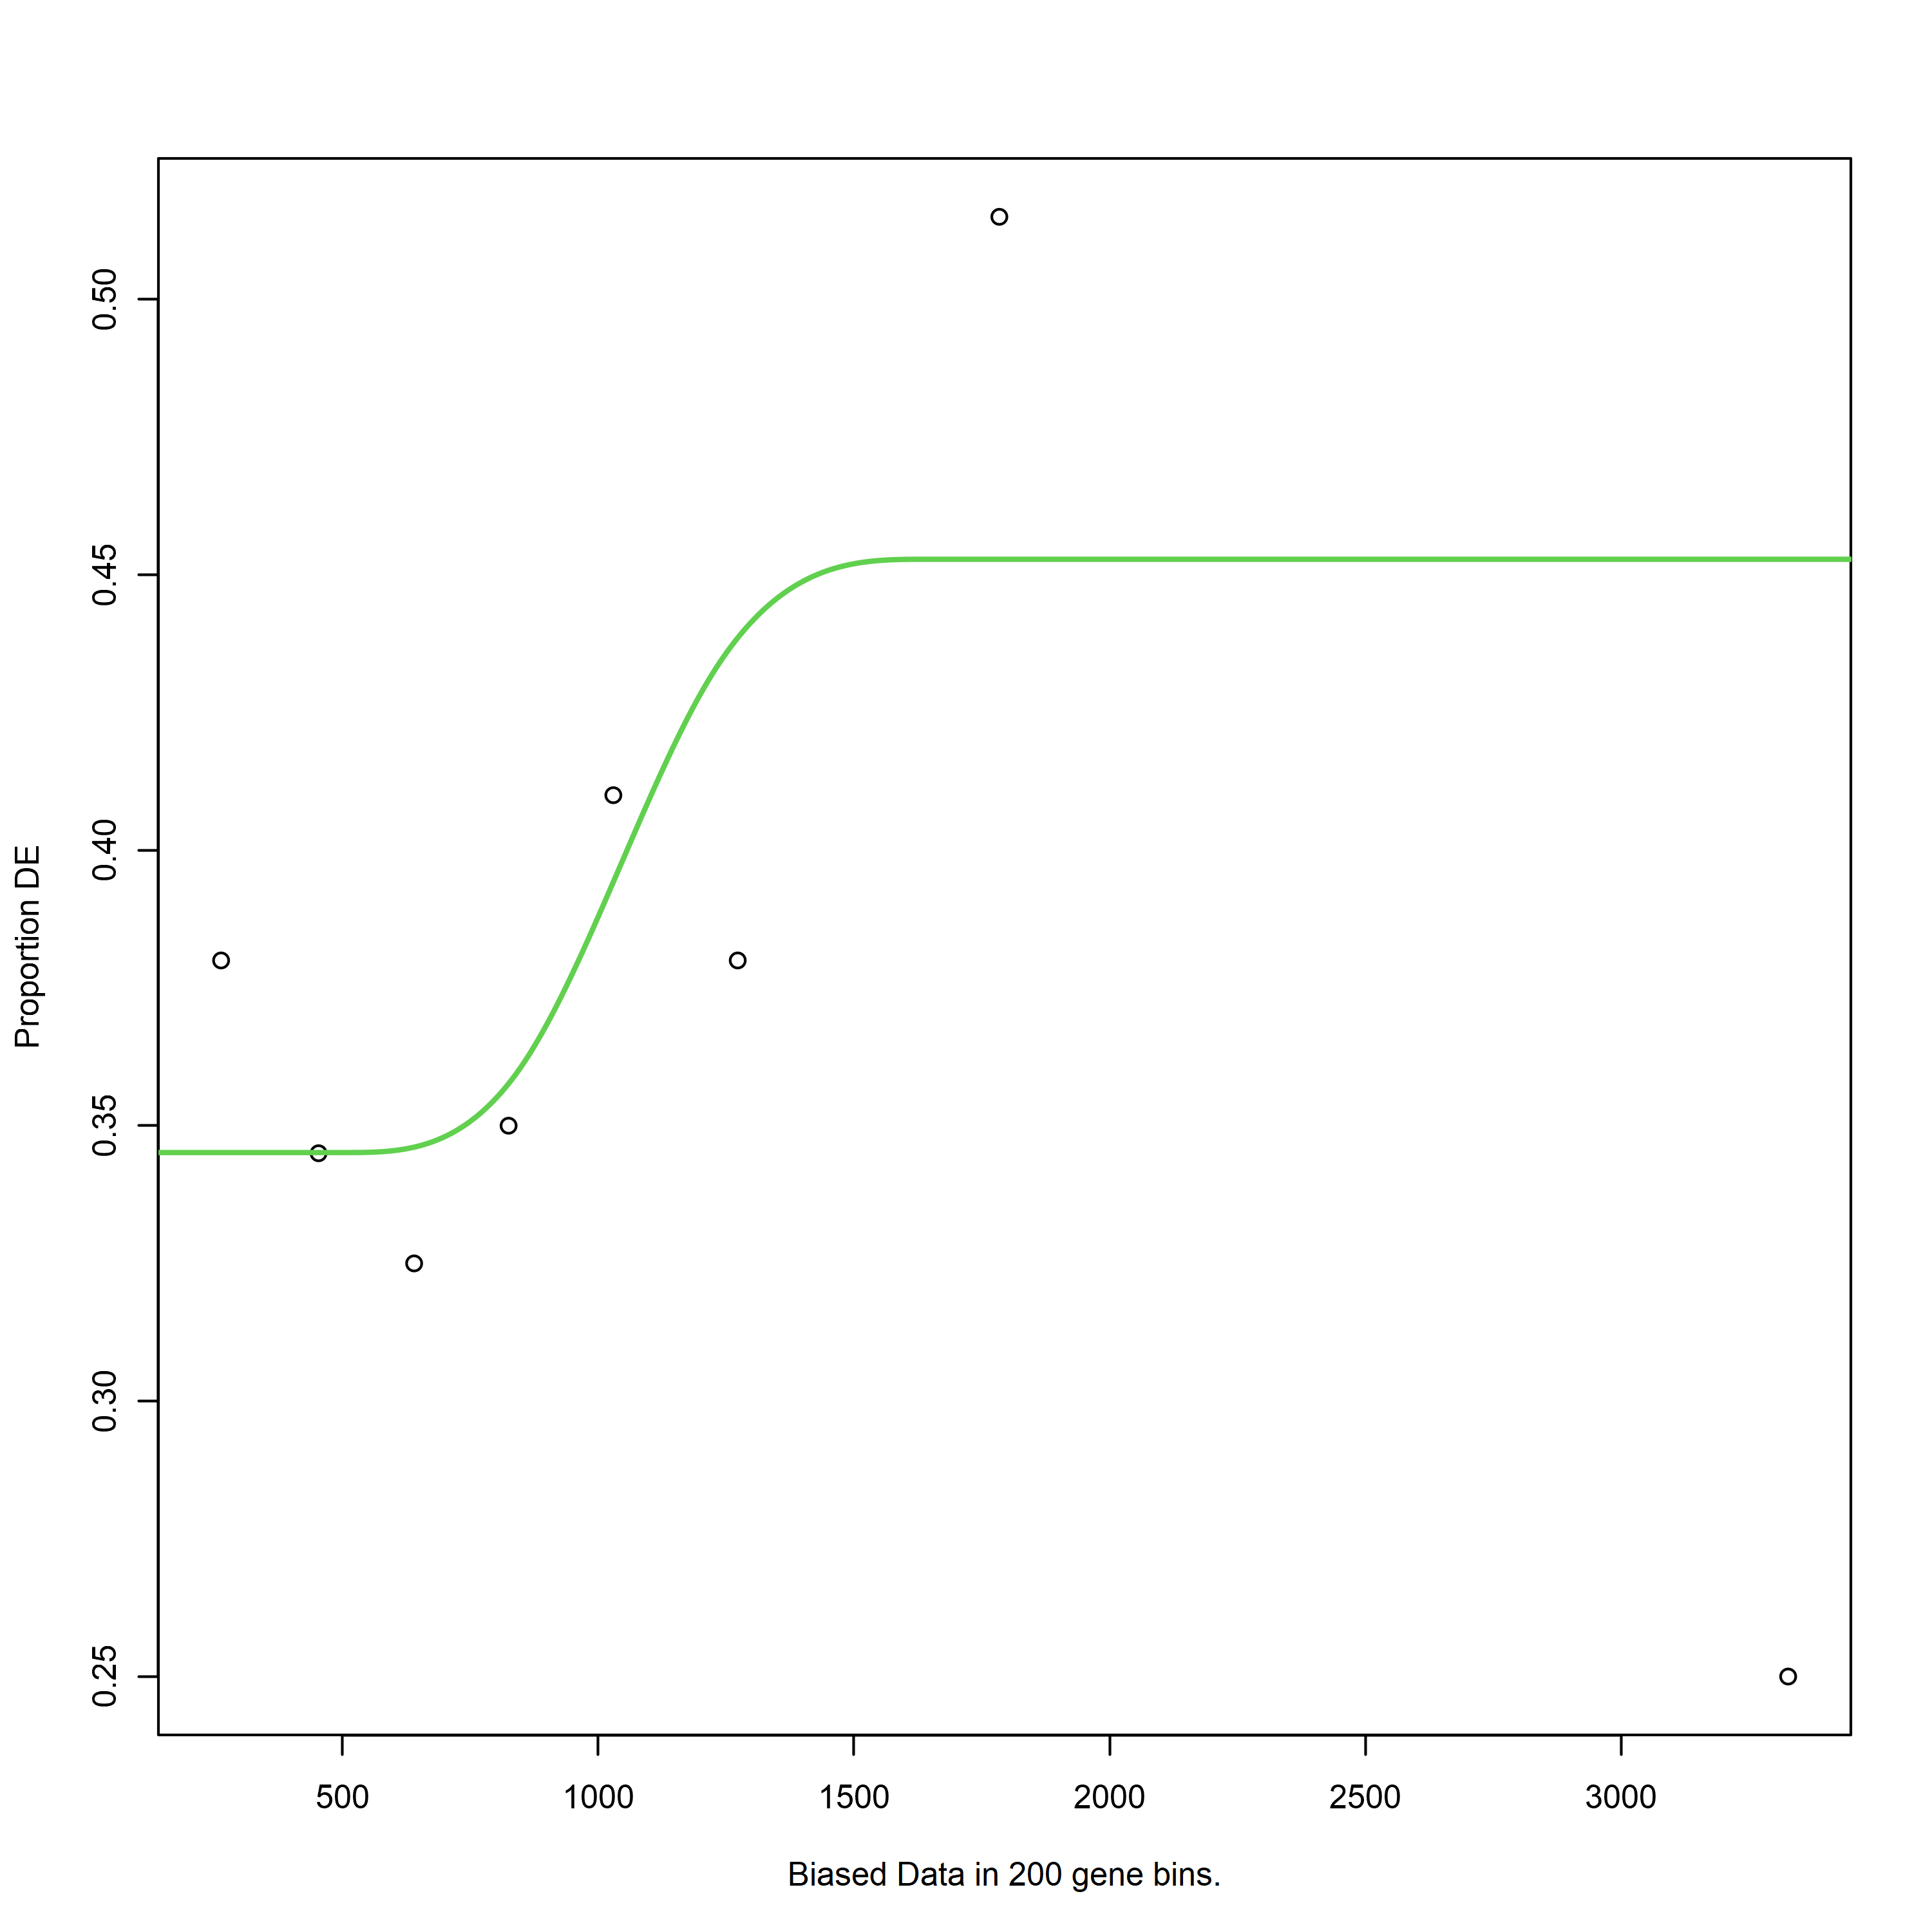

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


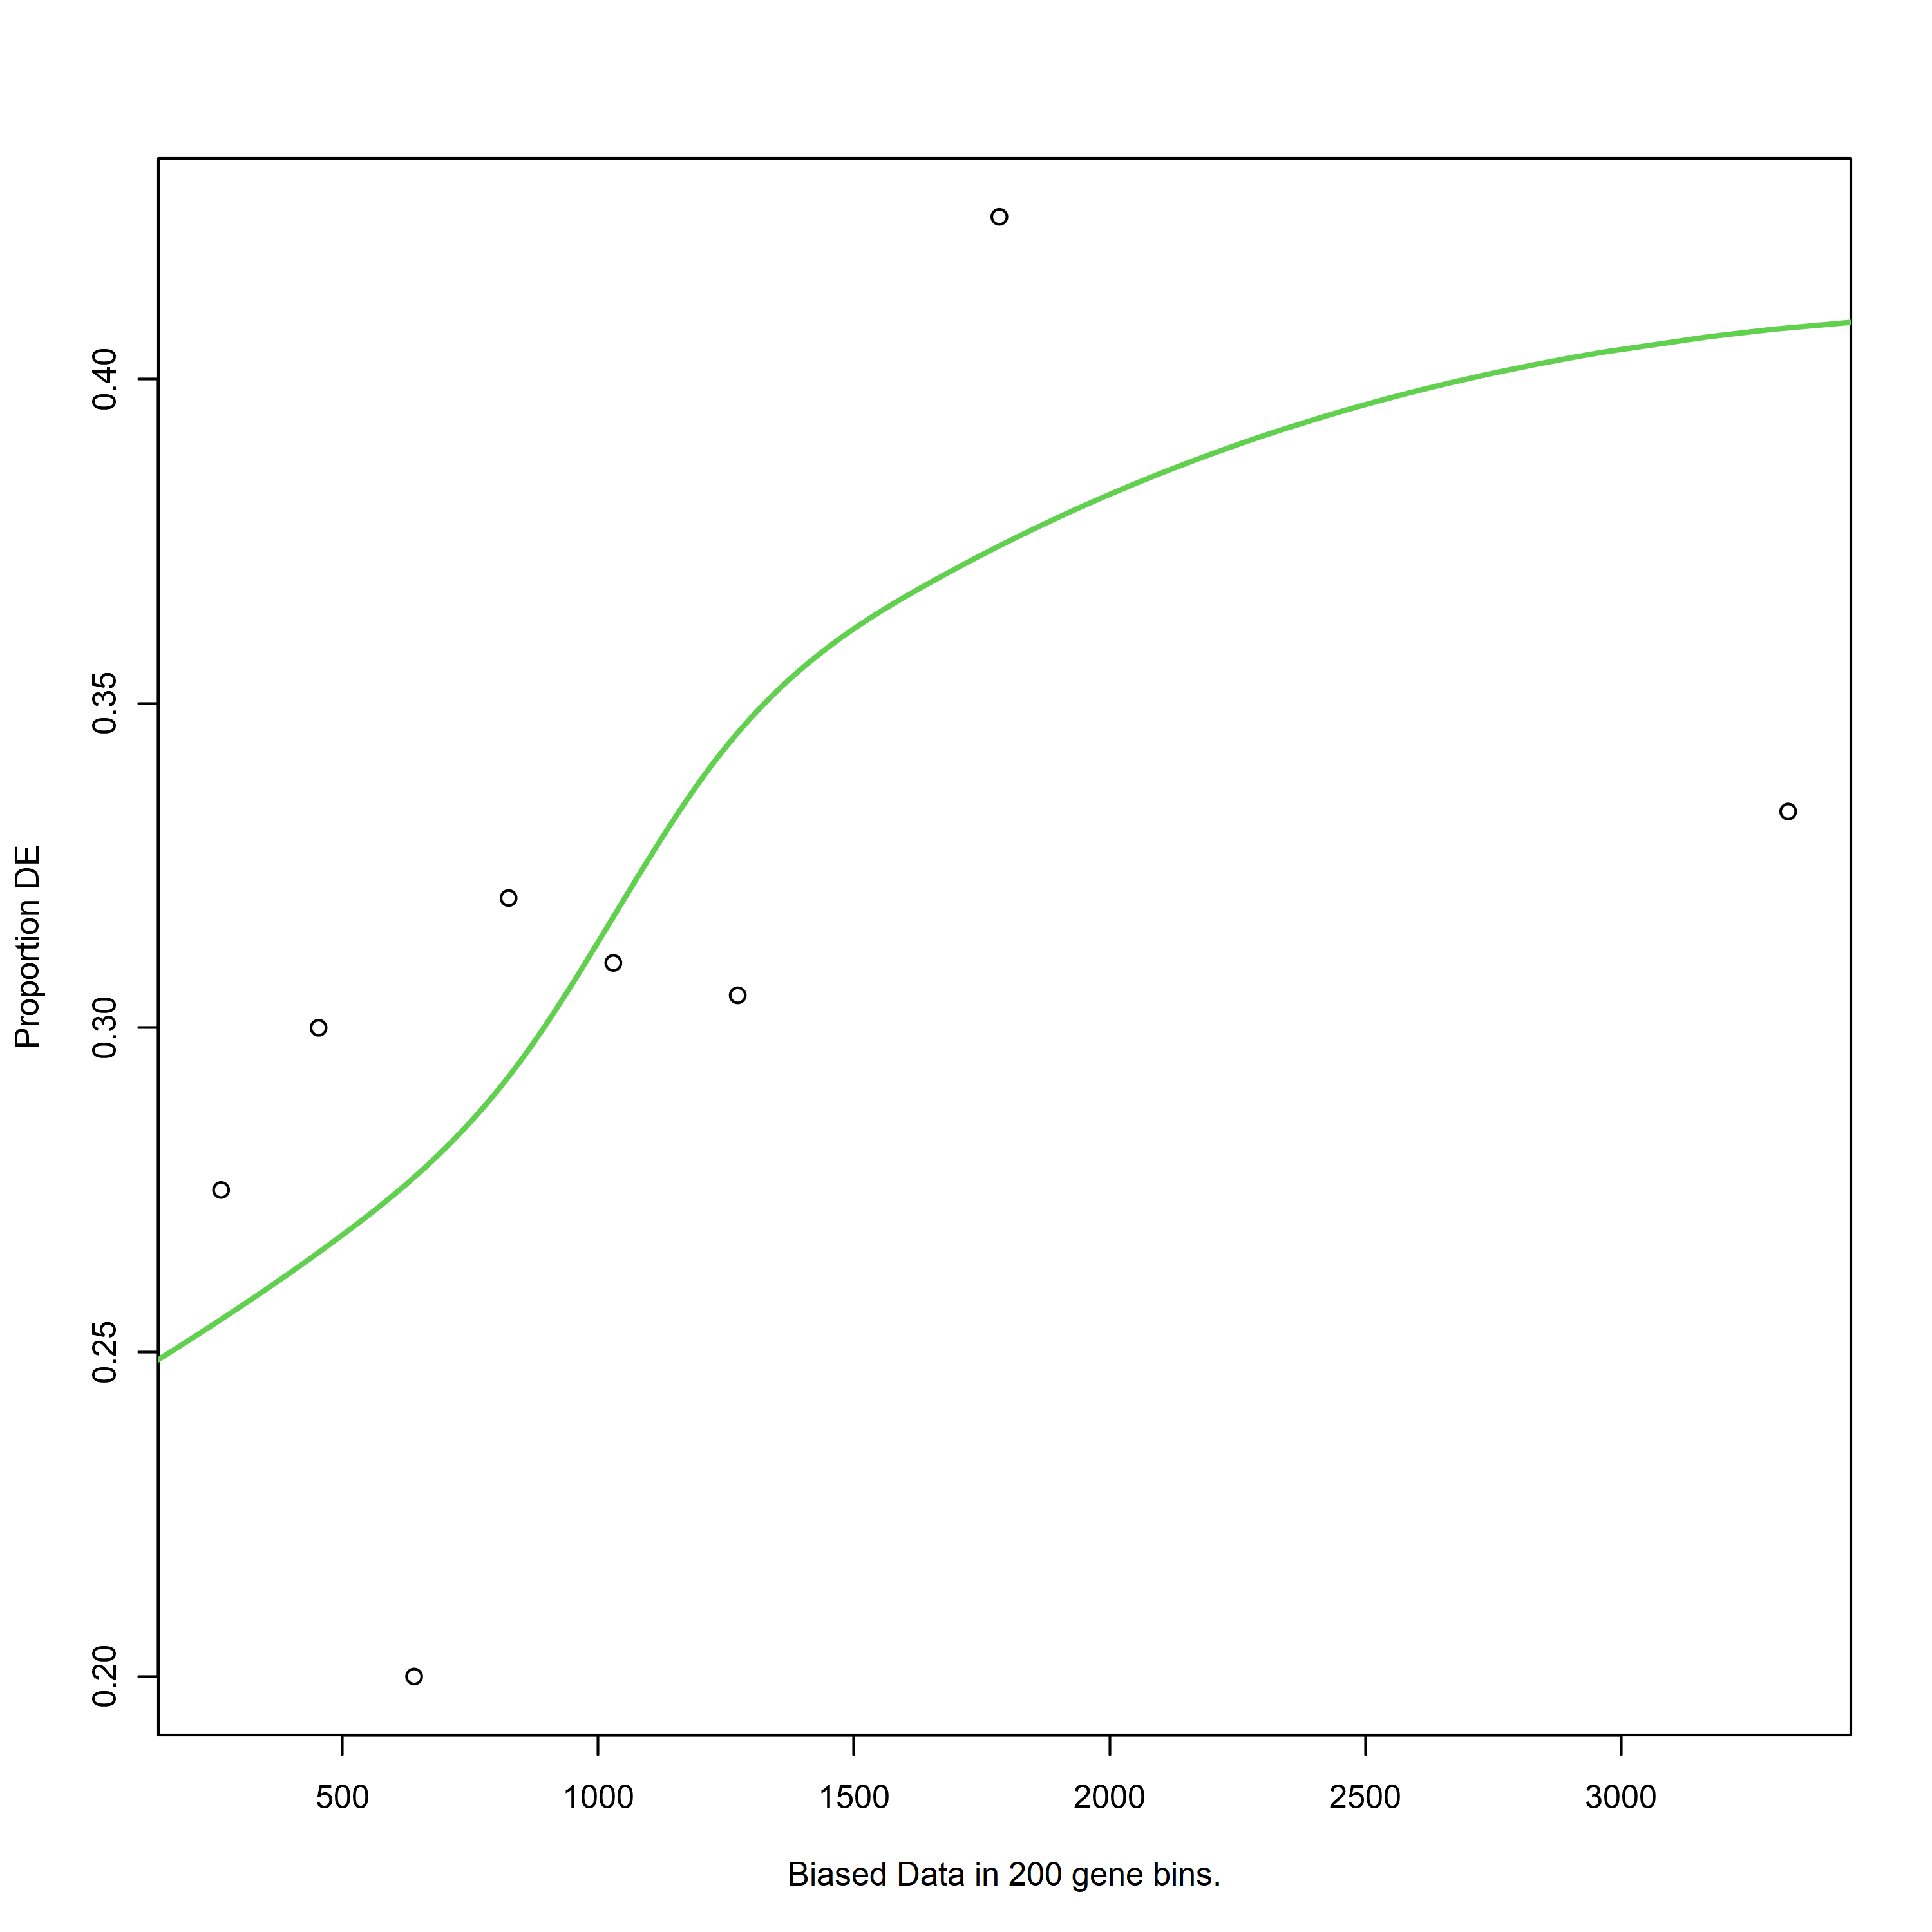

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


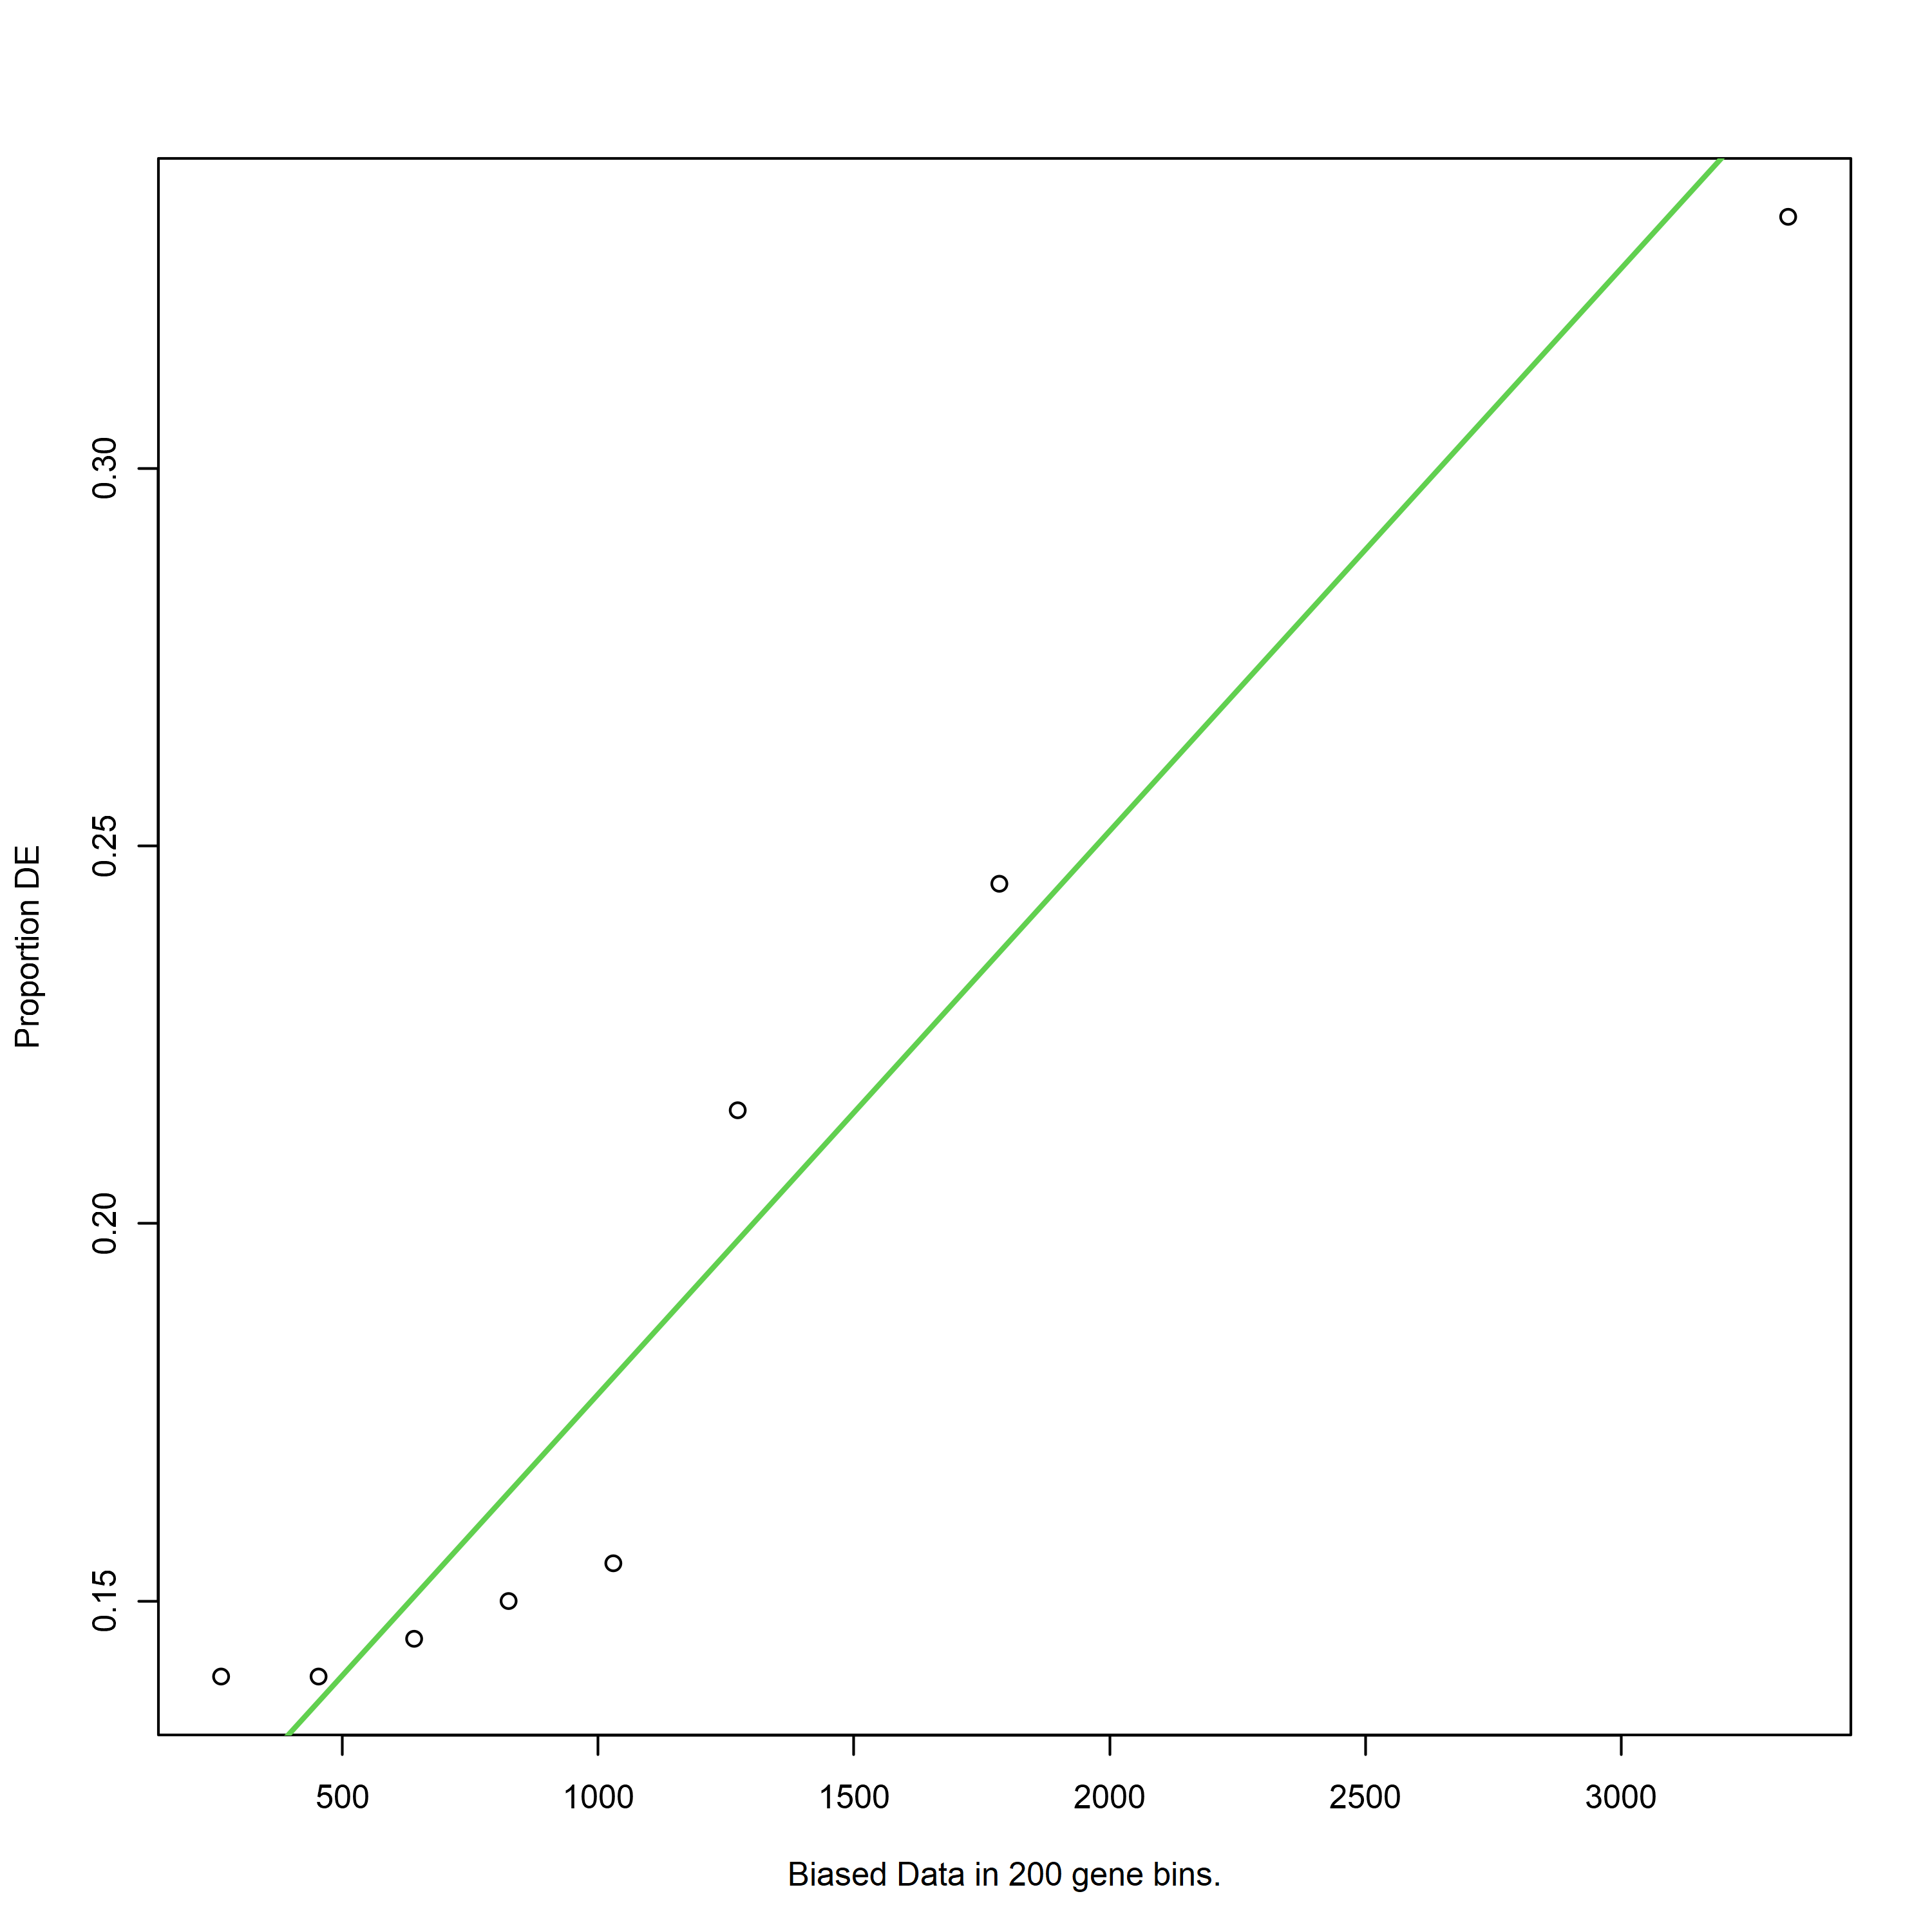

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


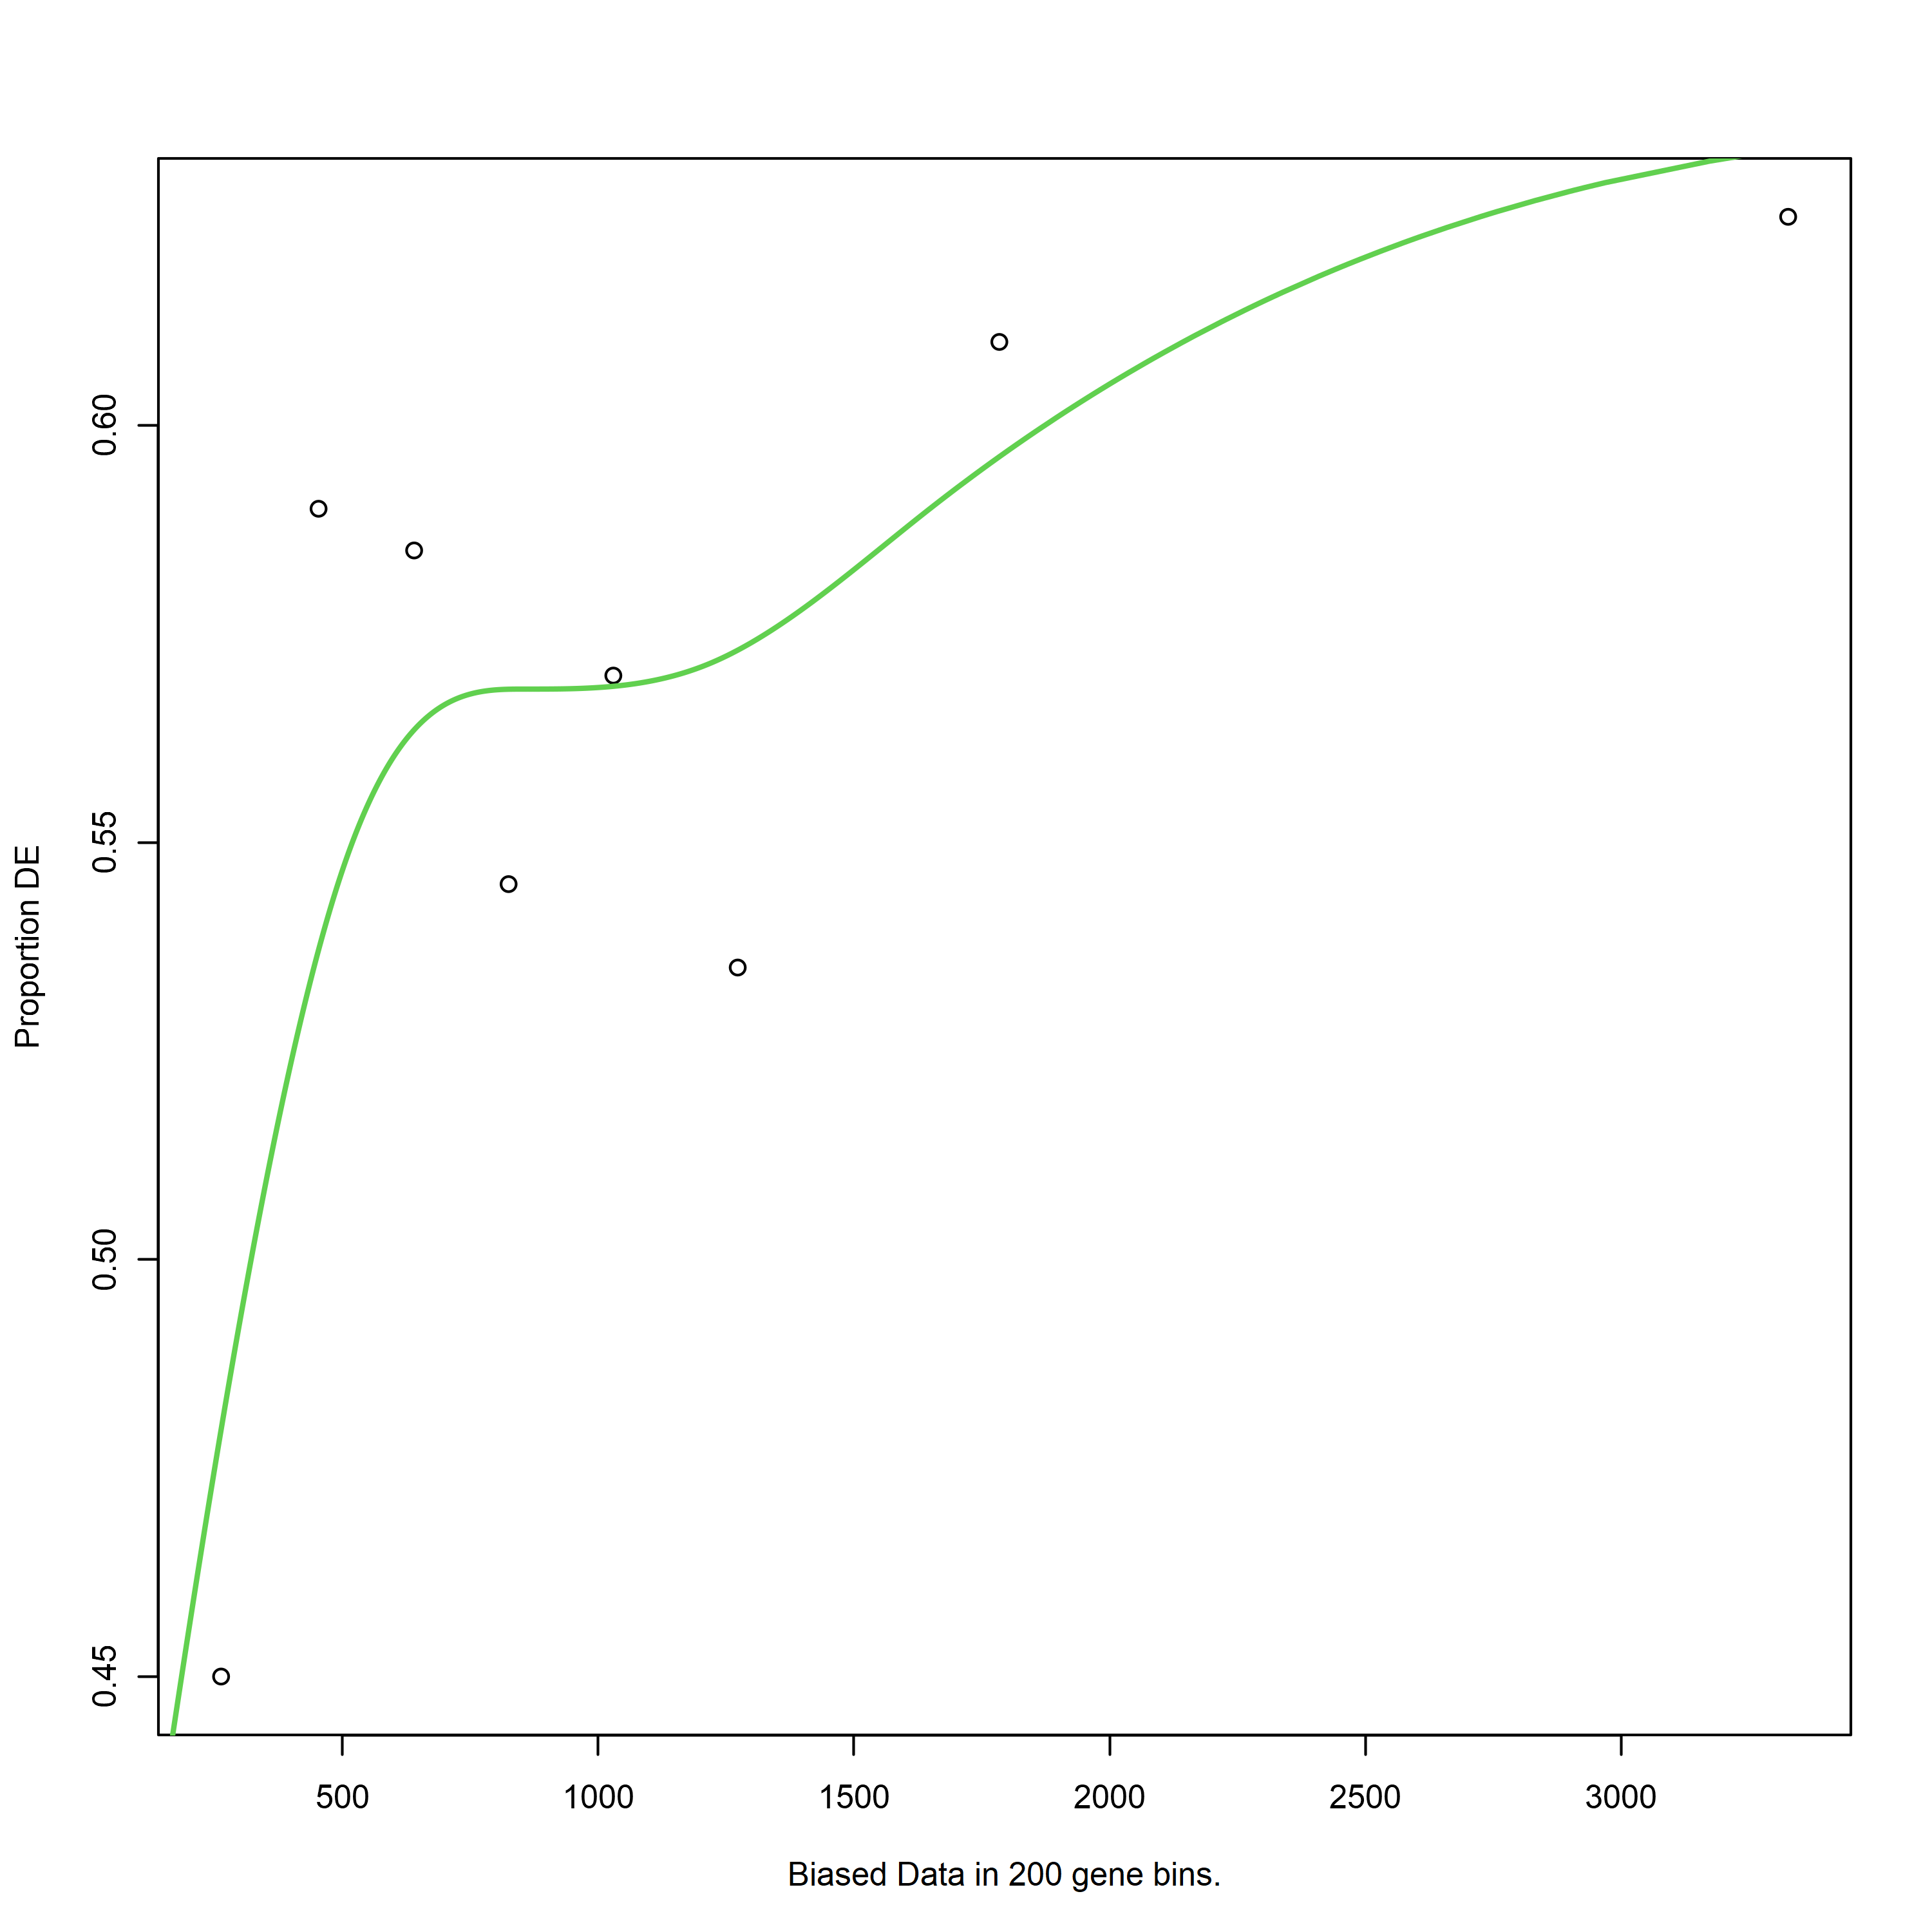

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


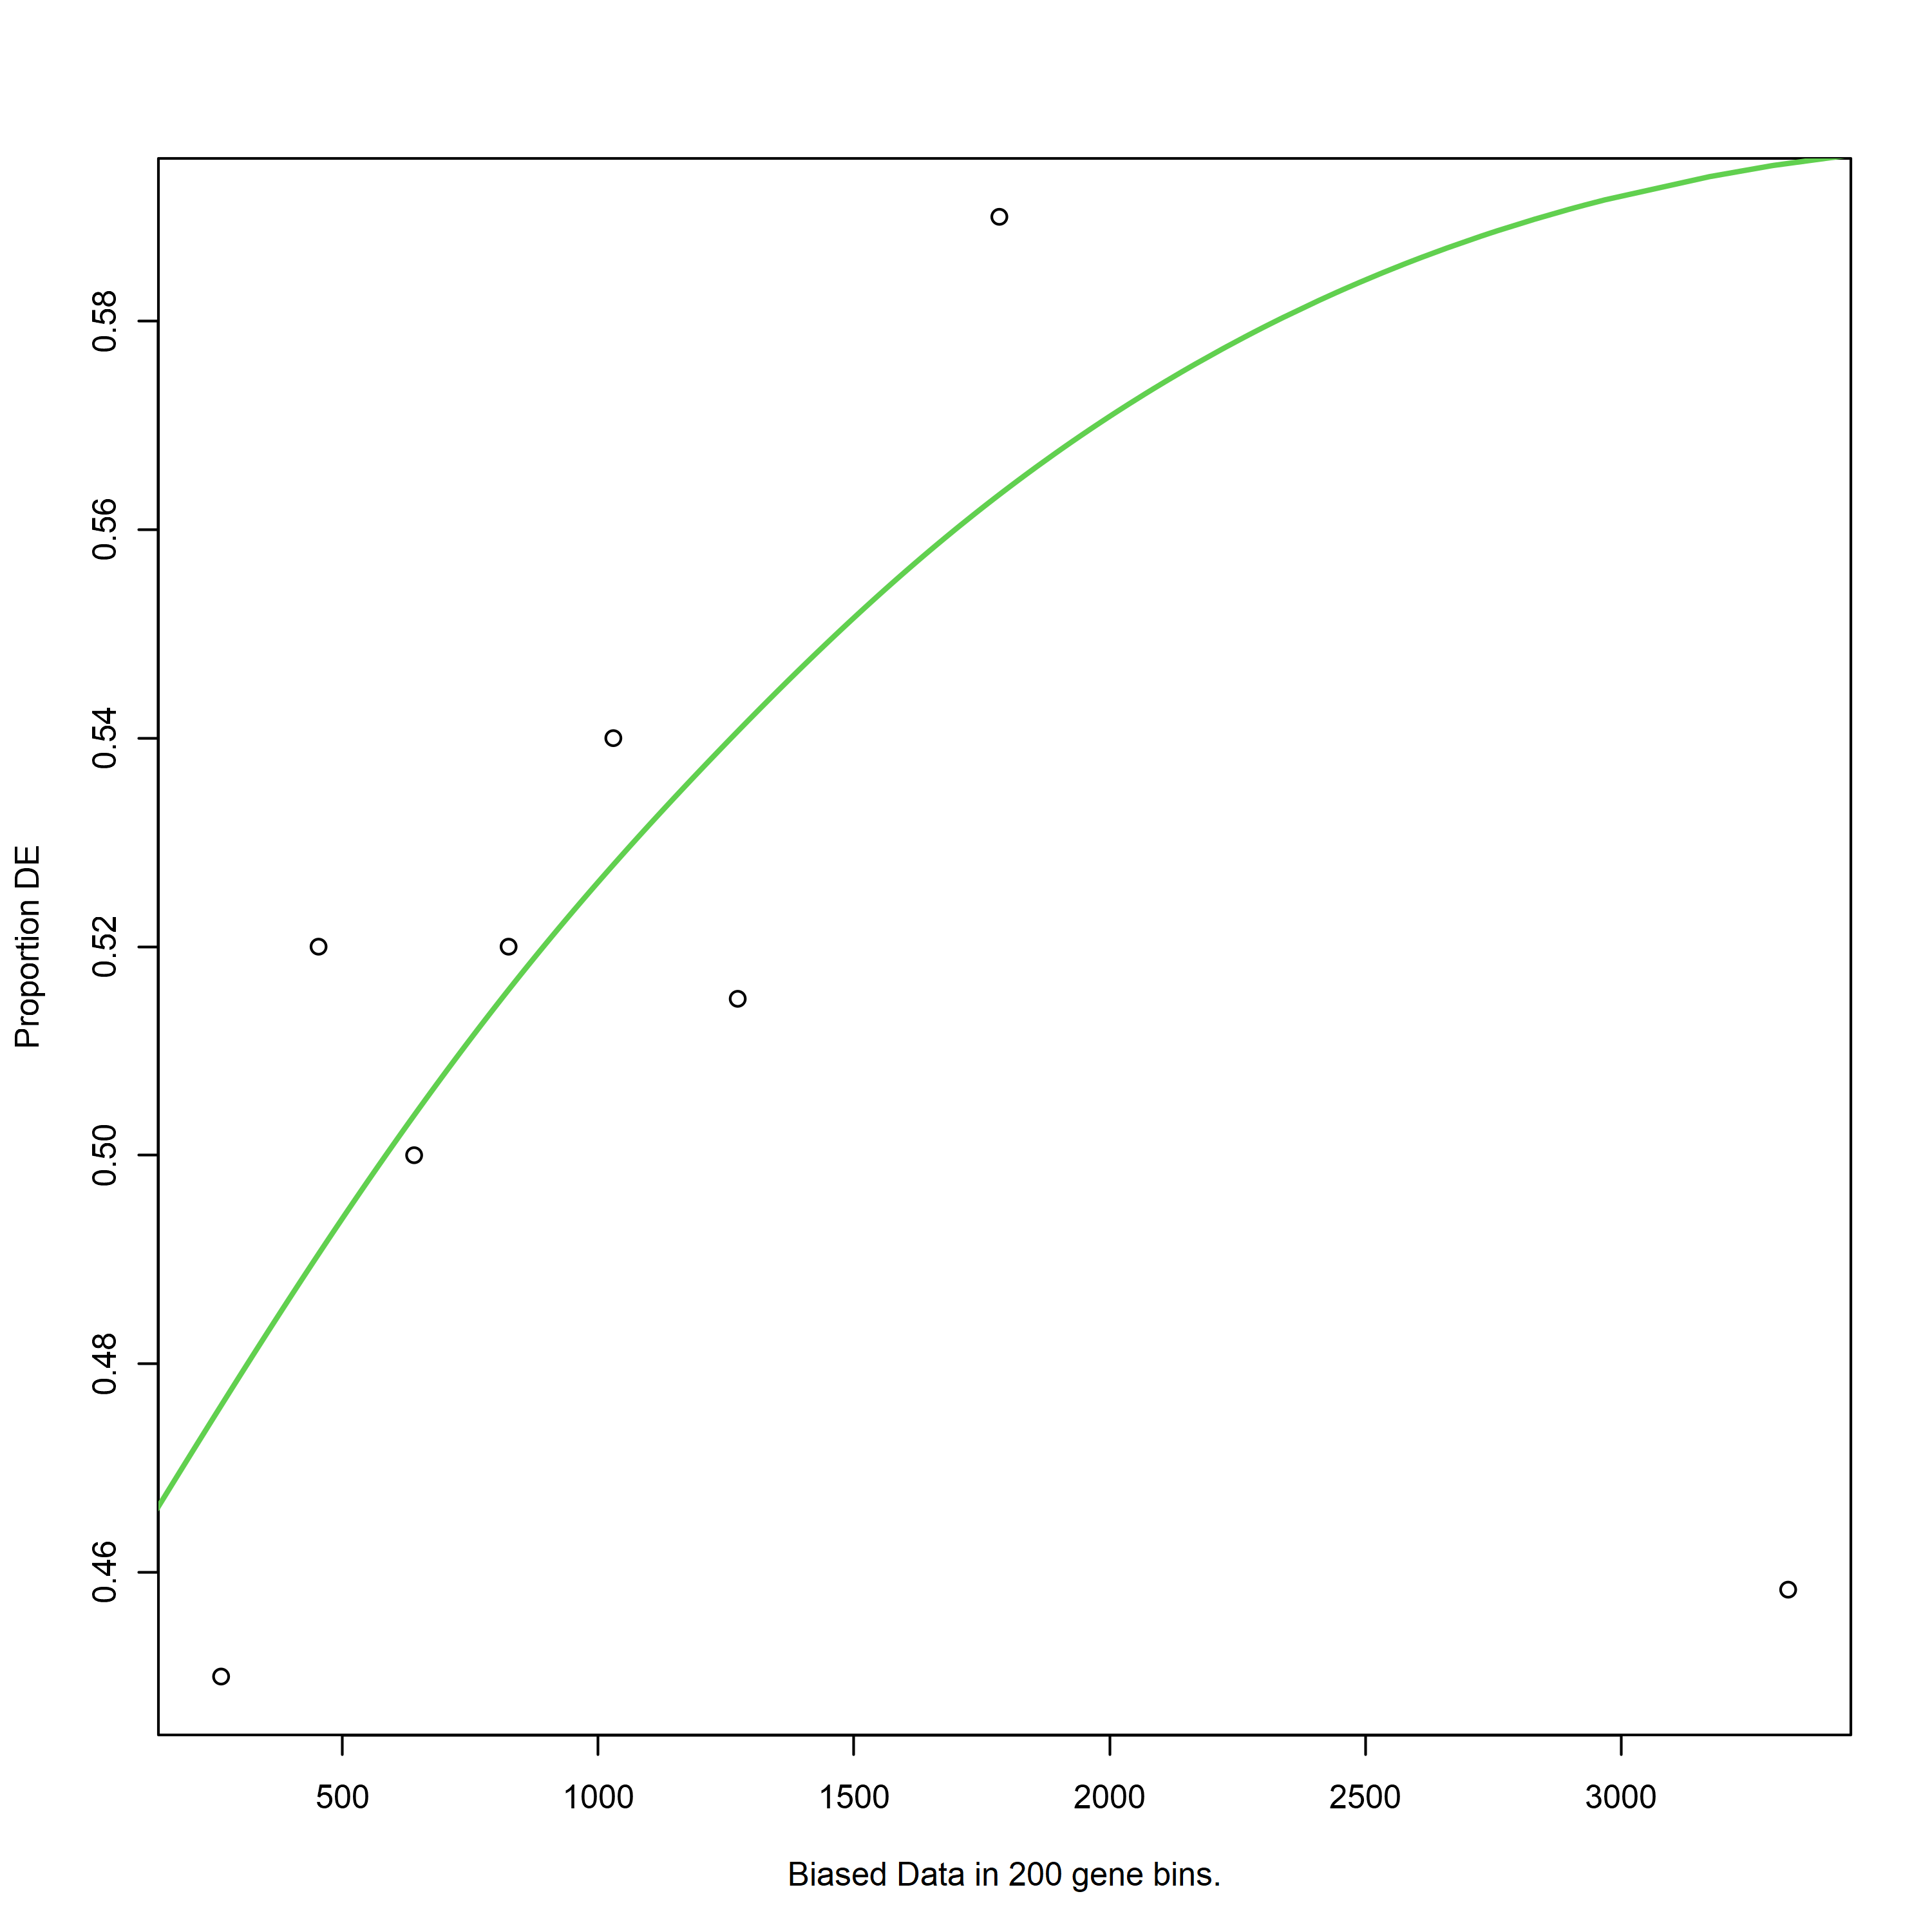

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in pcls(G):
"initial point very close to some inequality constraints"


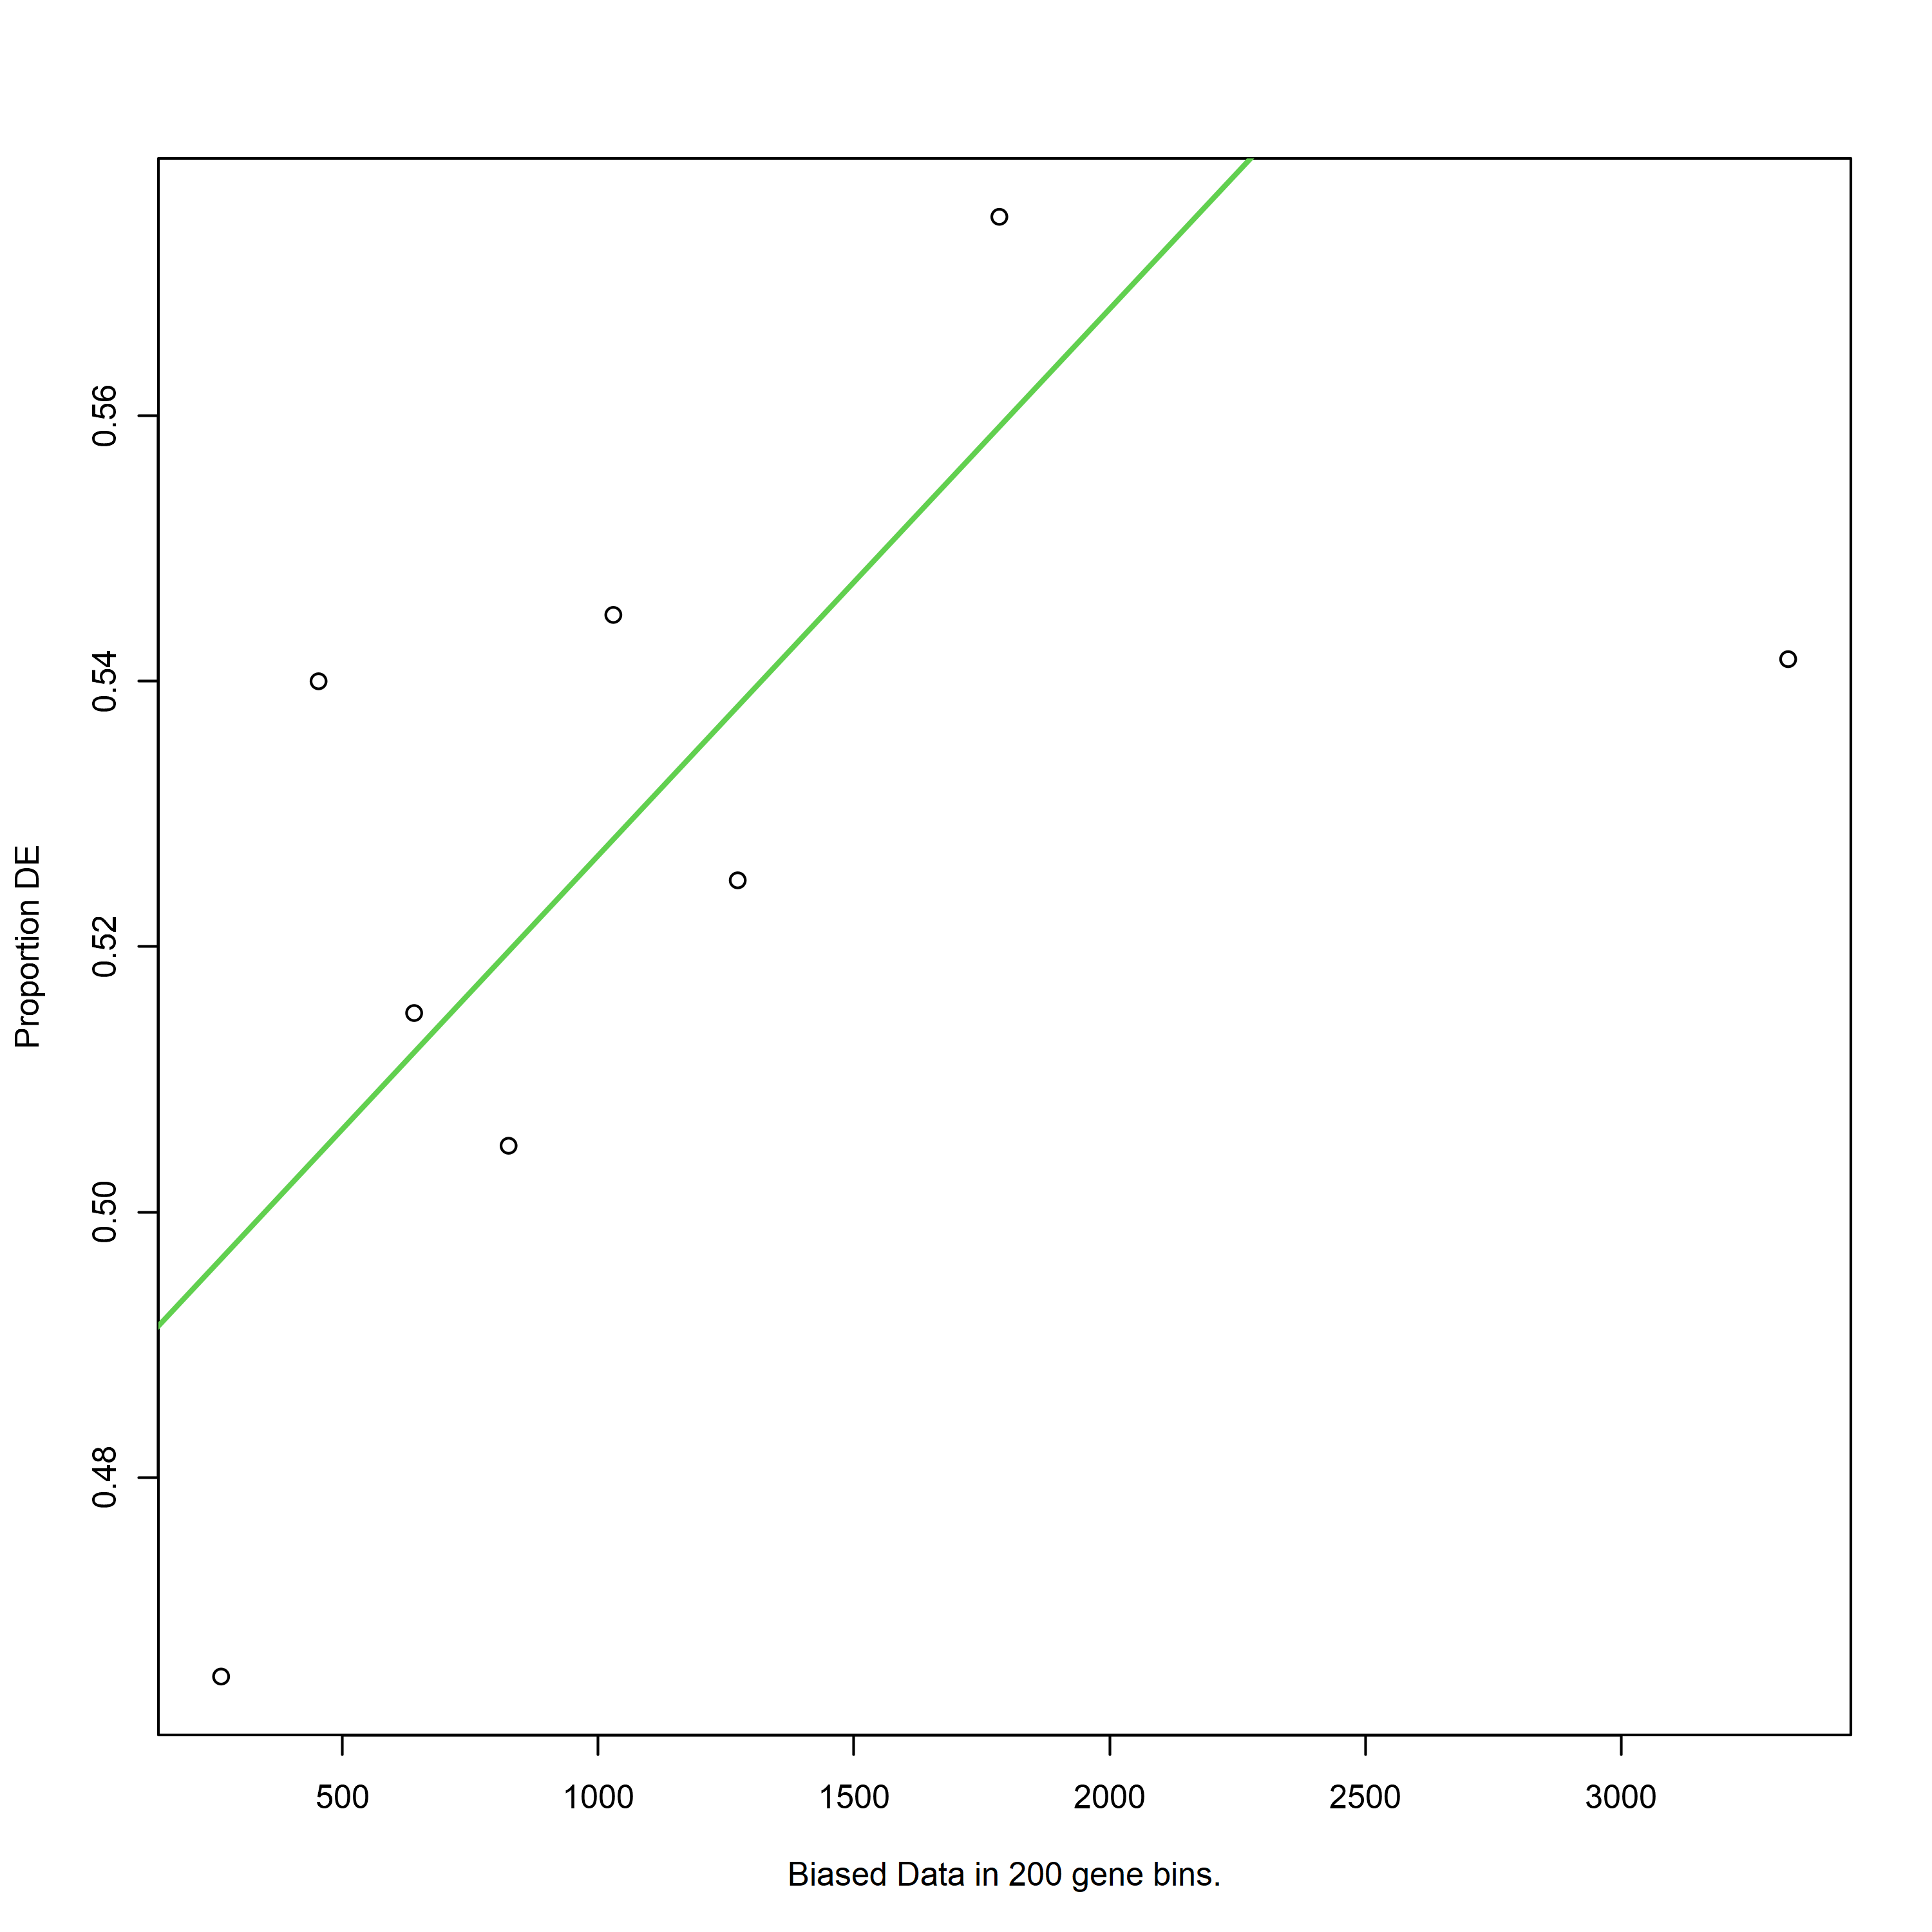

Using manually entered categories.

For 502 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



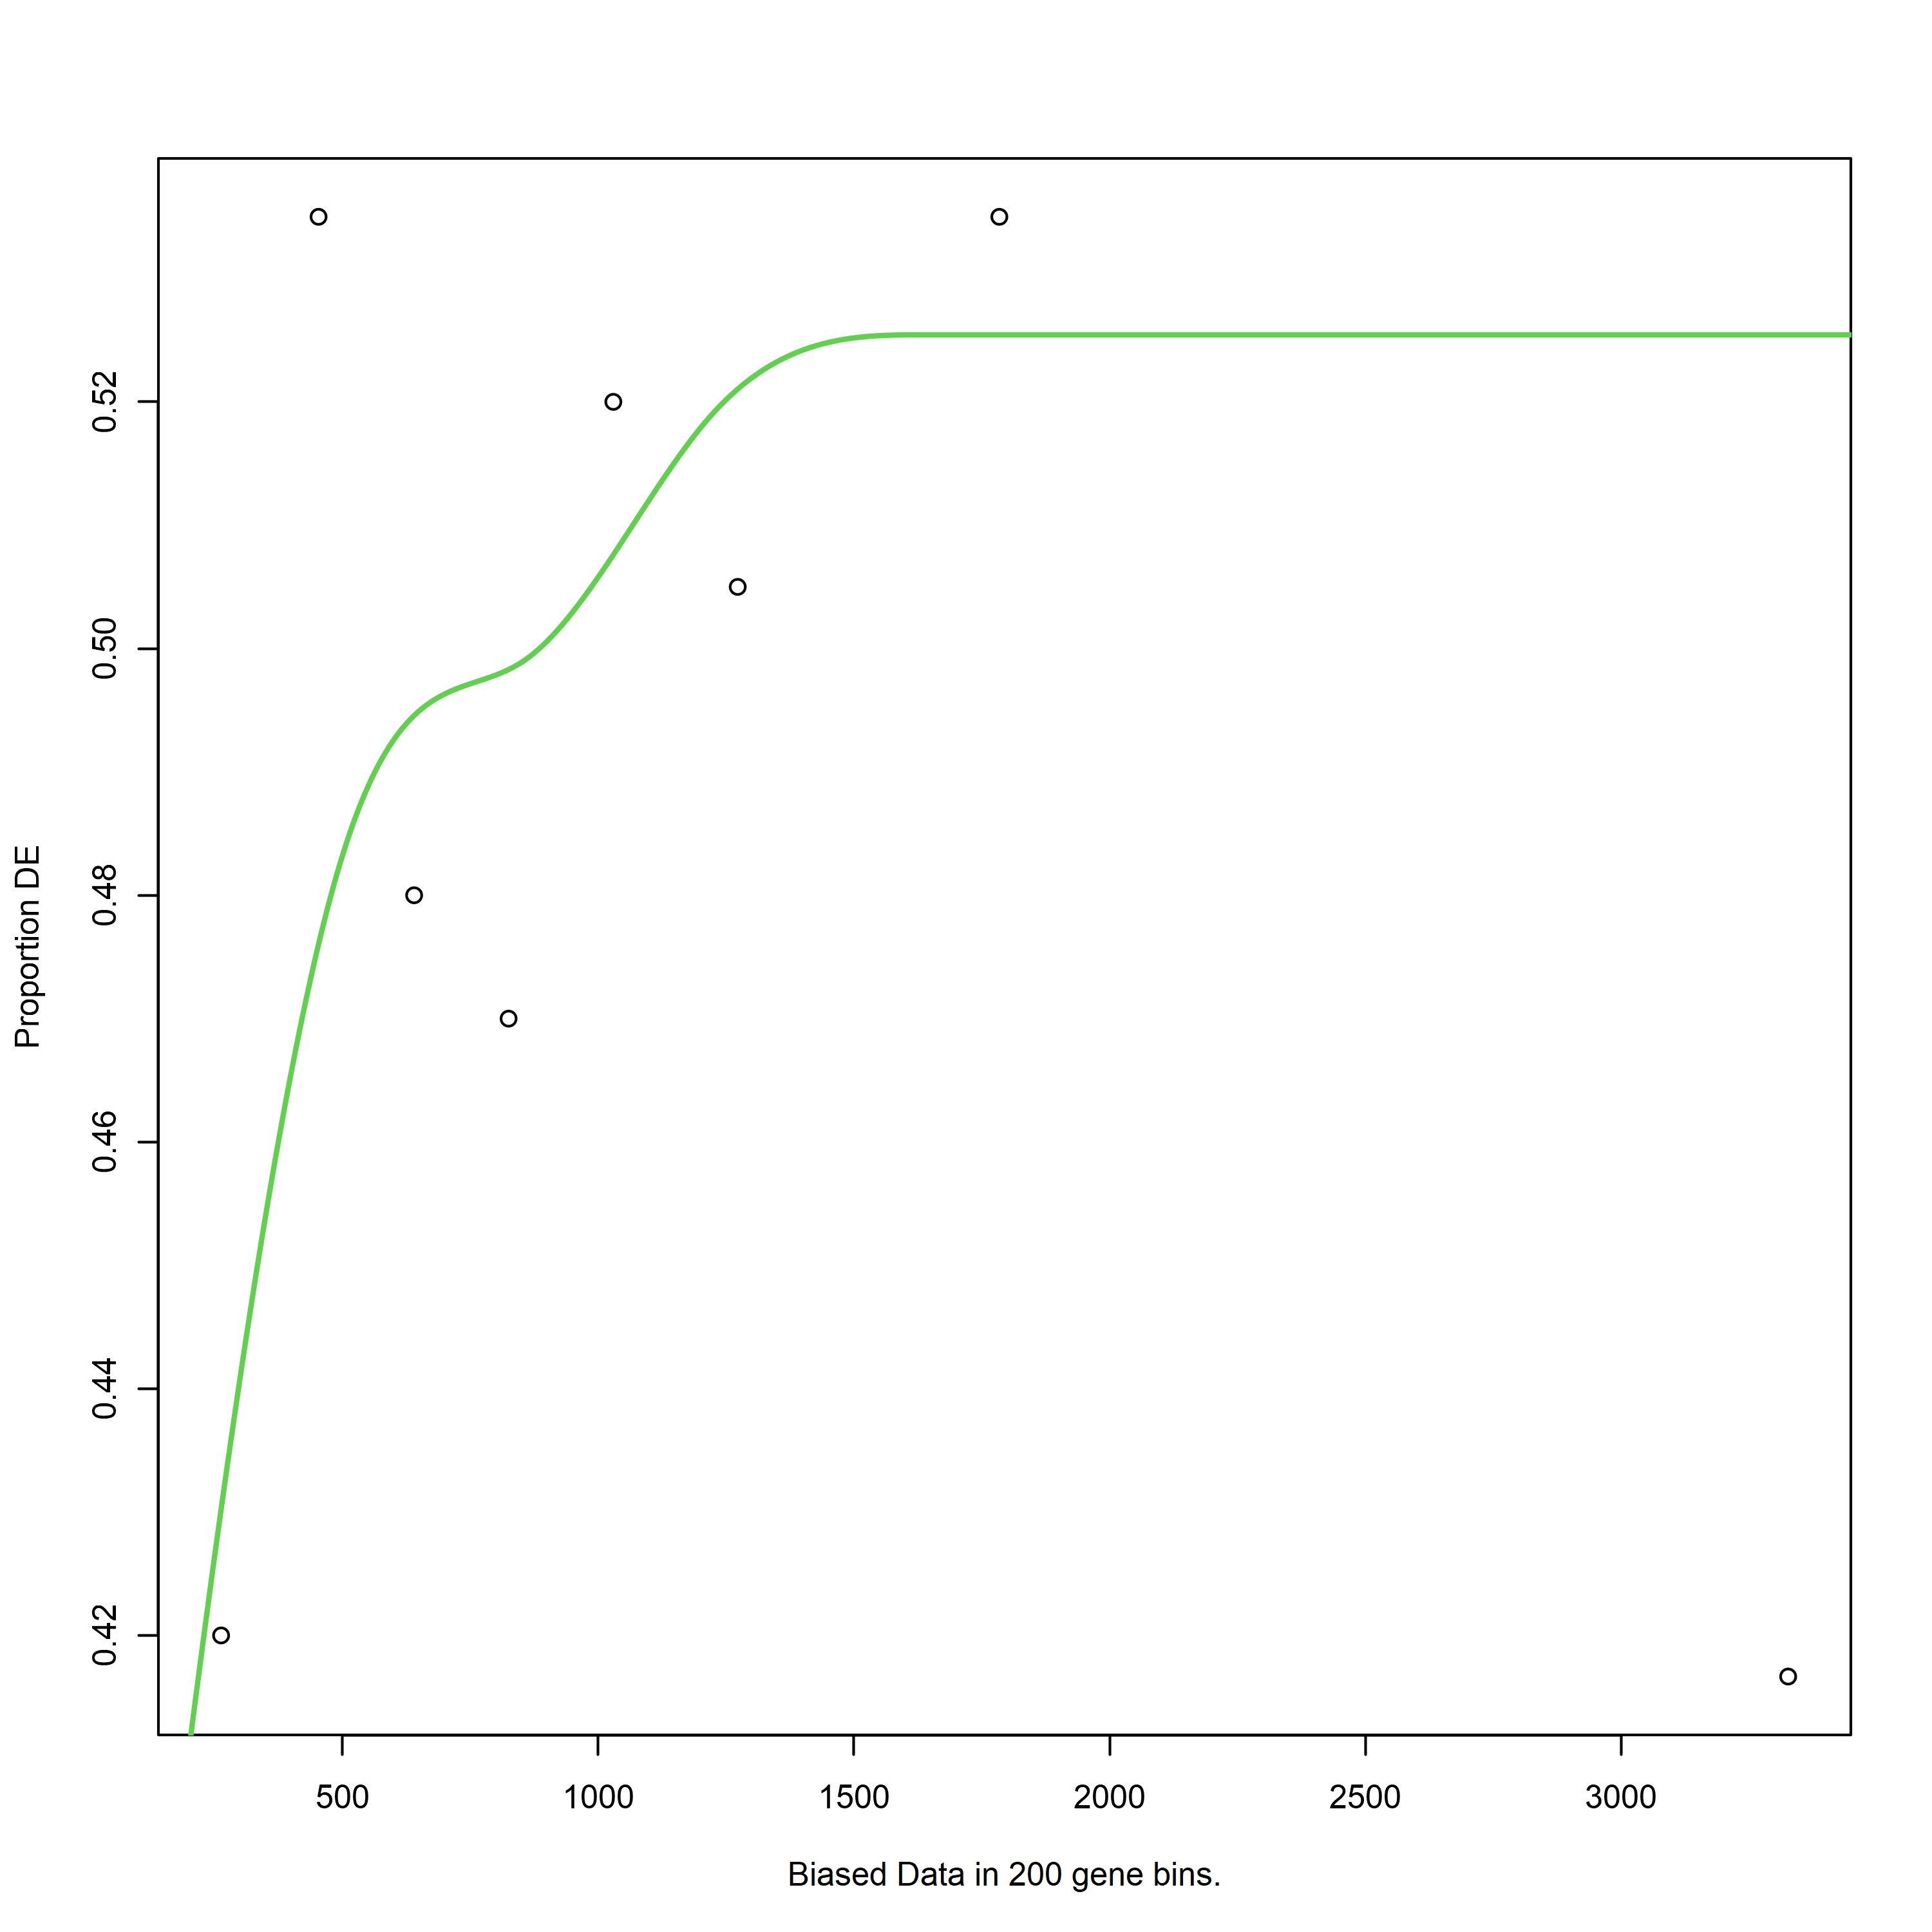

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



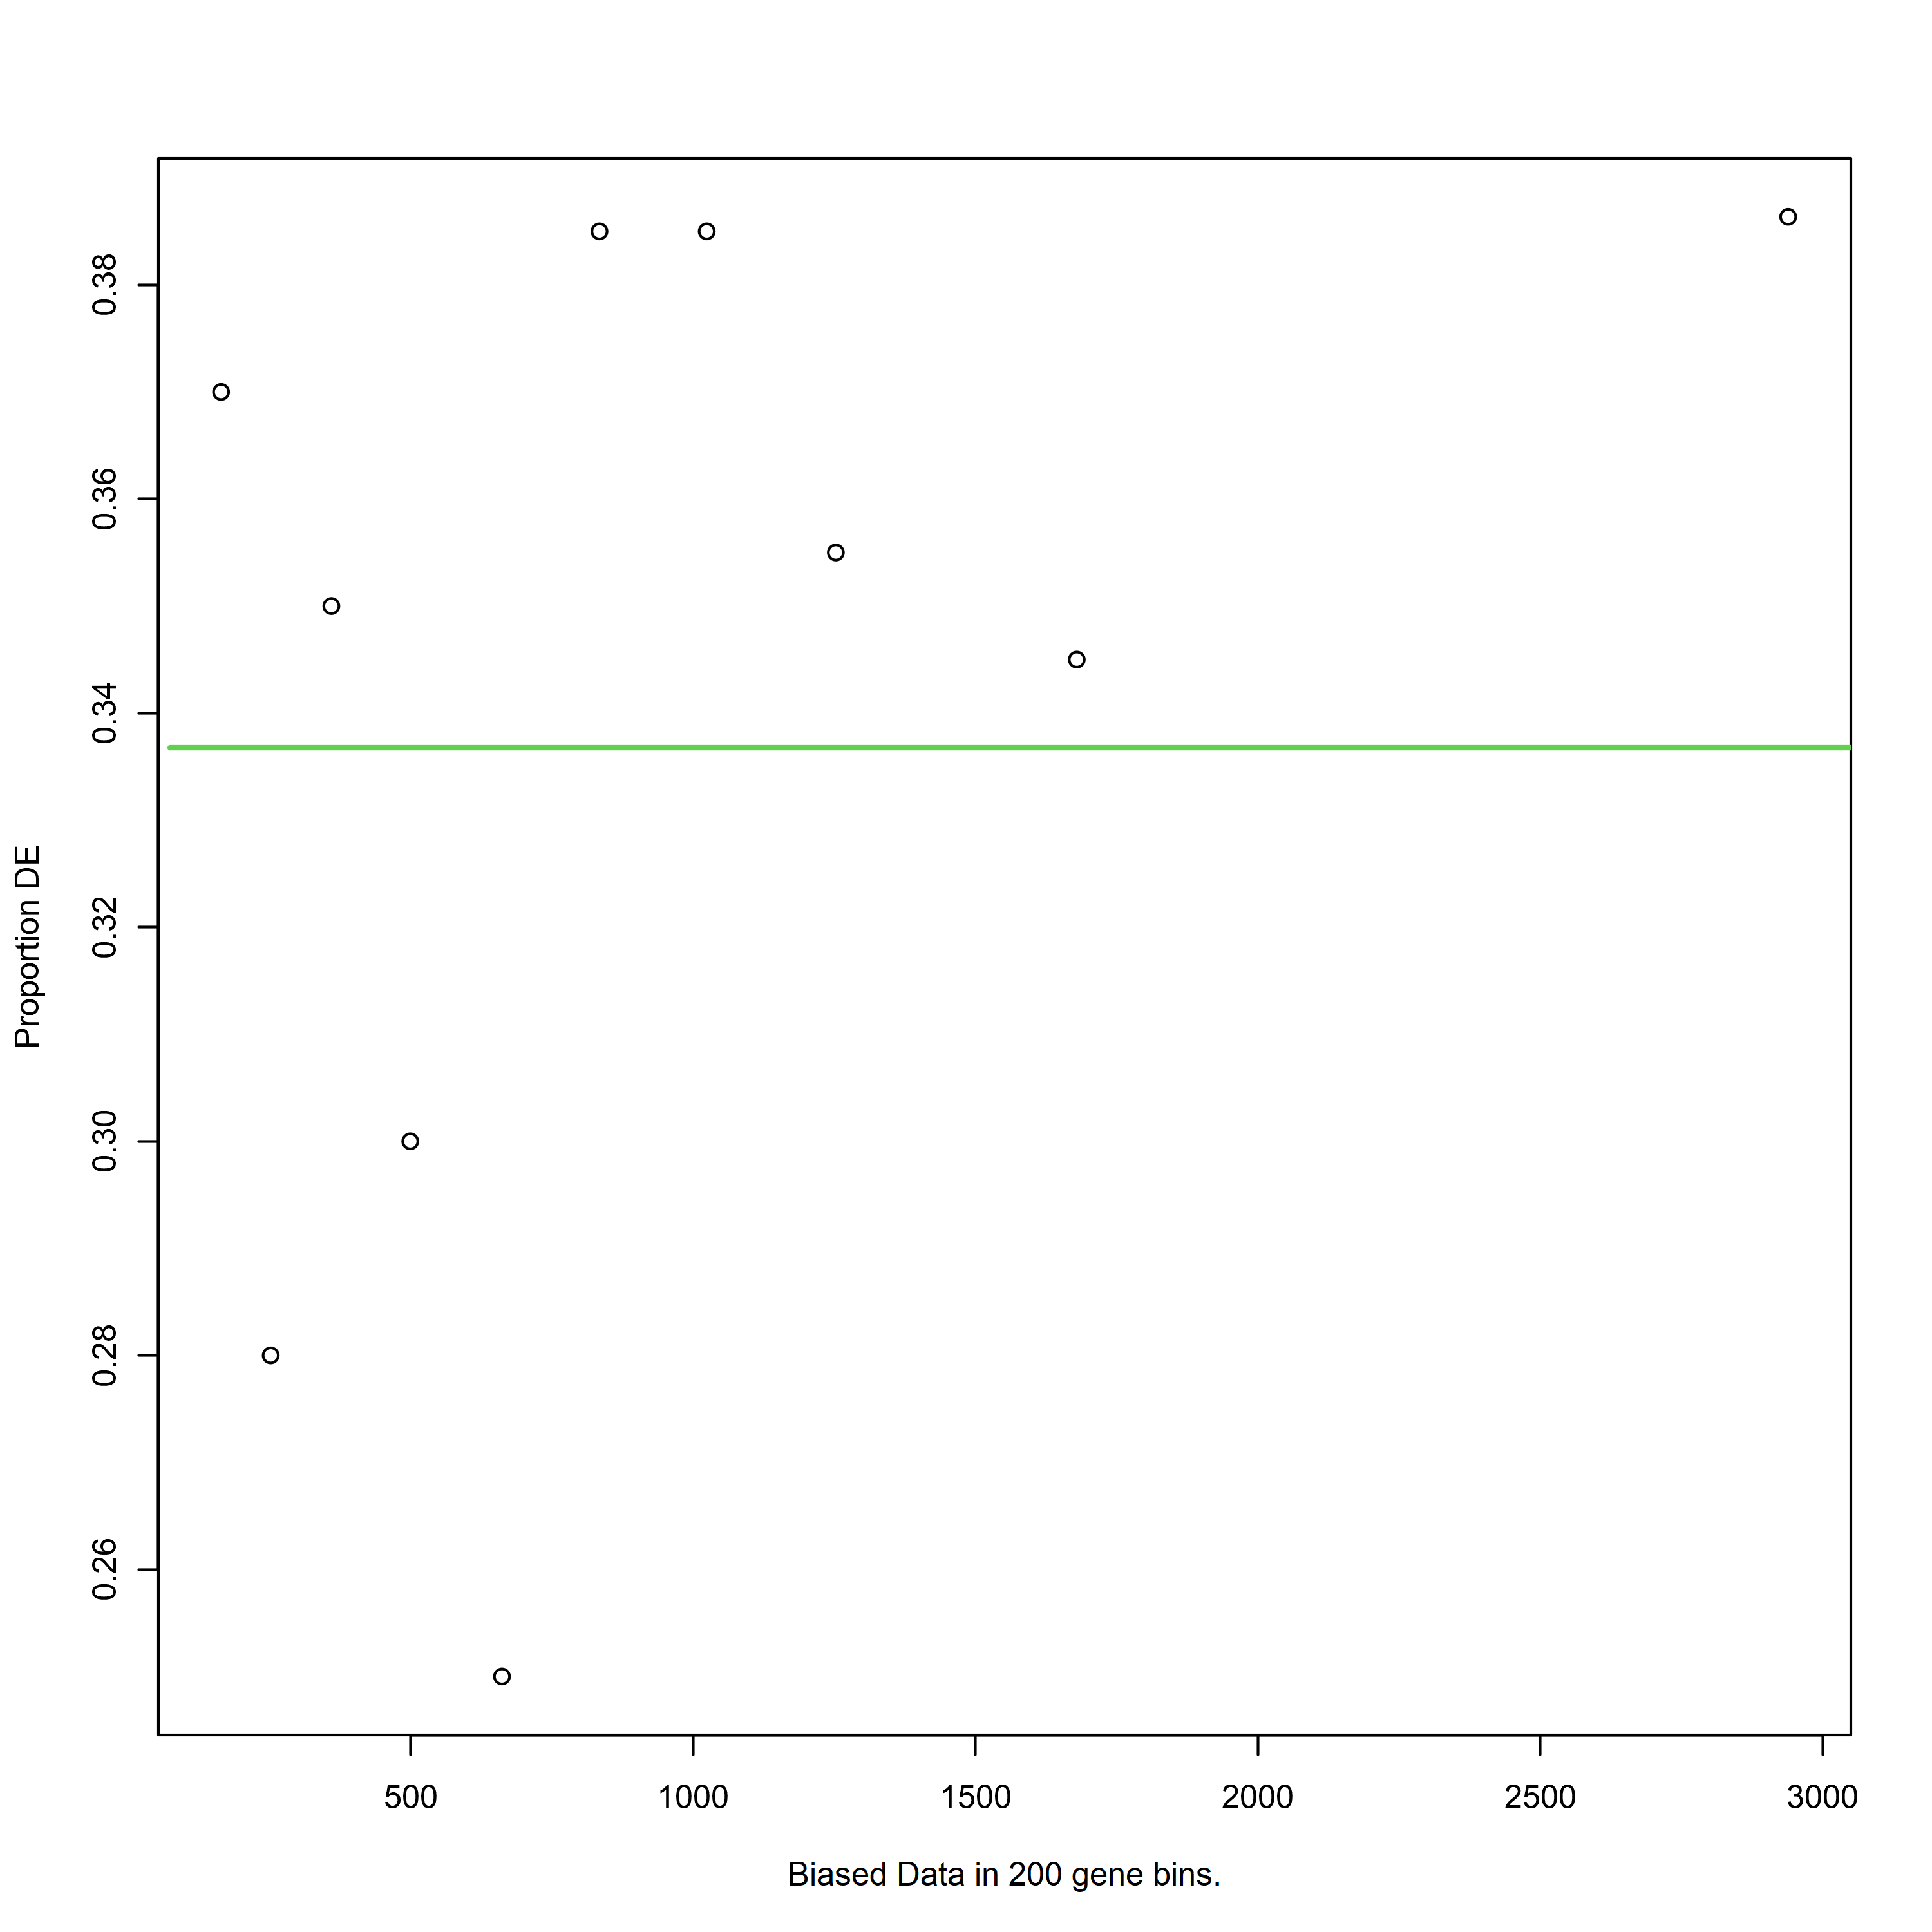

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



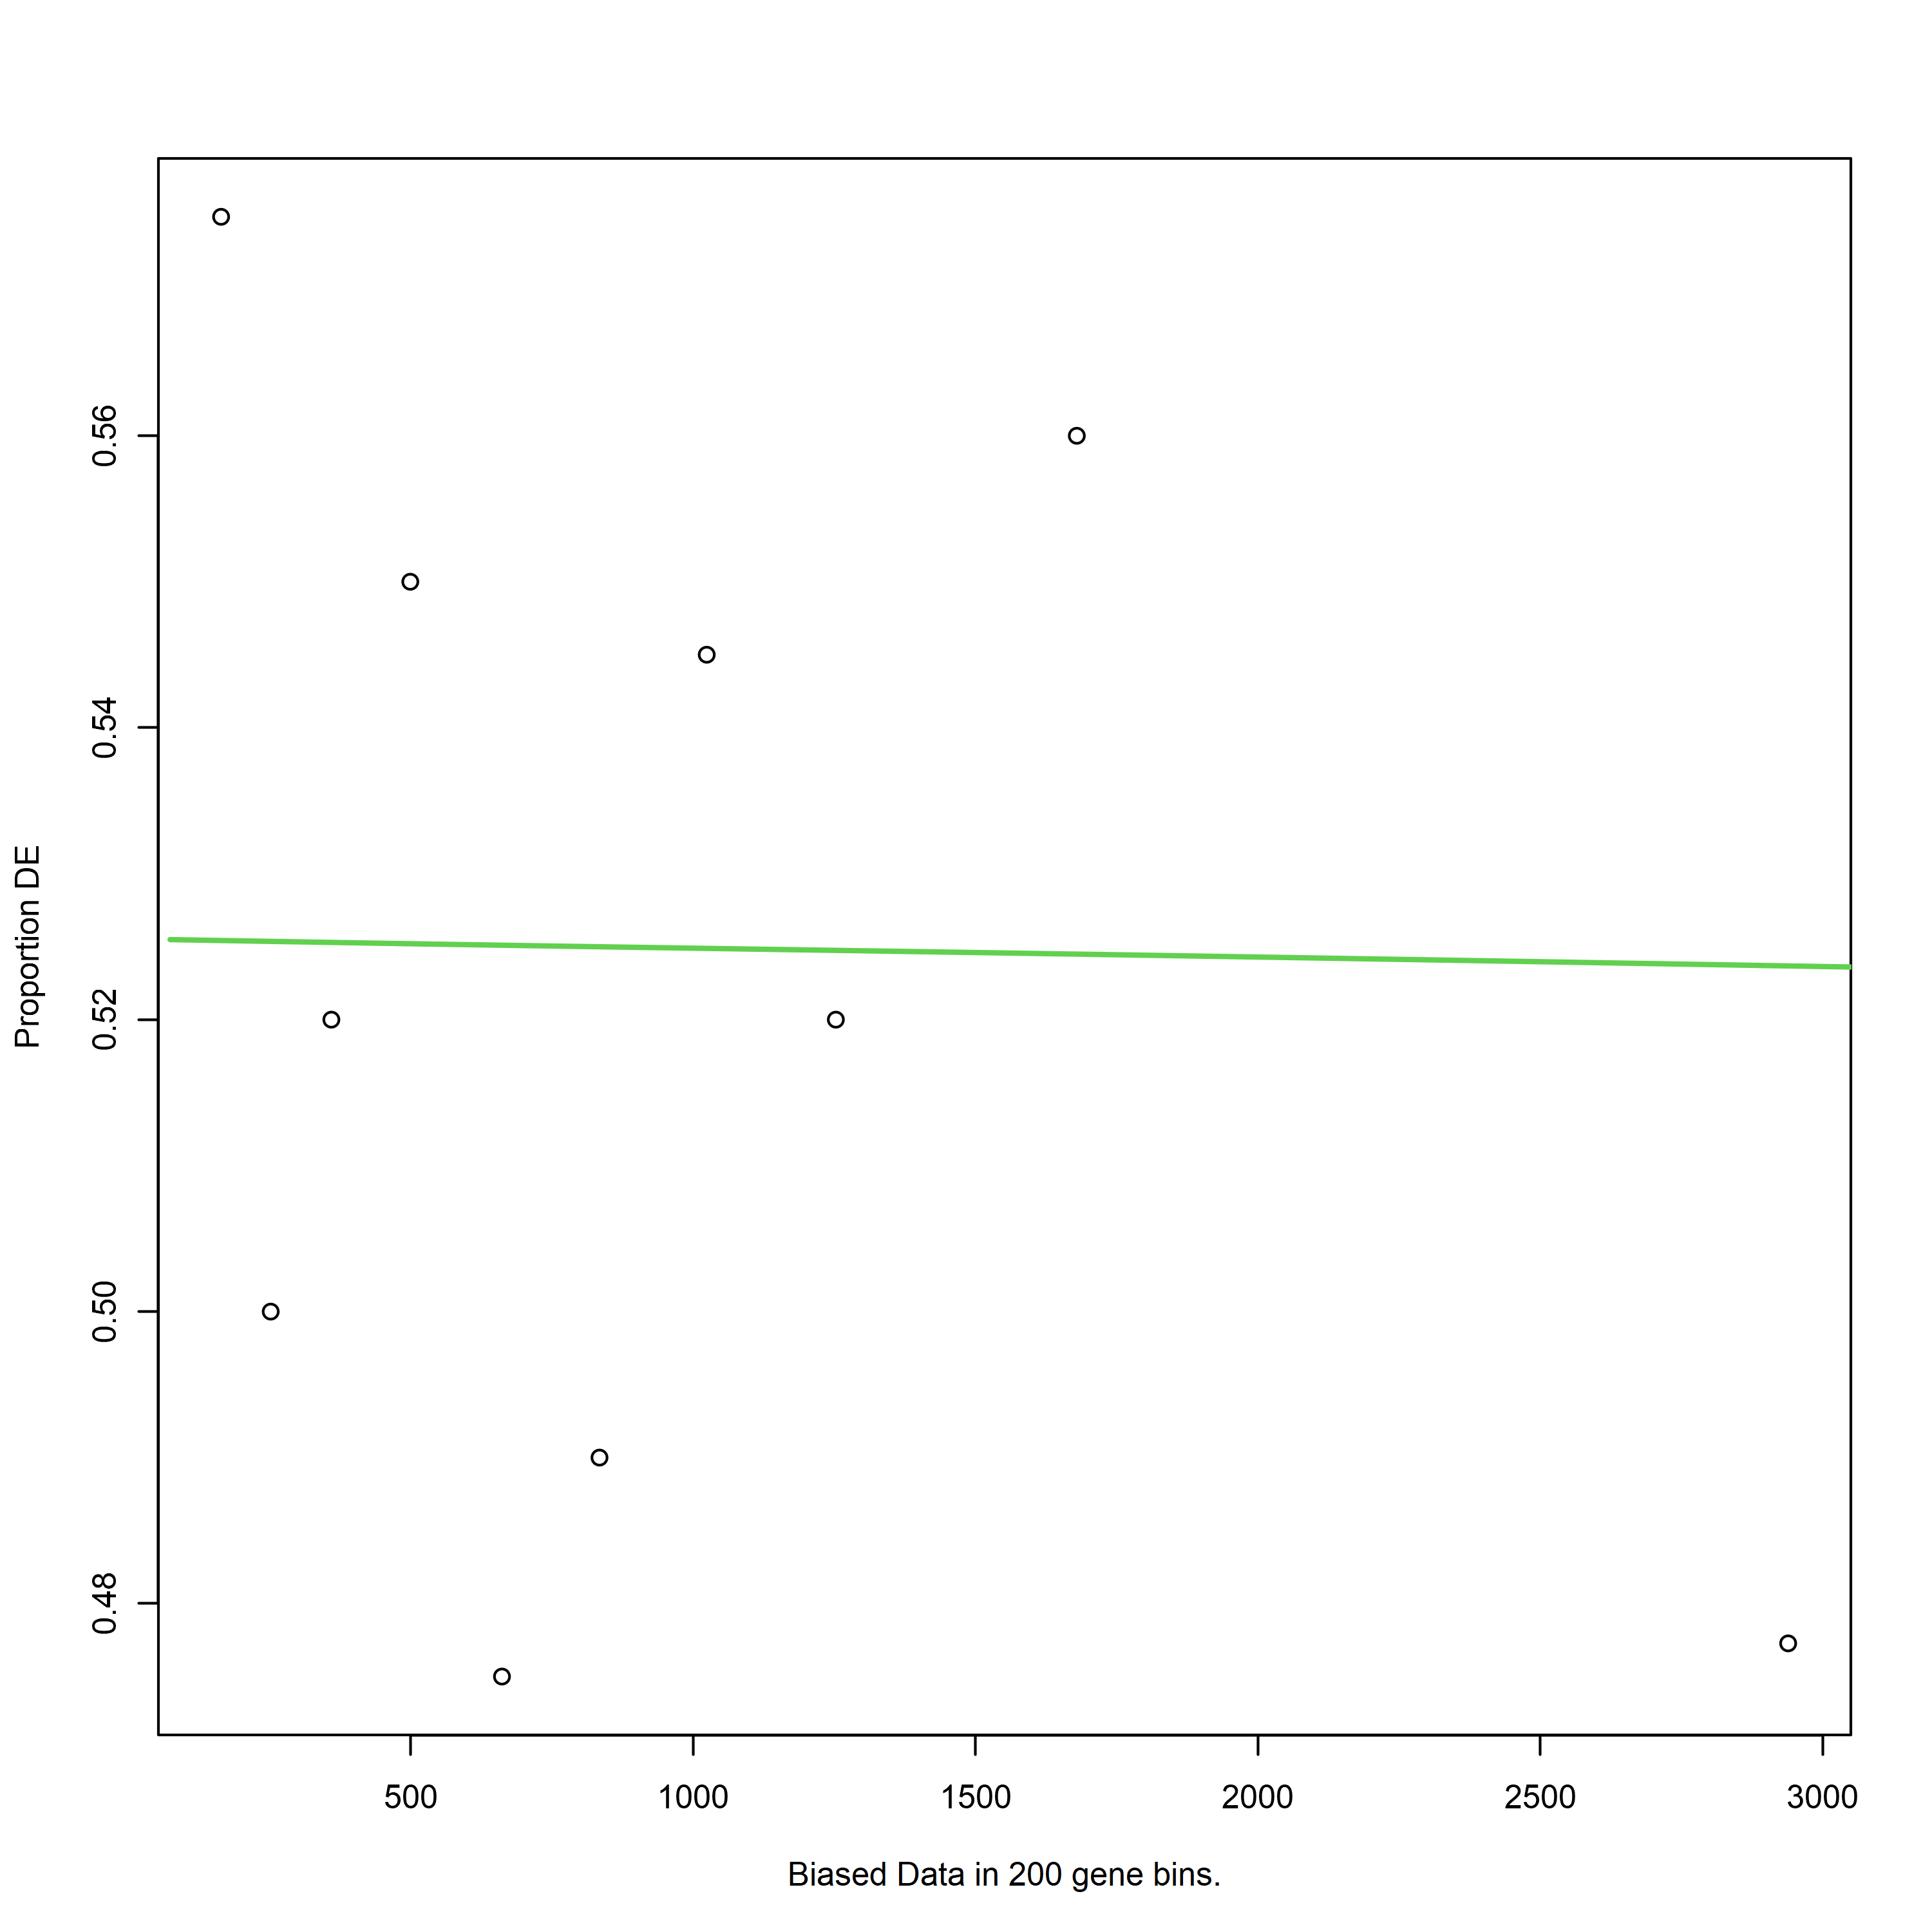

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



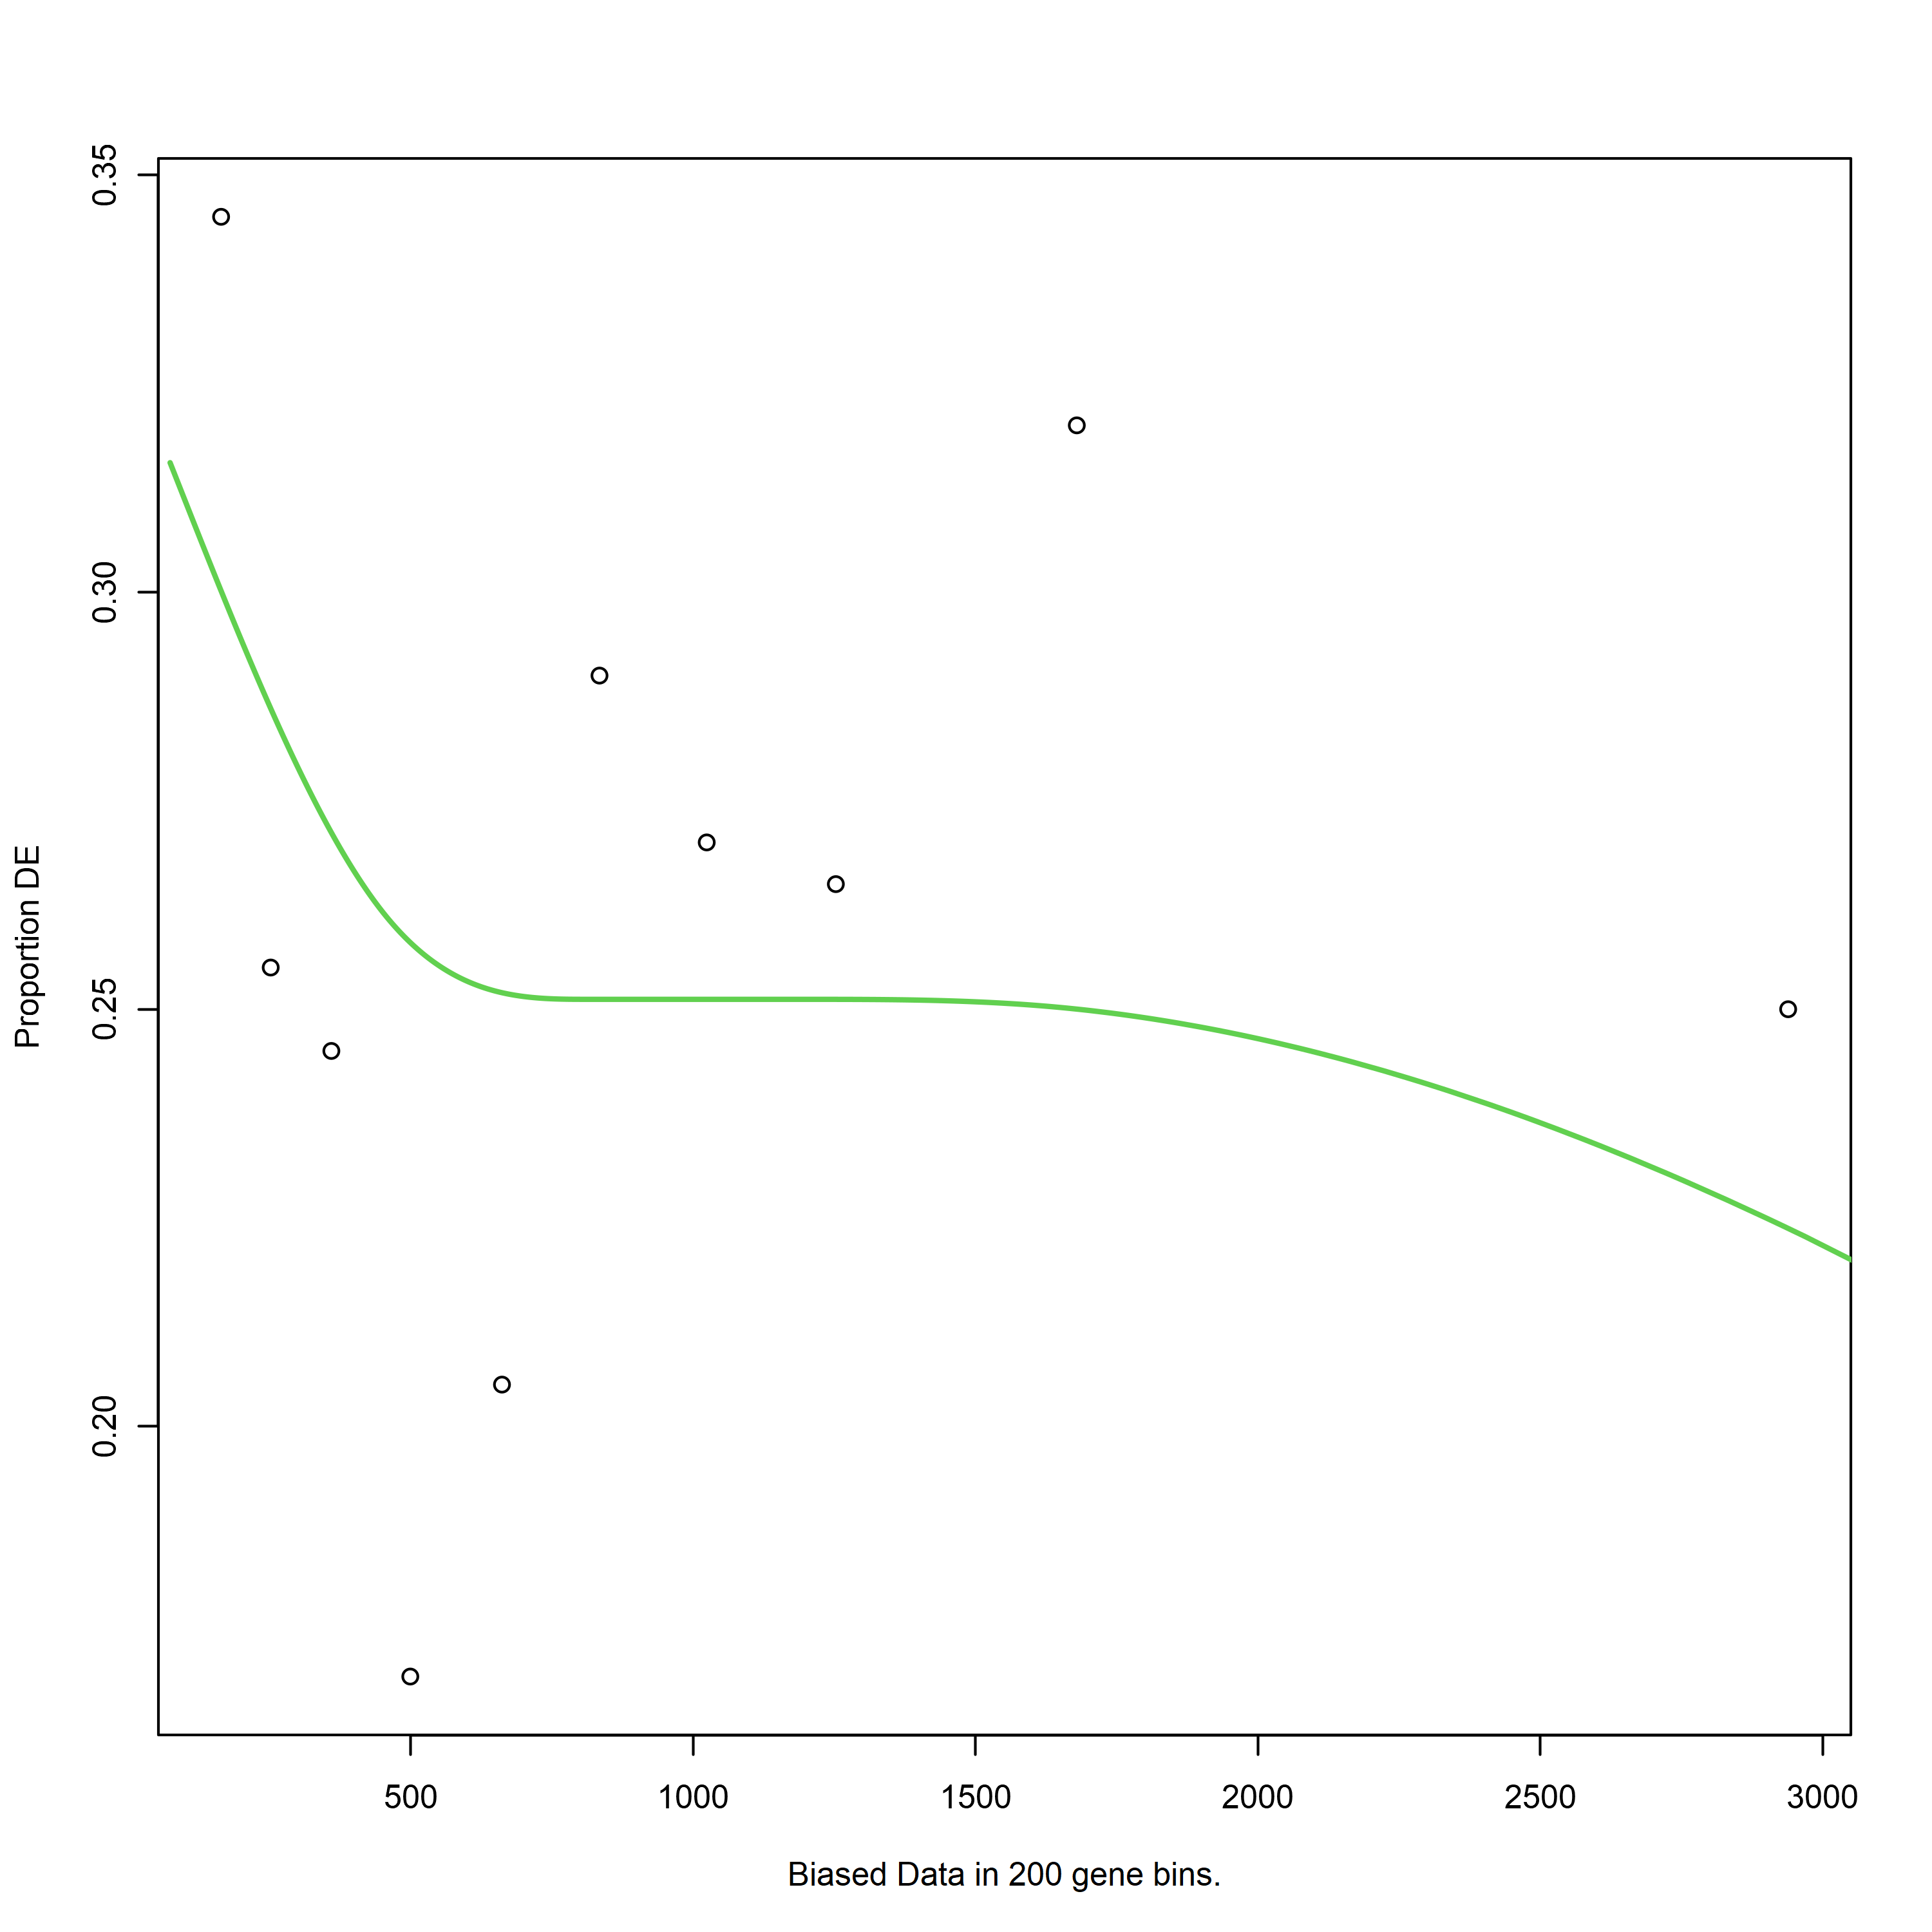

Using manually entered categories.

For 847 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
"Fitting terminated with step failure - check results carefully"
Using manually entered categories.

For 275 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
"Fitting terminated with step failure - check results carefully"


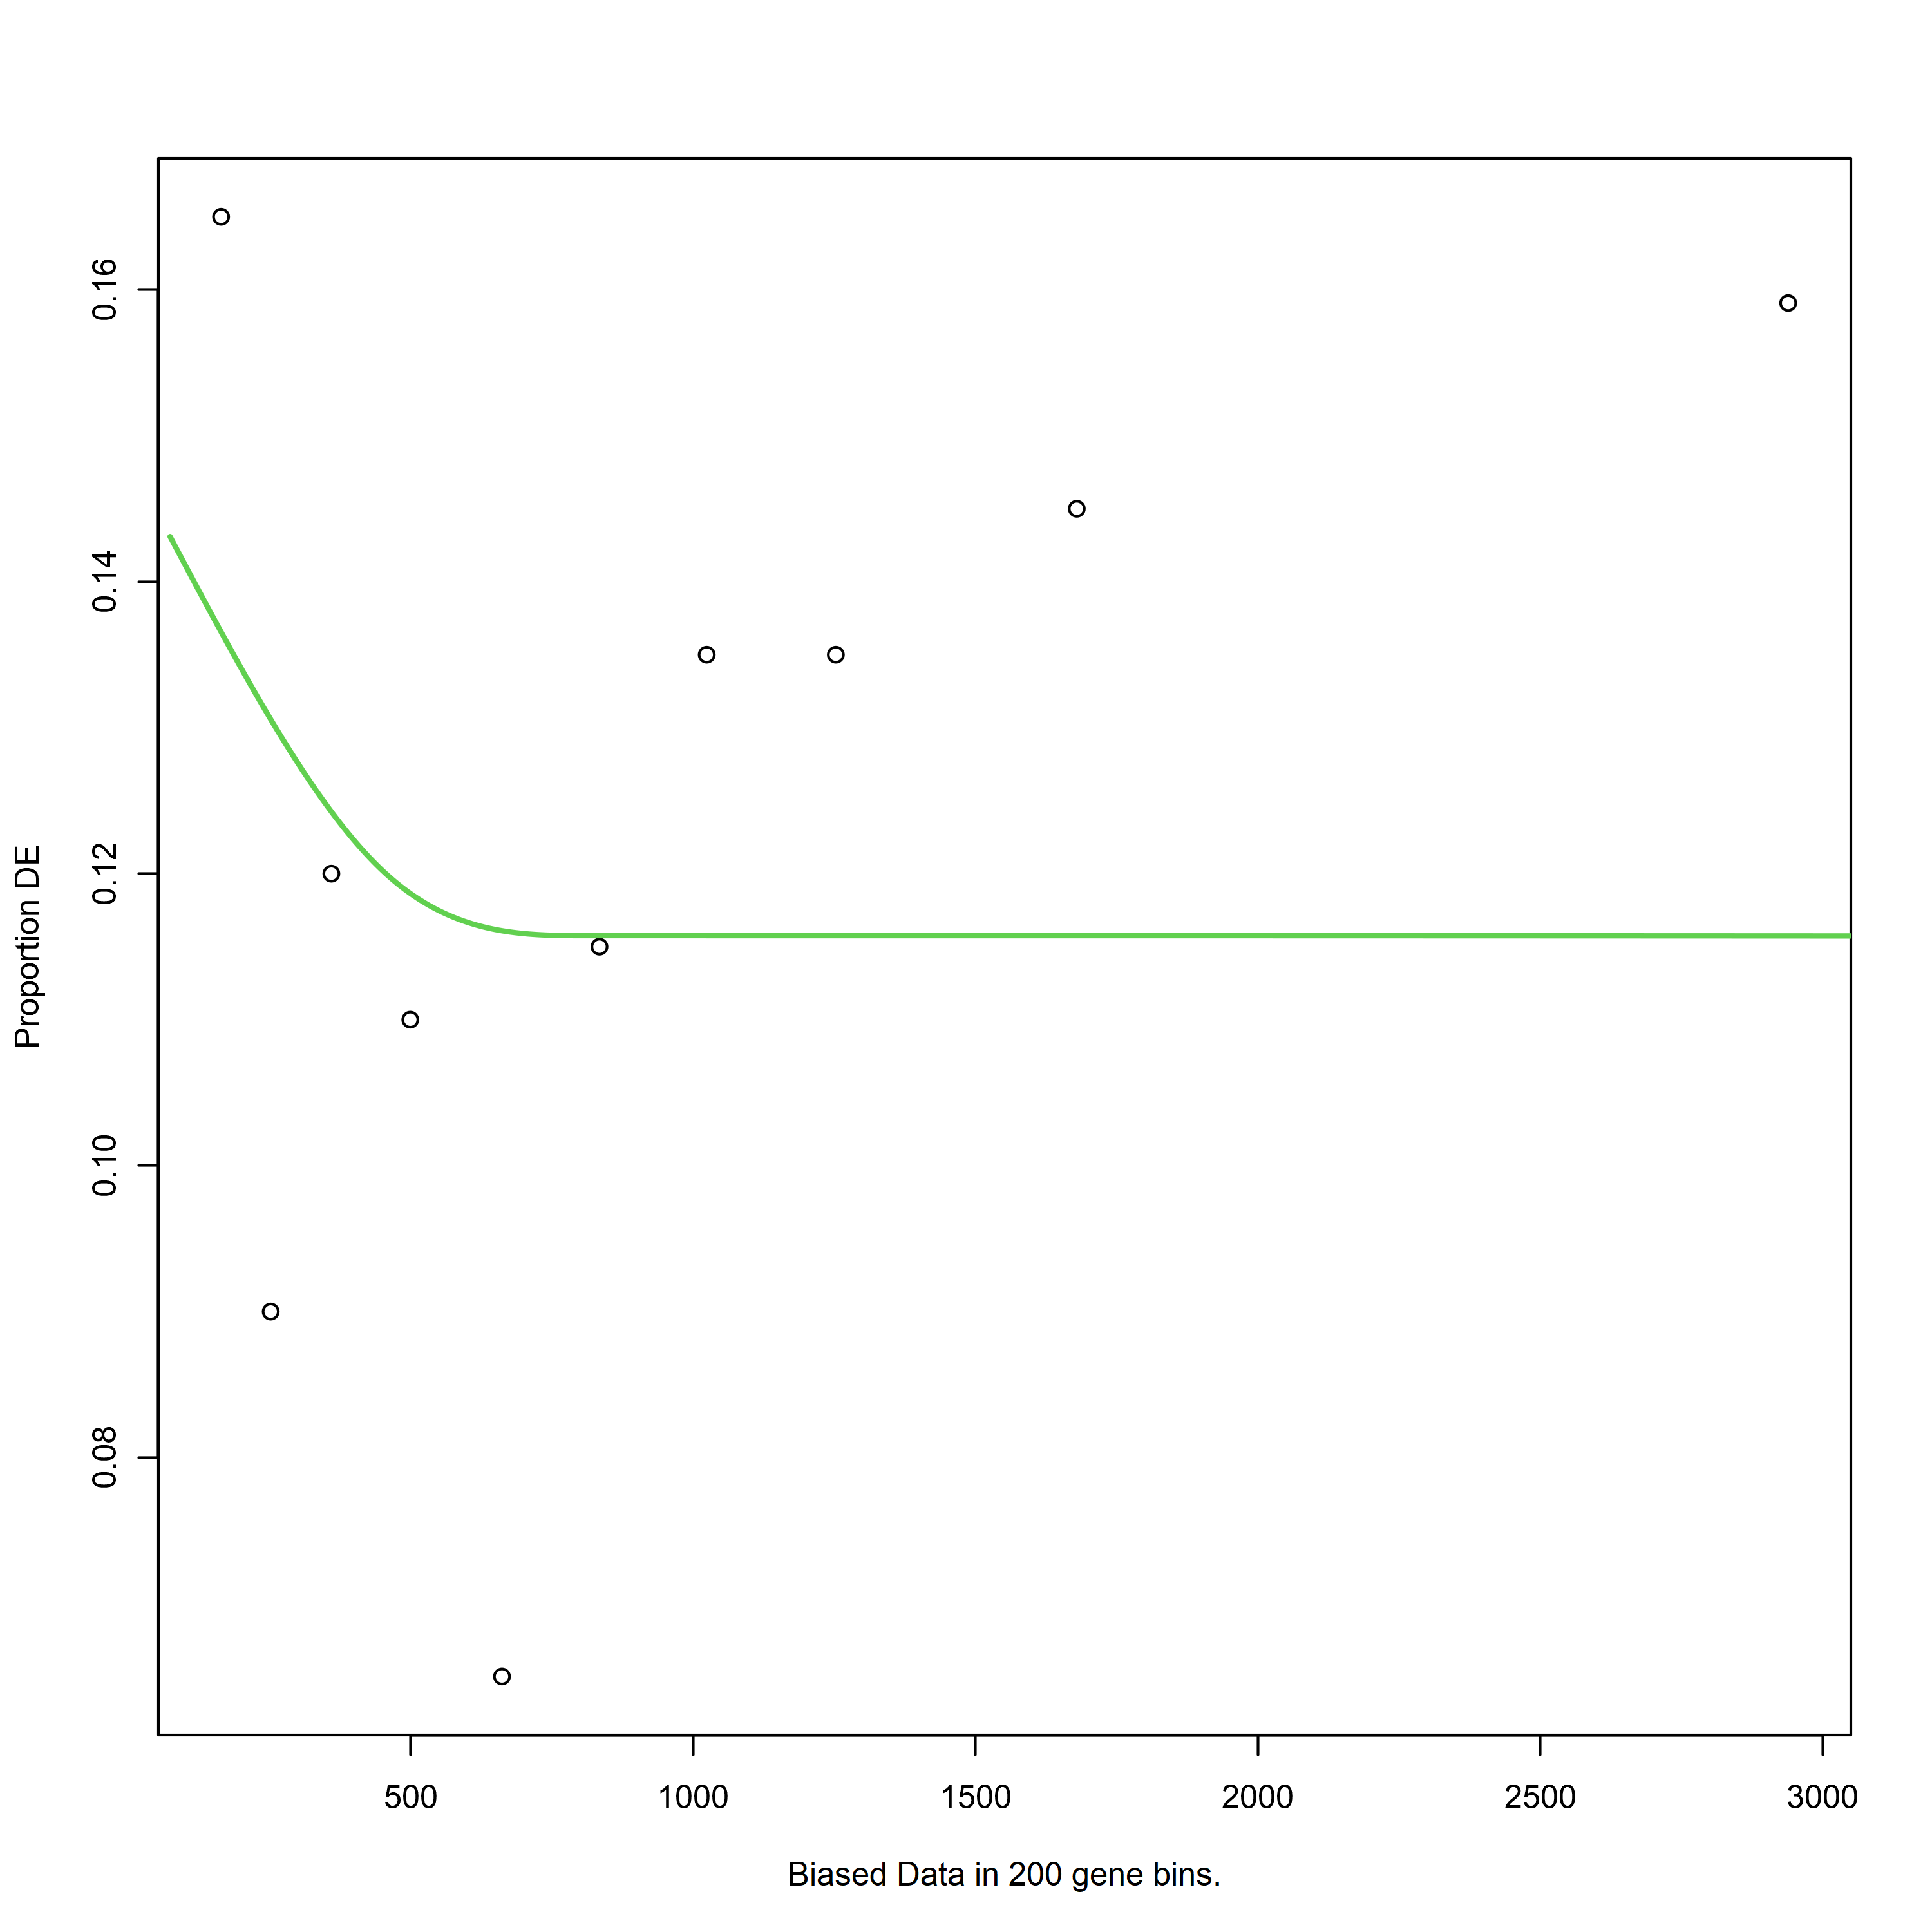

Using manually entered categories.

For 275 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



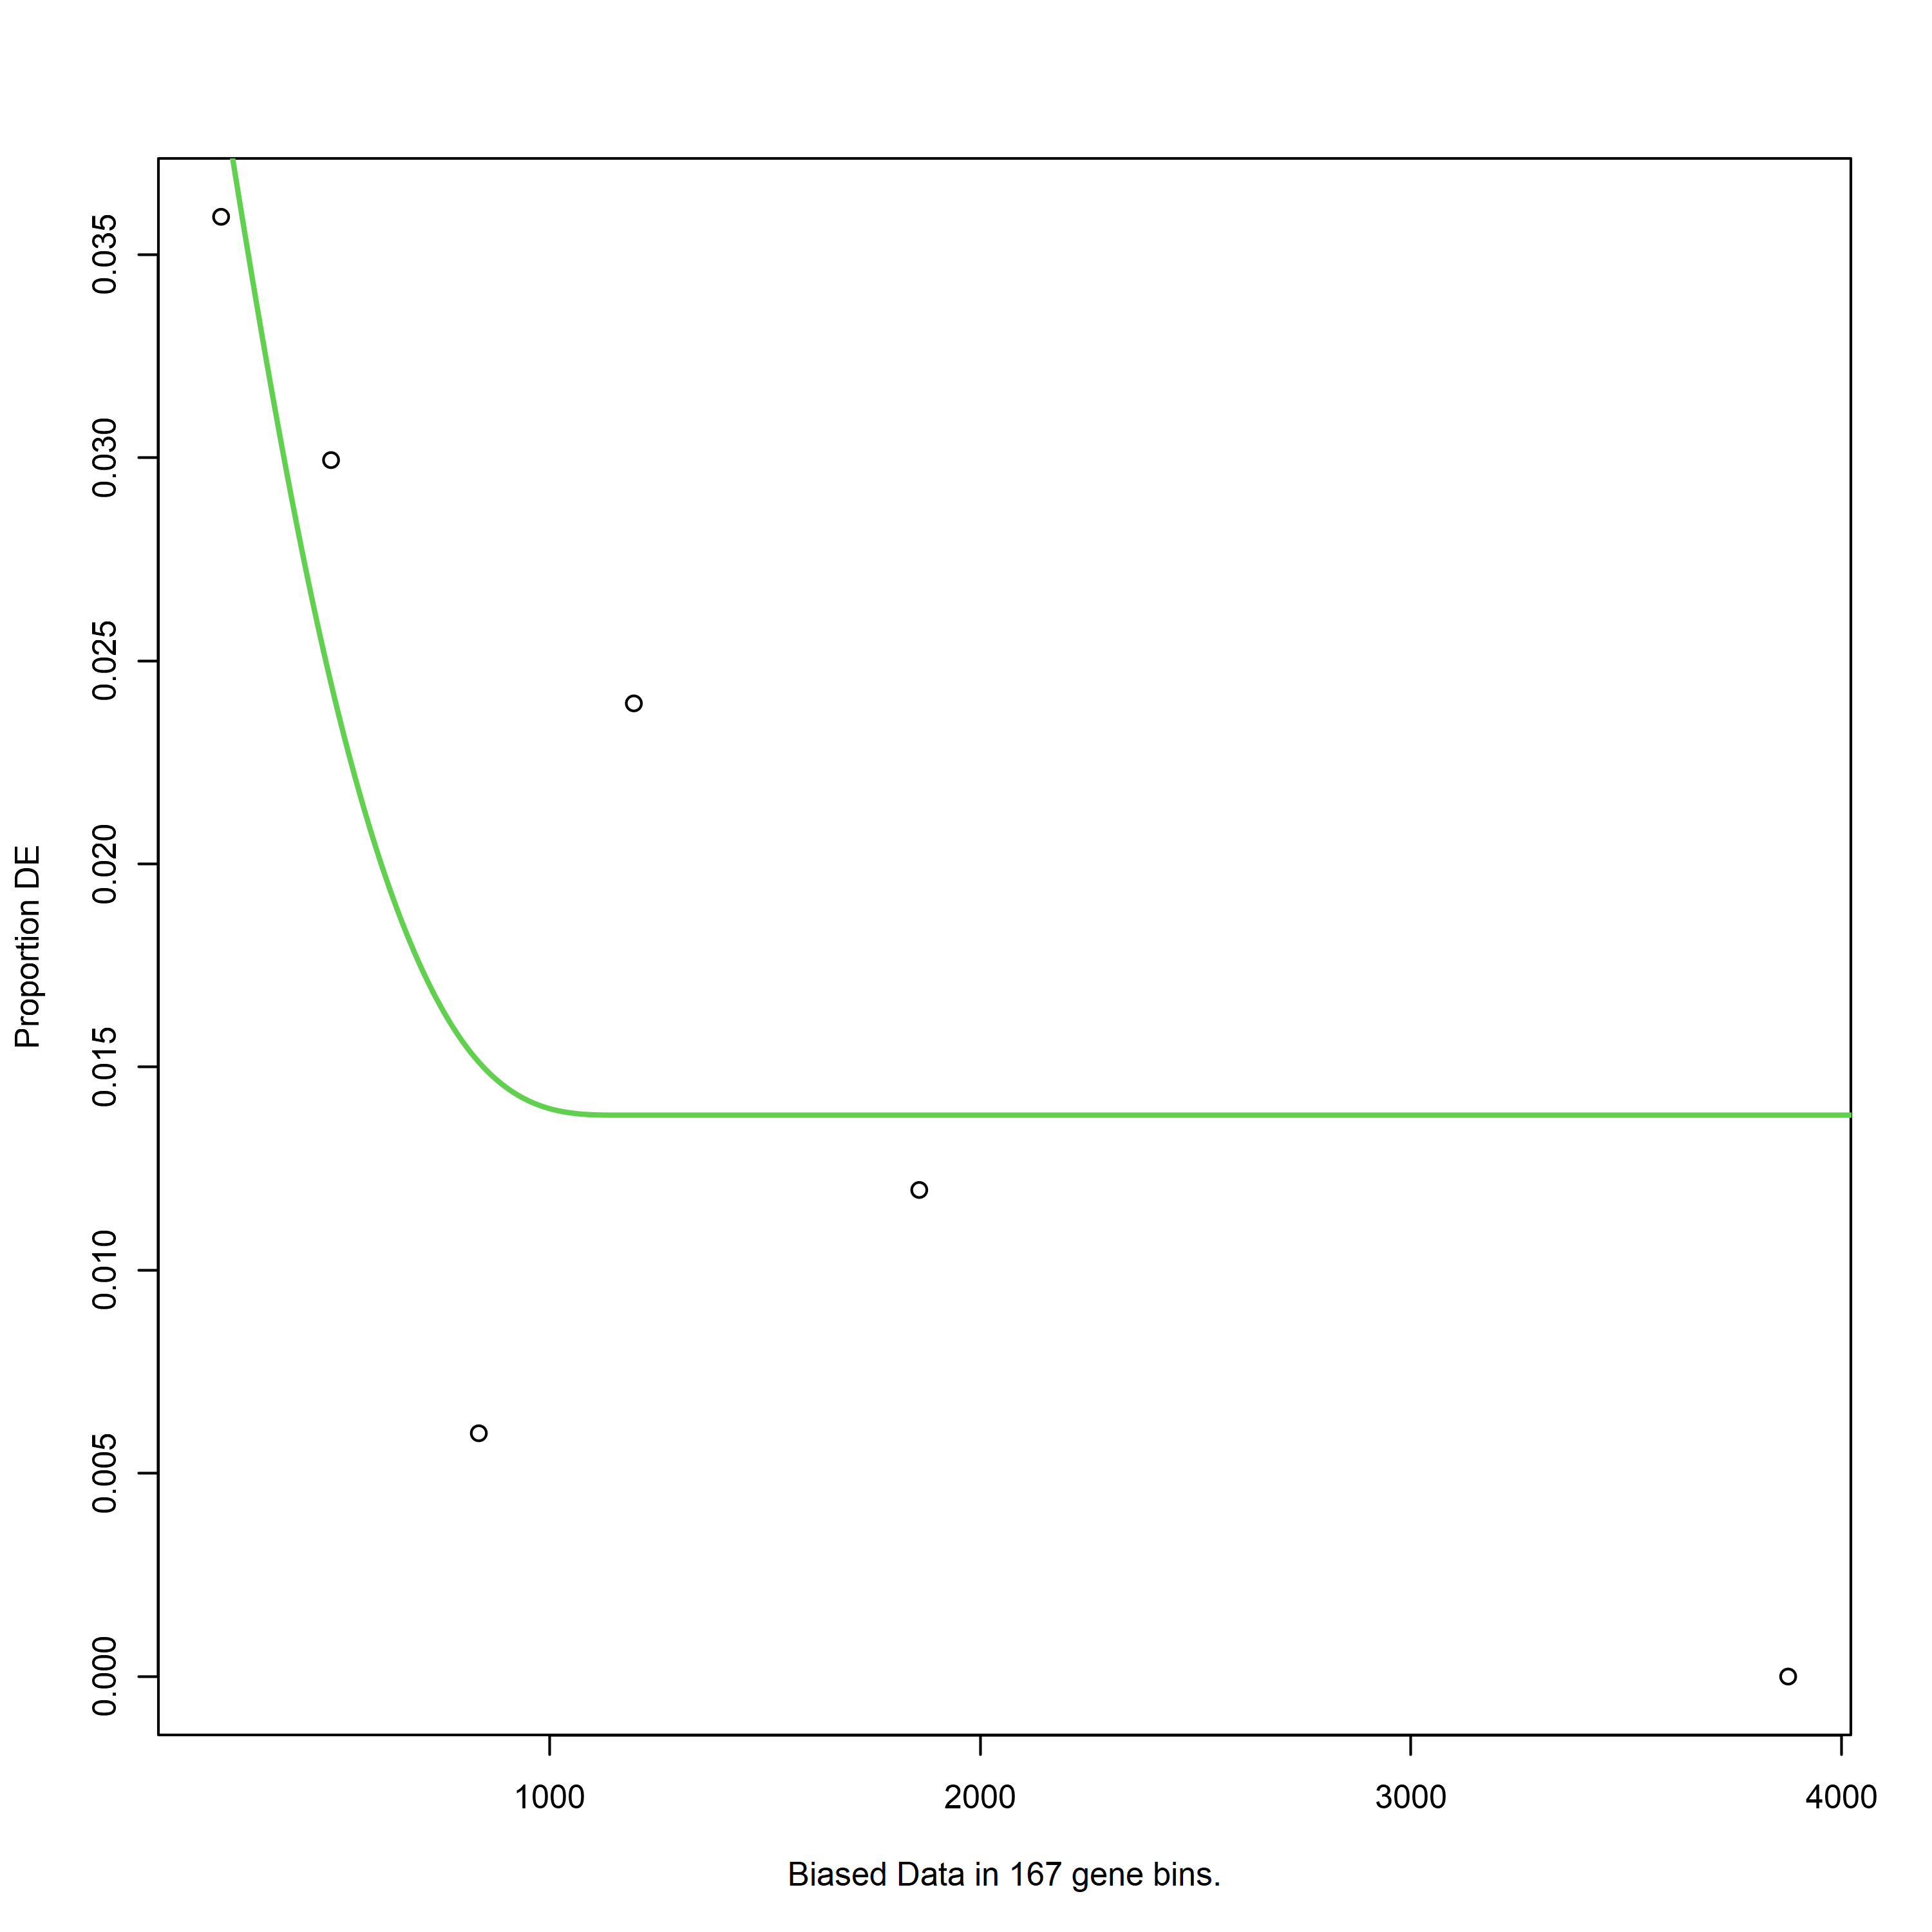

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 489 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



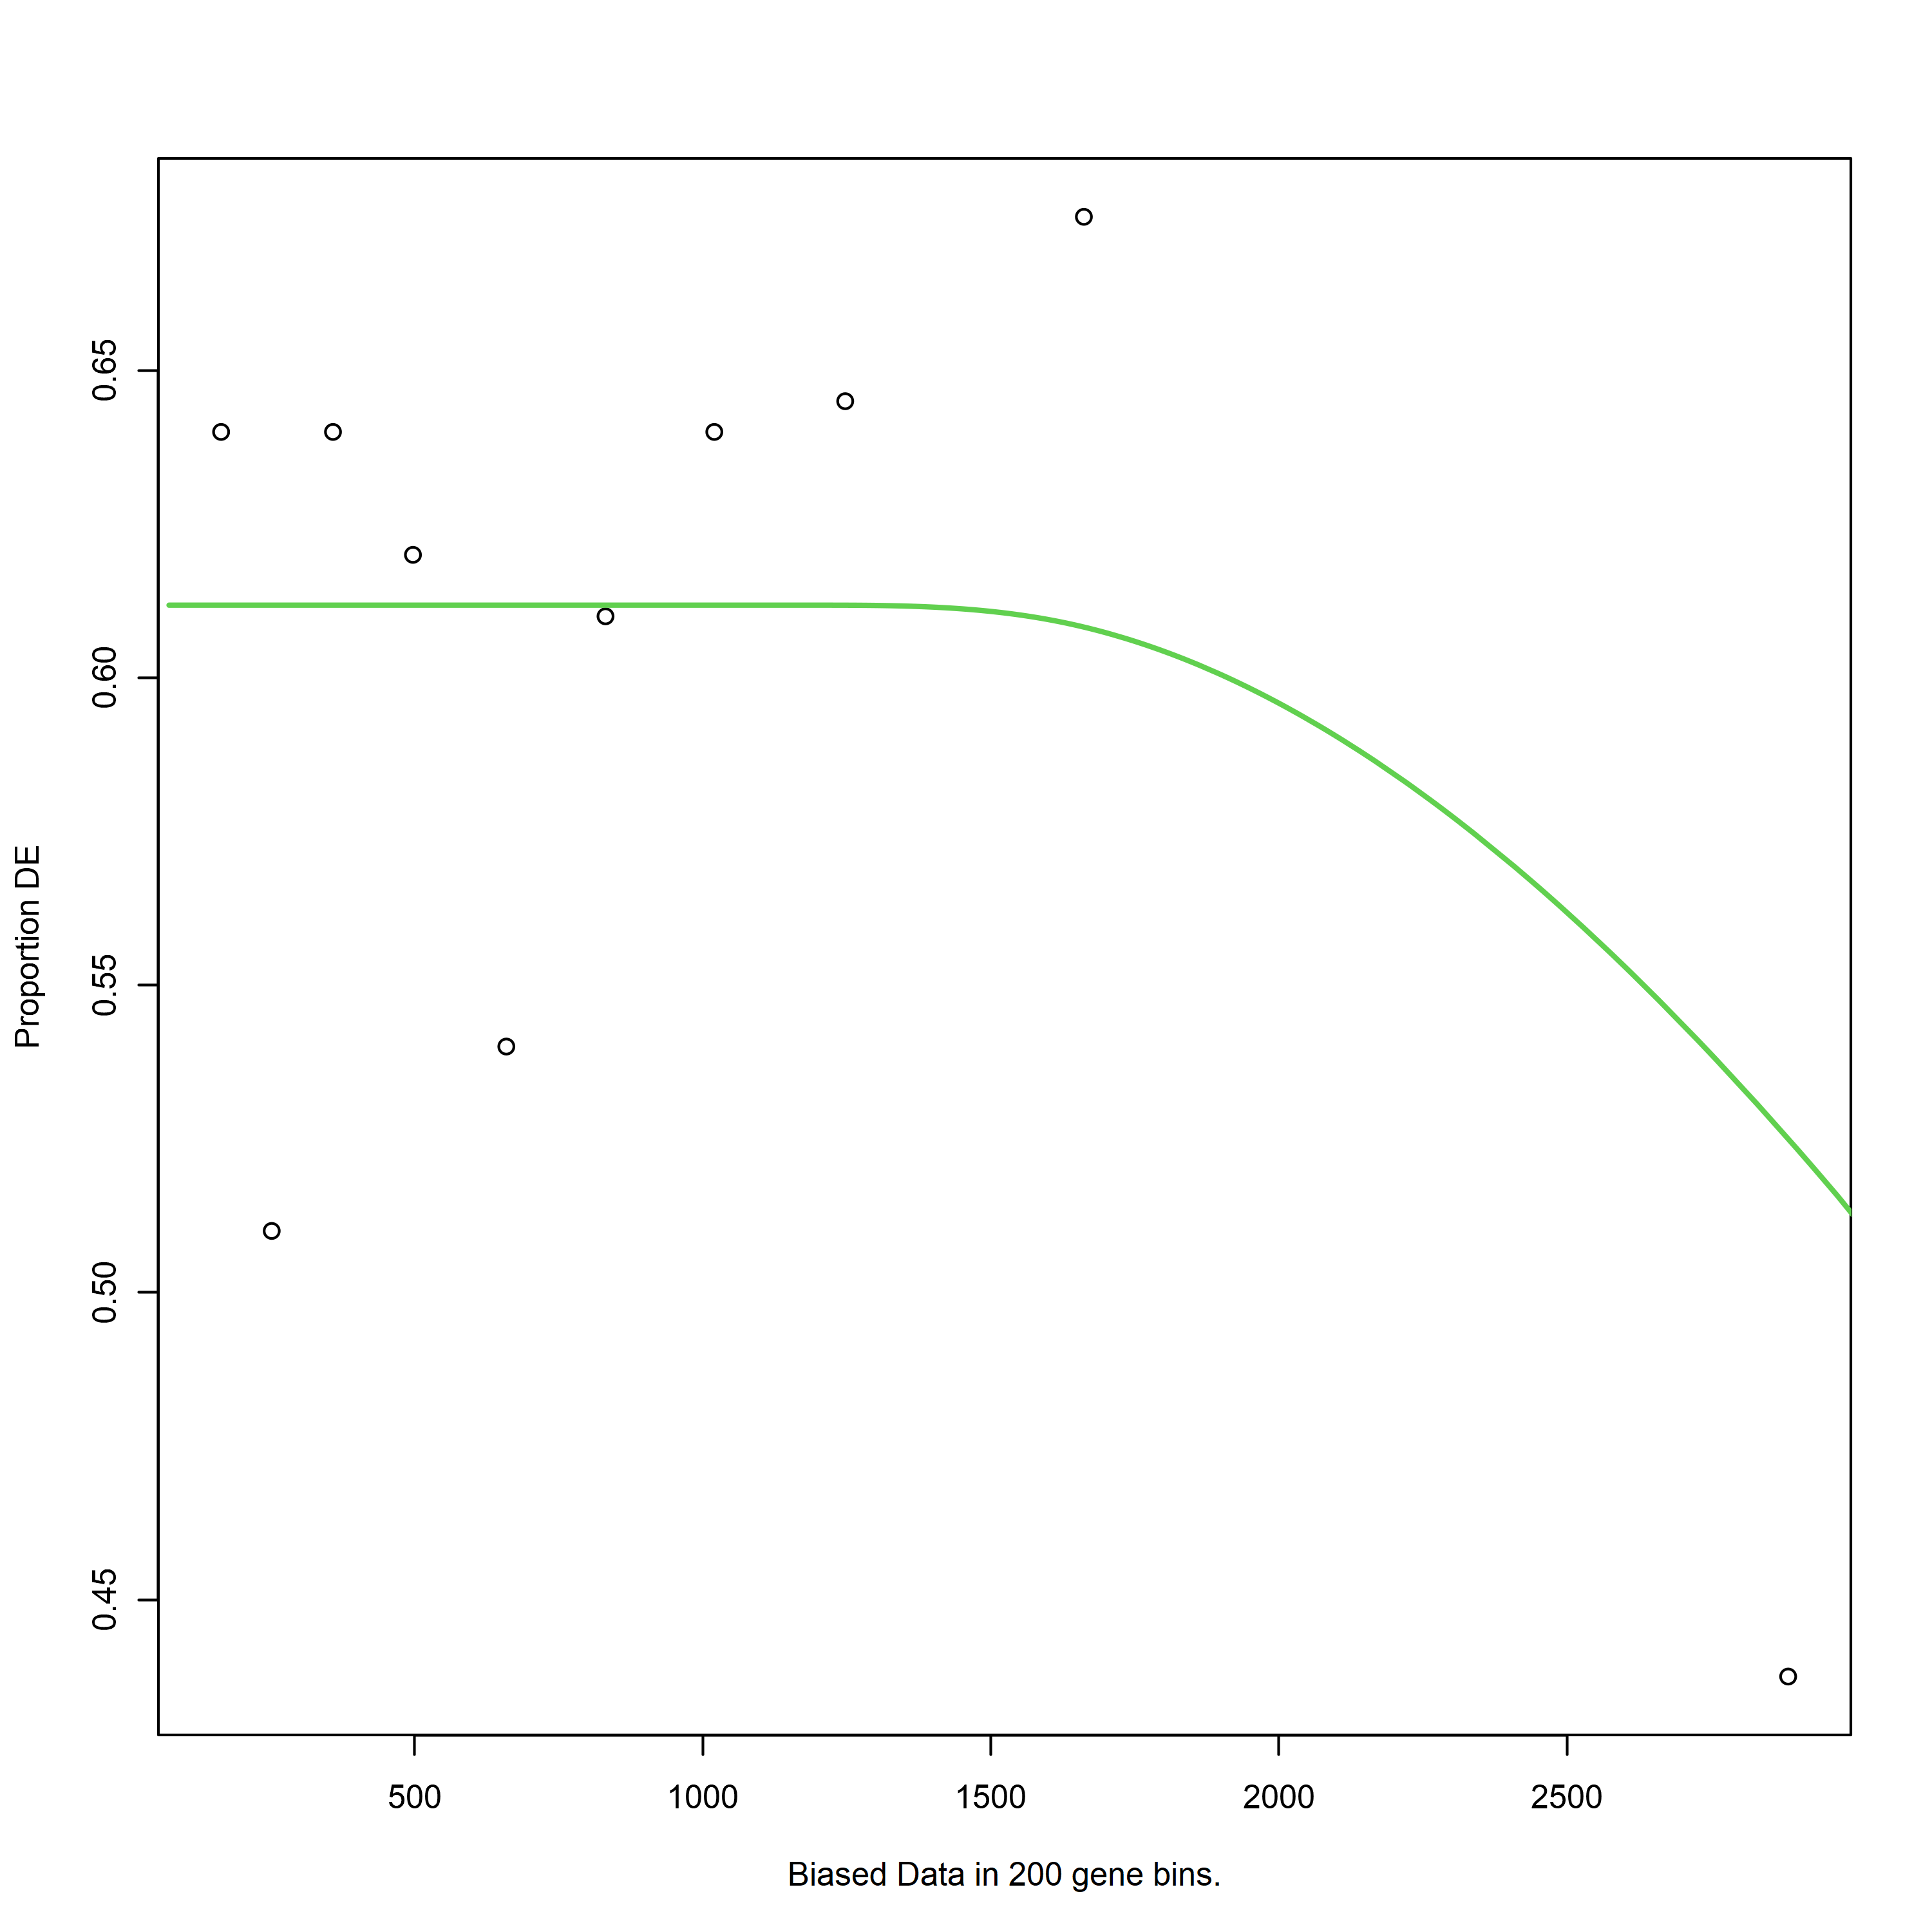

Using manually entered categories.

For 489 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 401 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



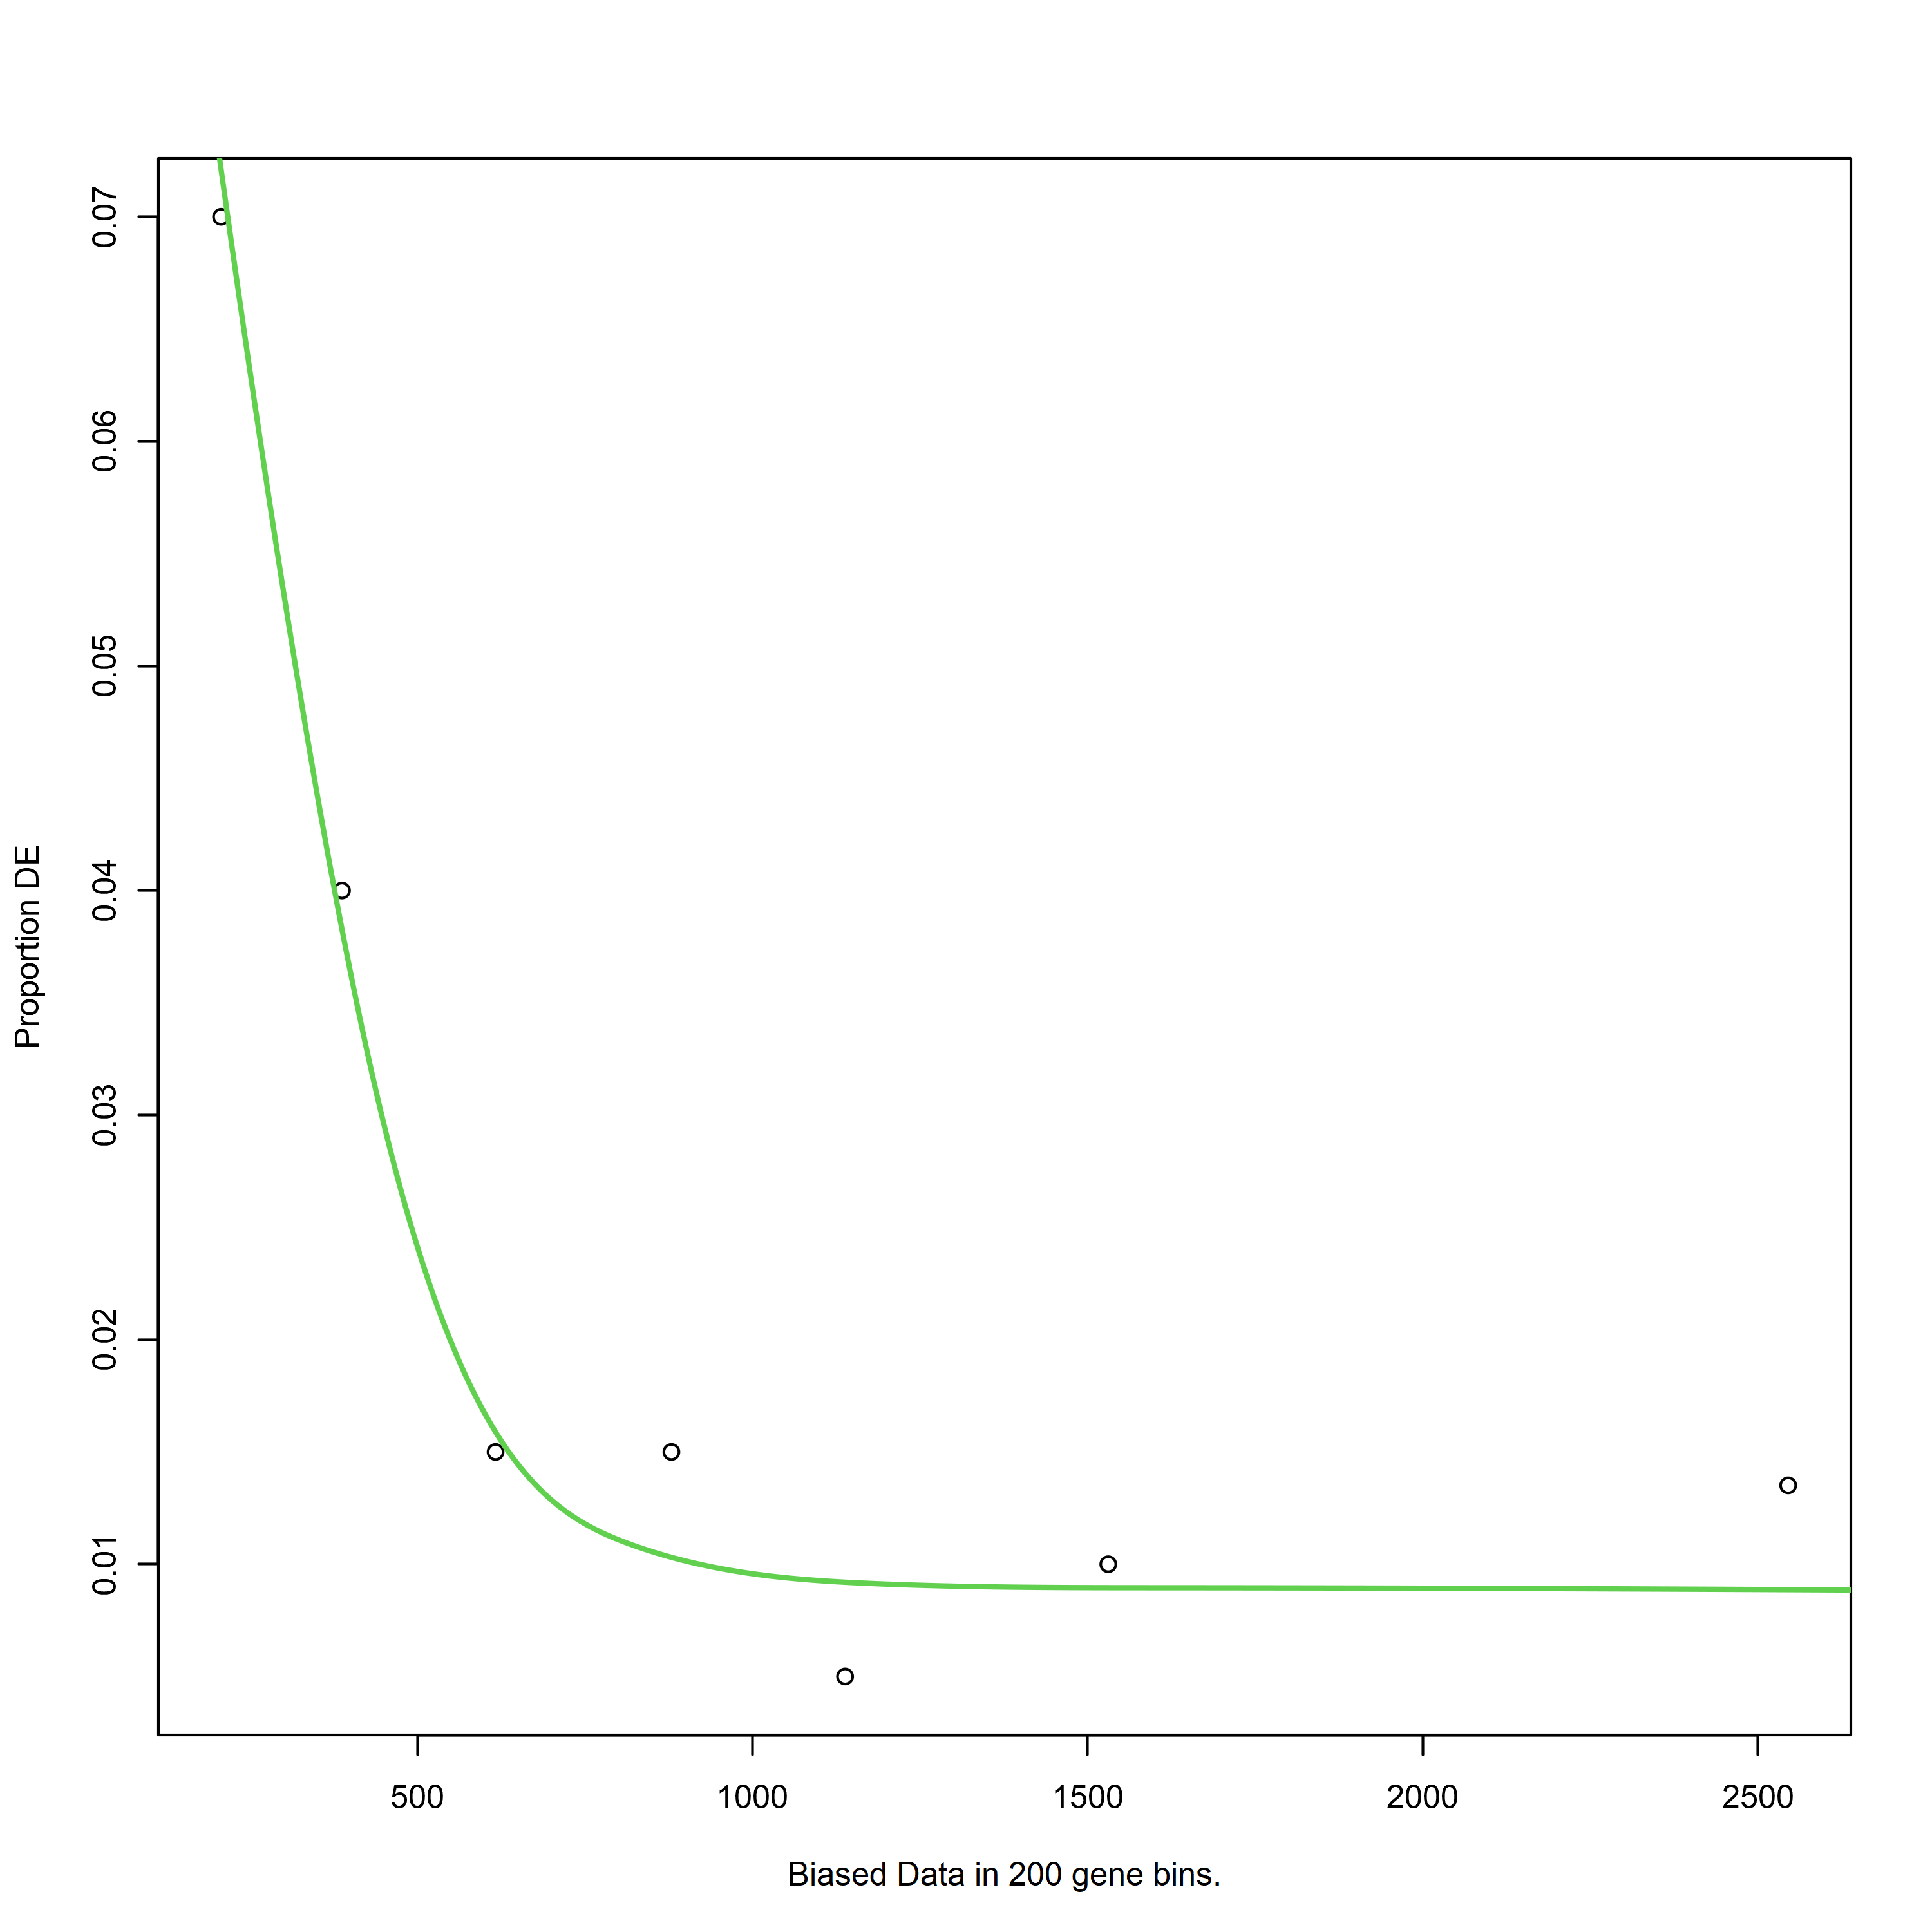

Using manually entered categories.

For 401 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



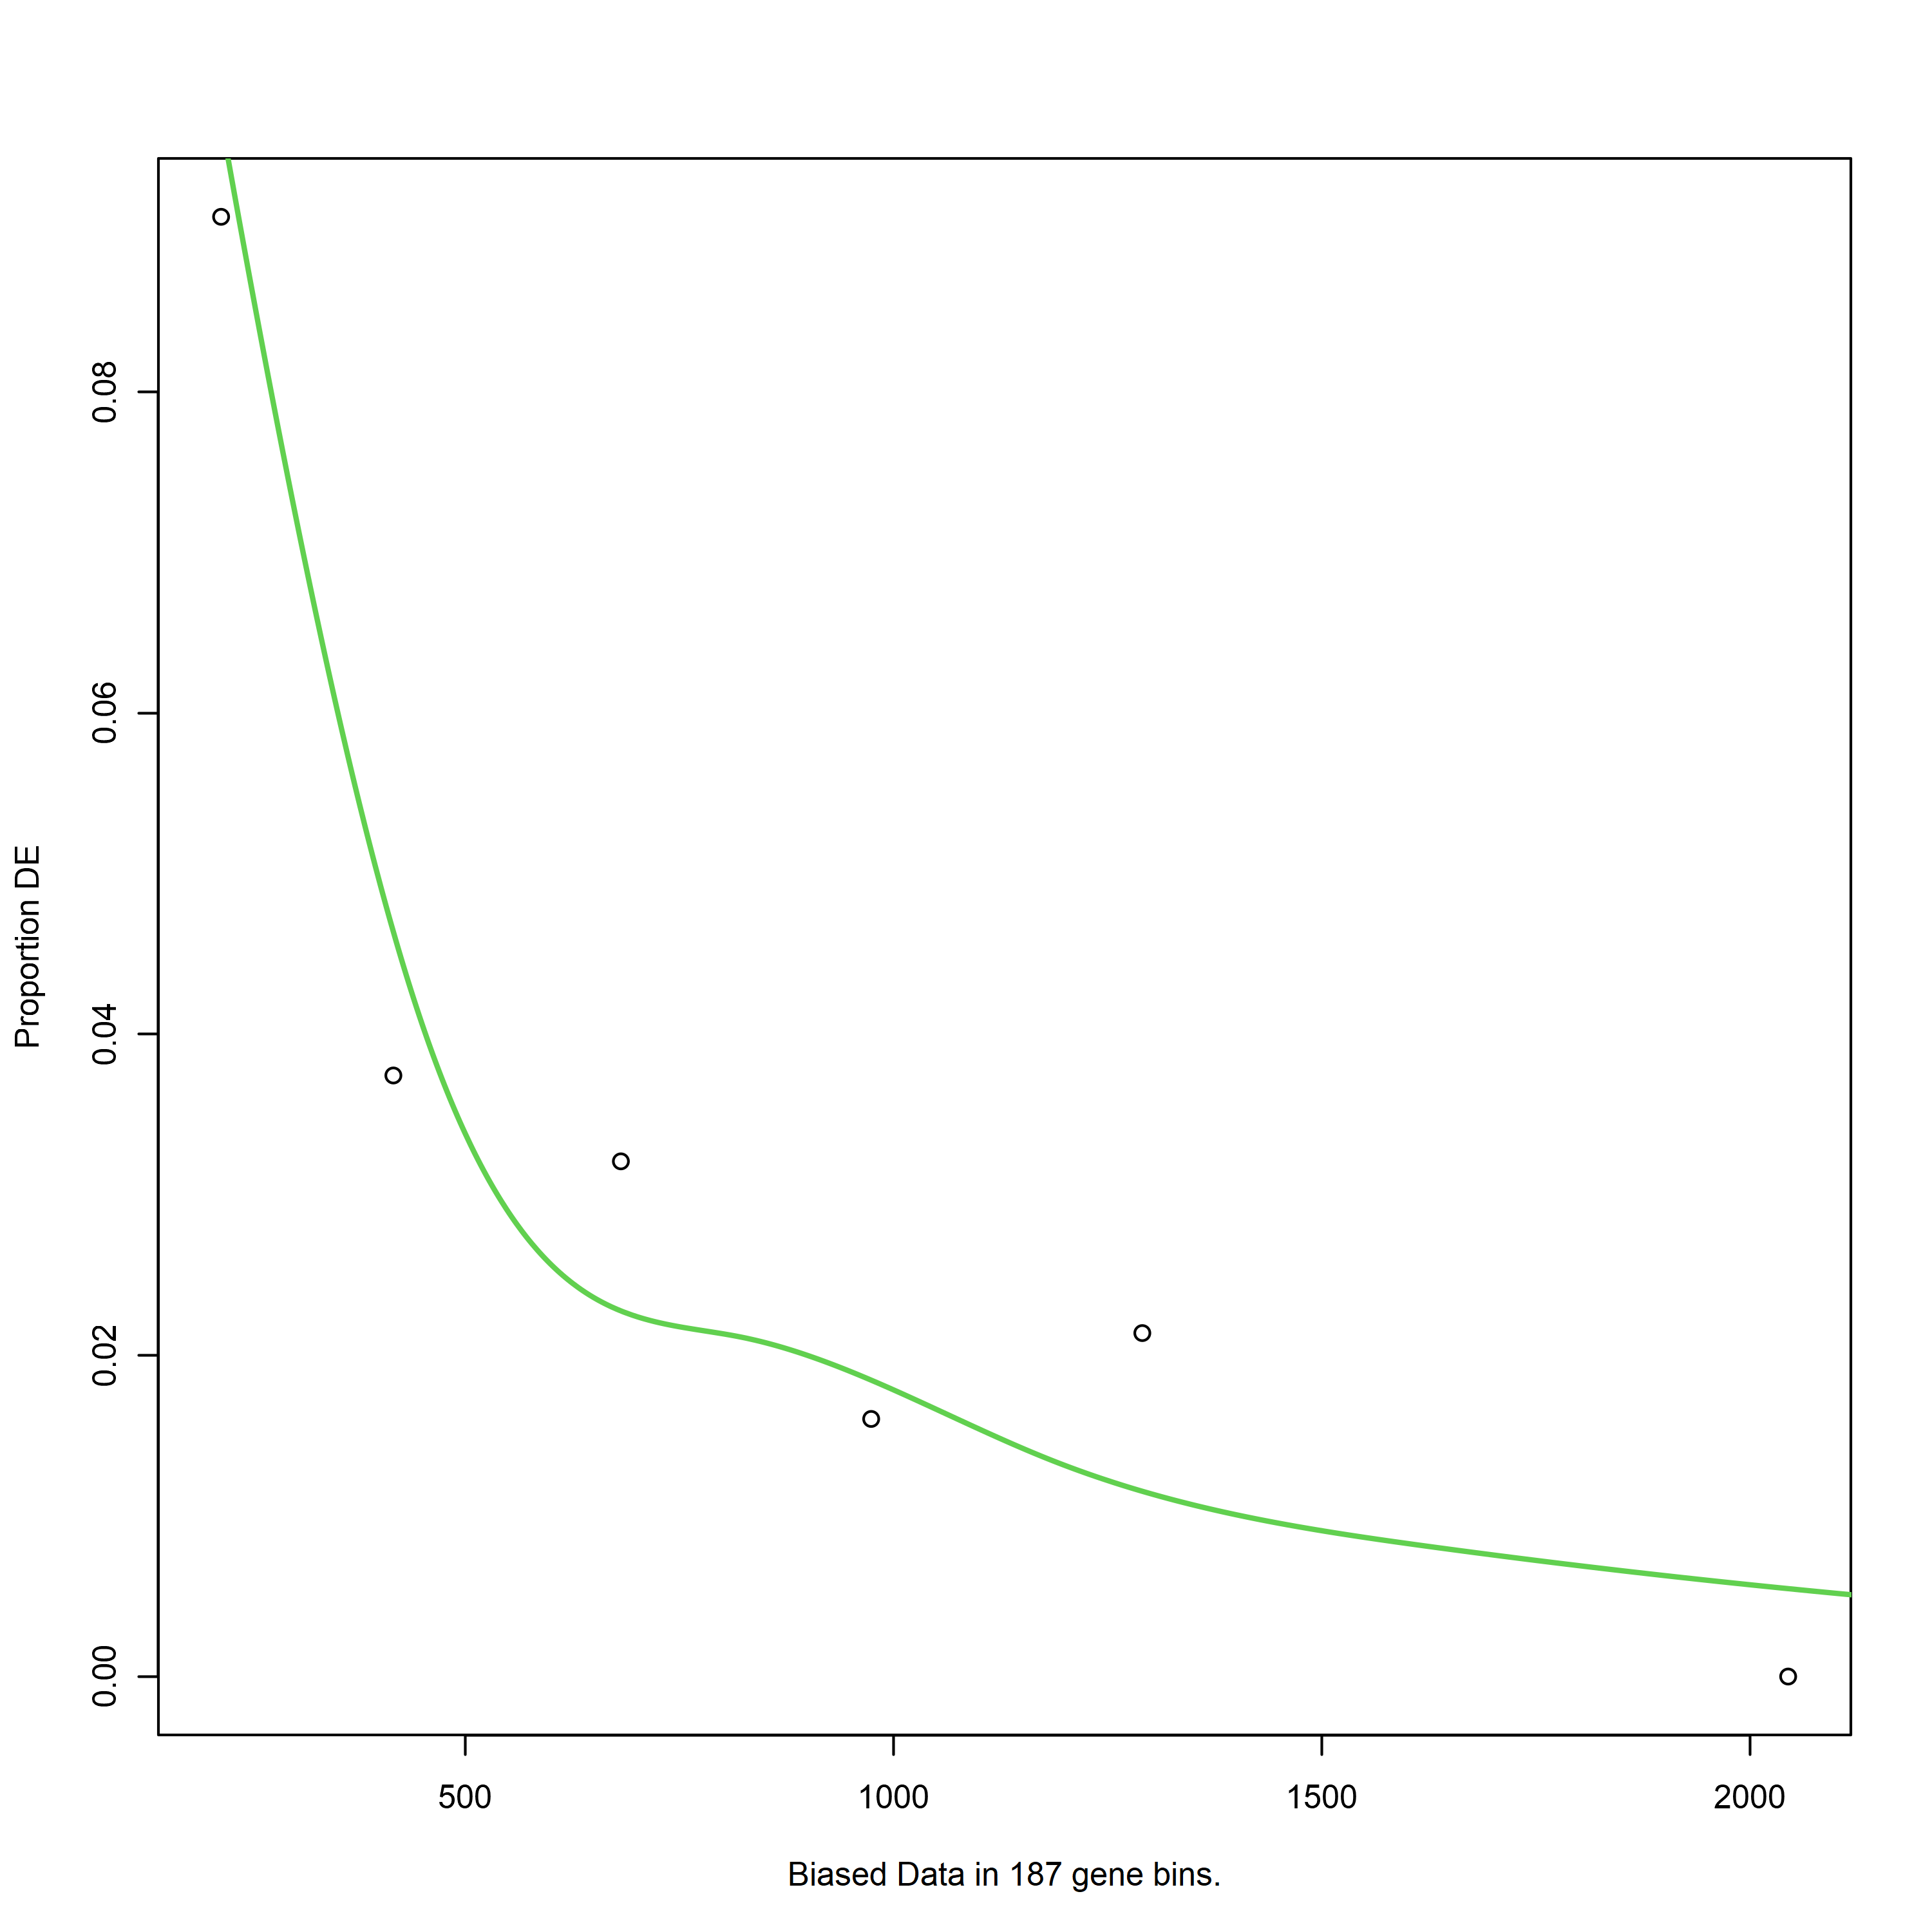

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



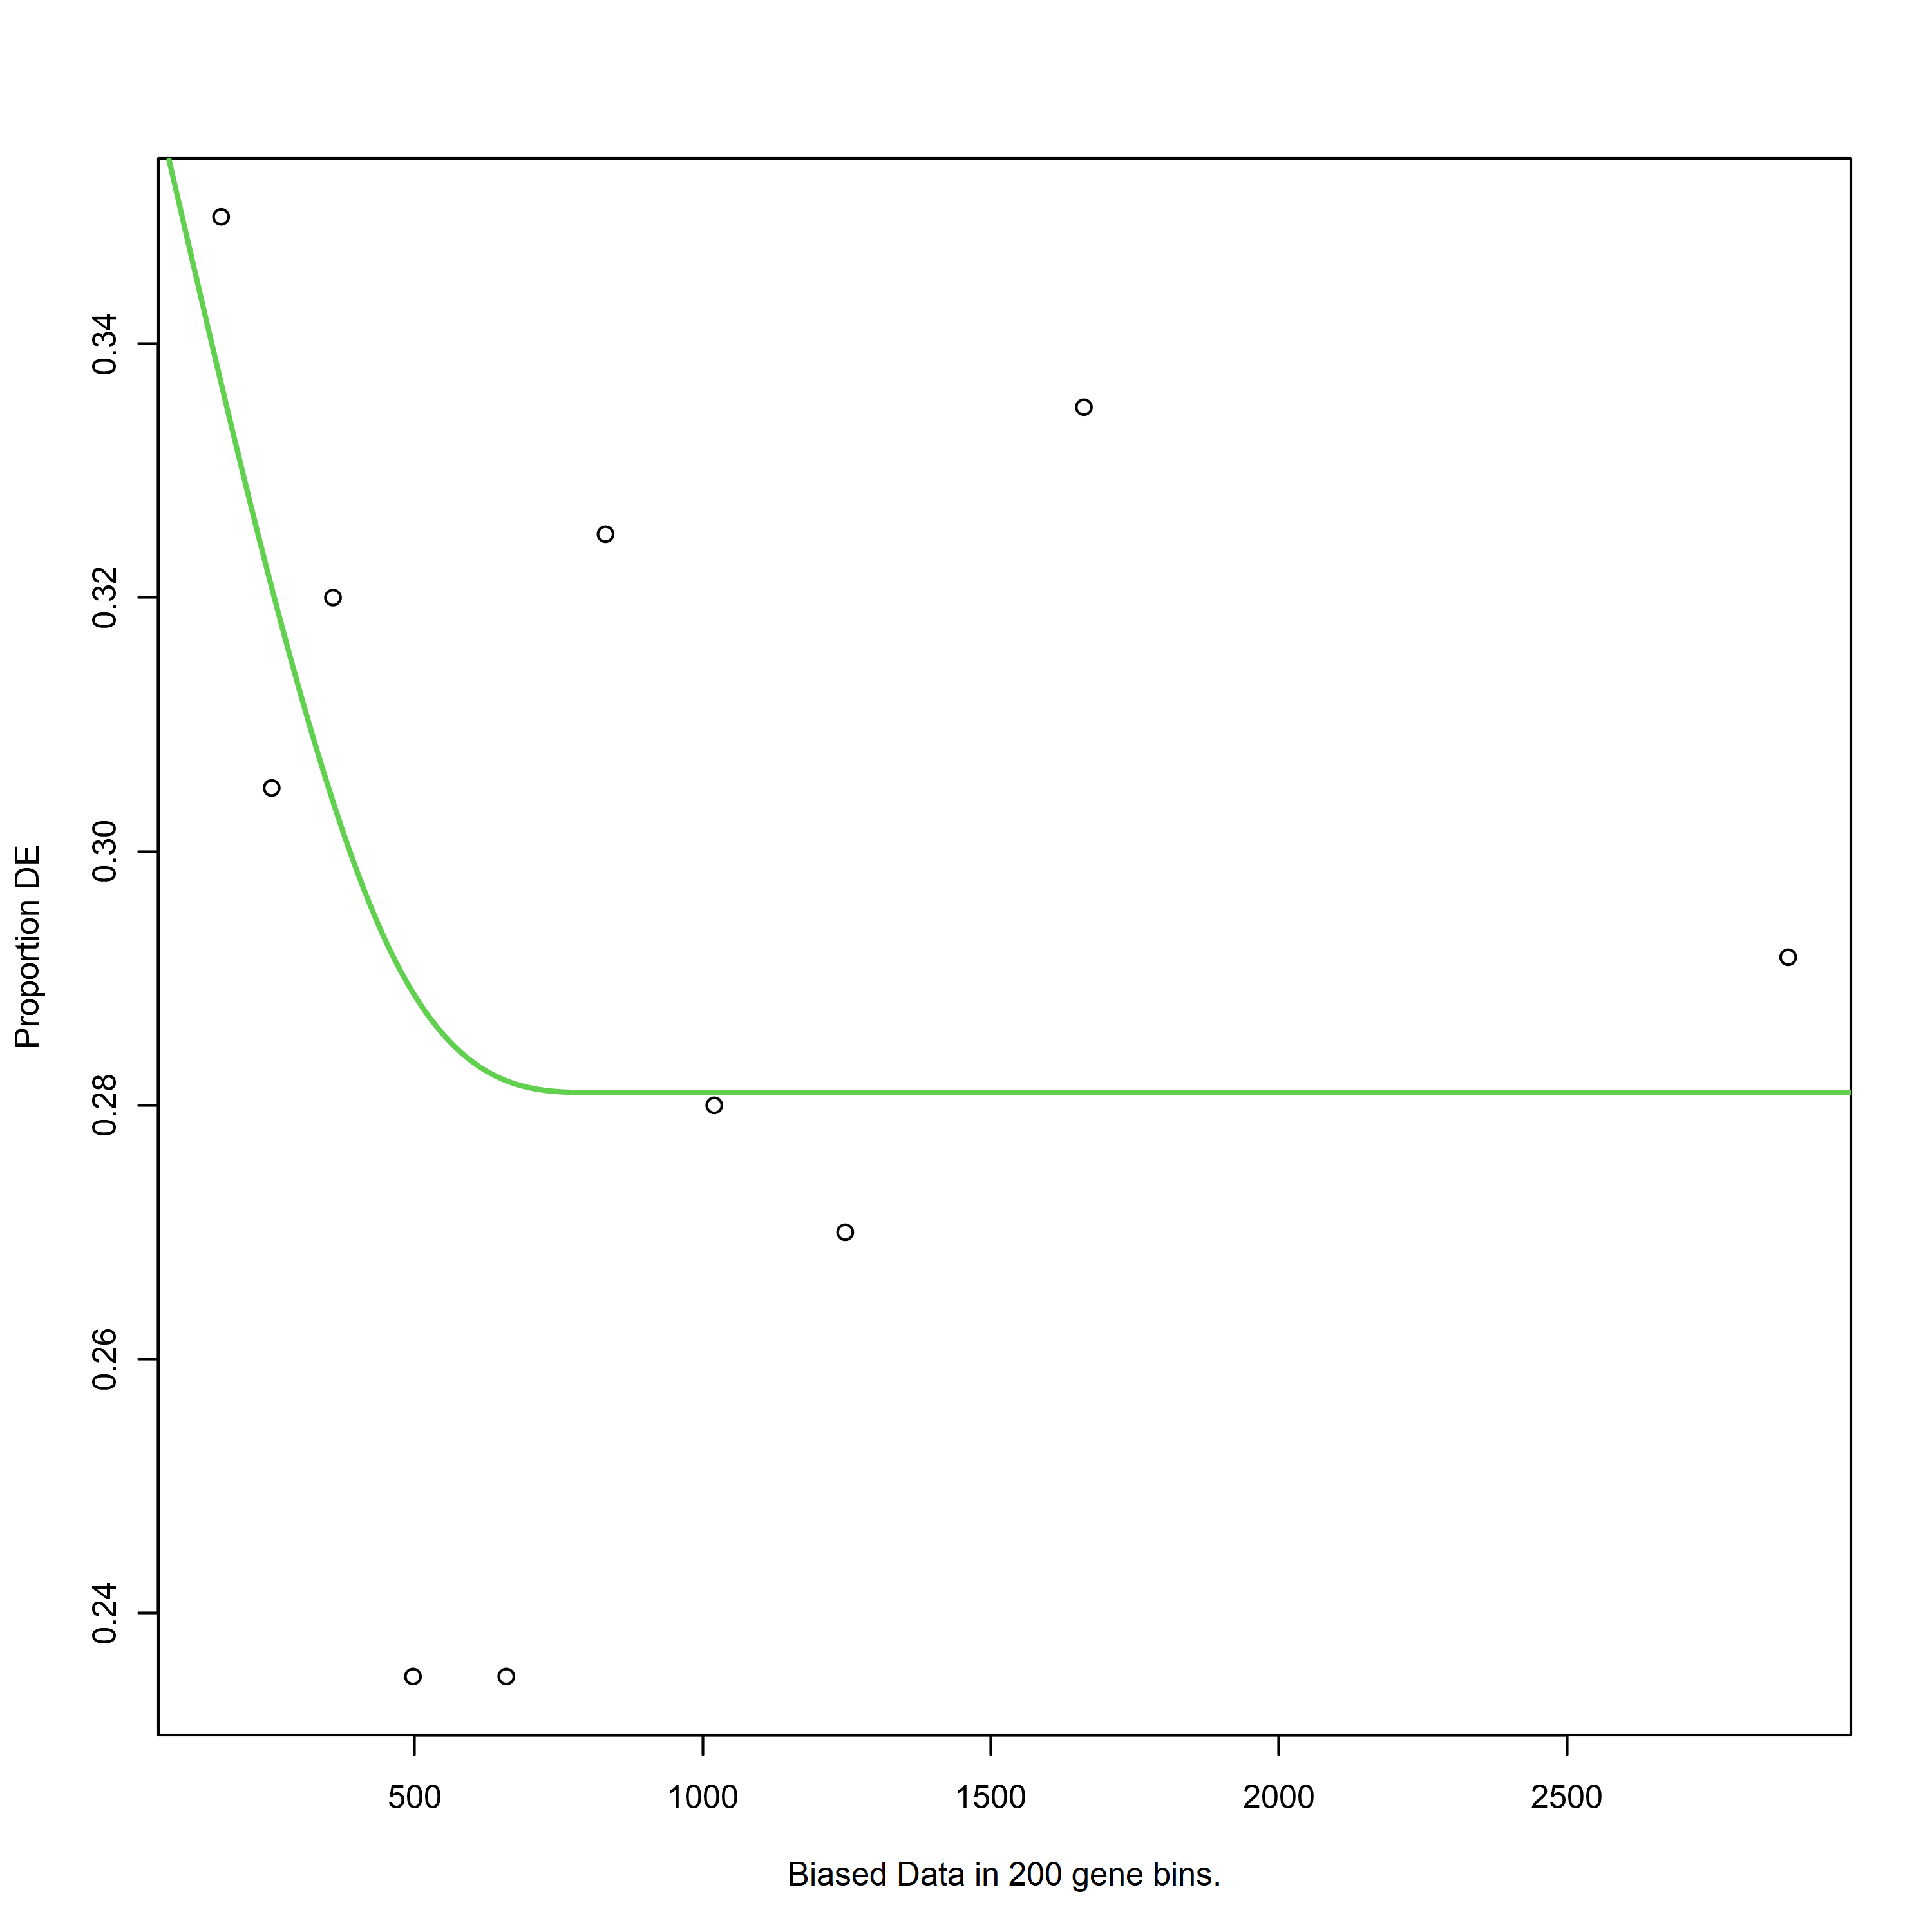

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



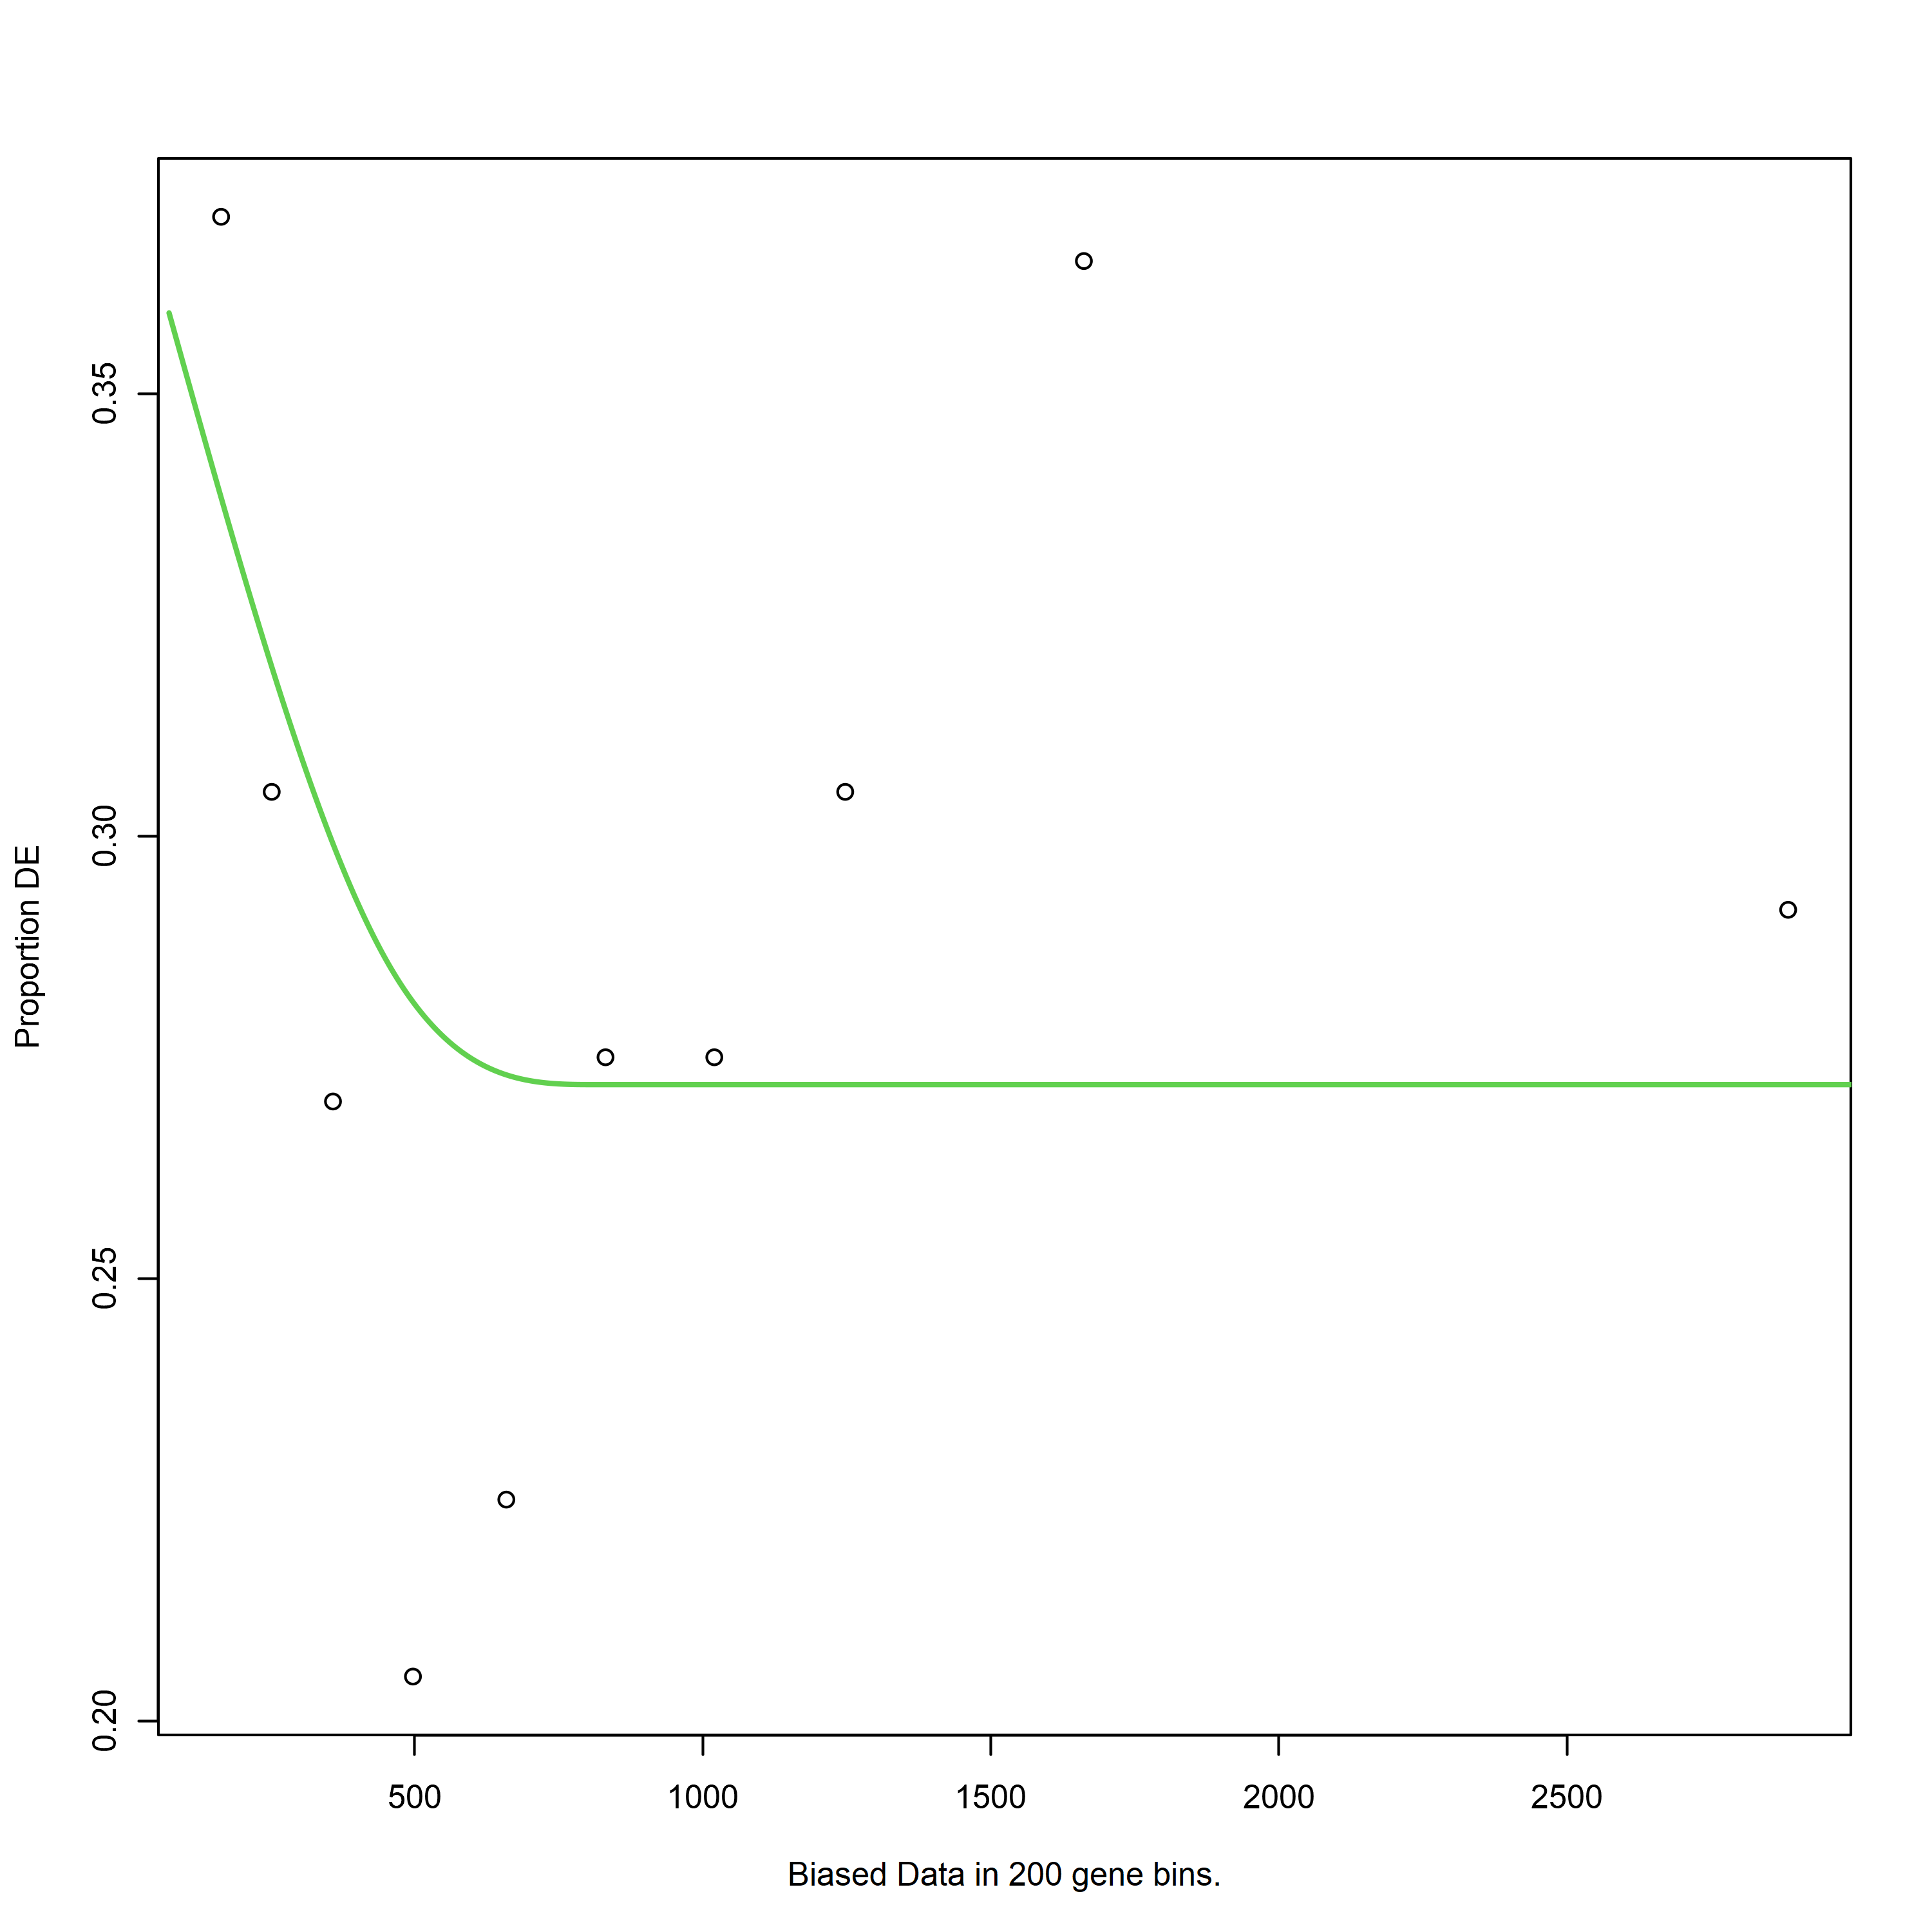

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 818 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



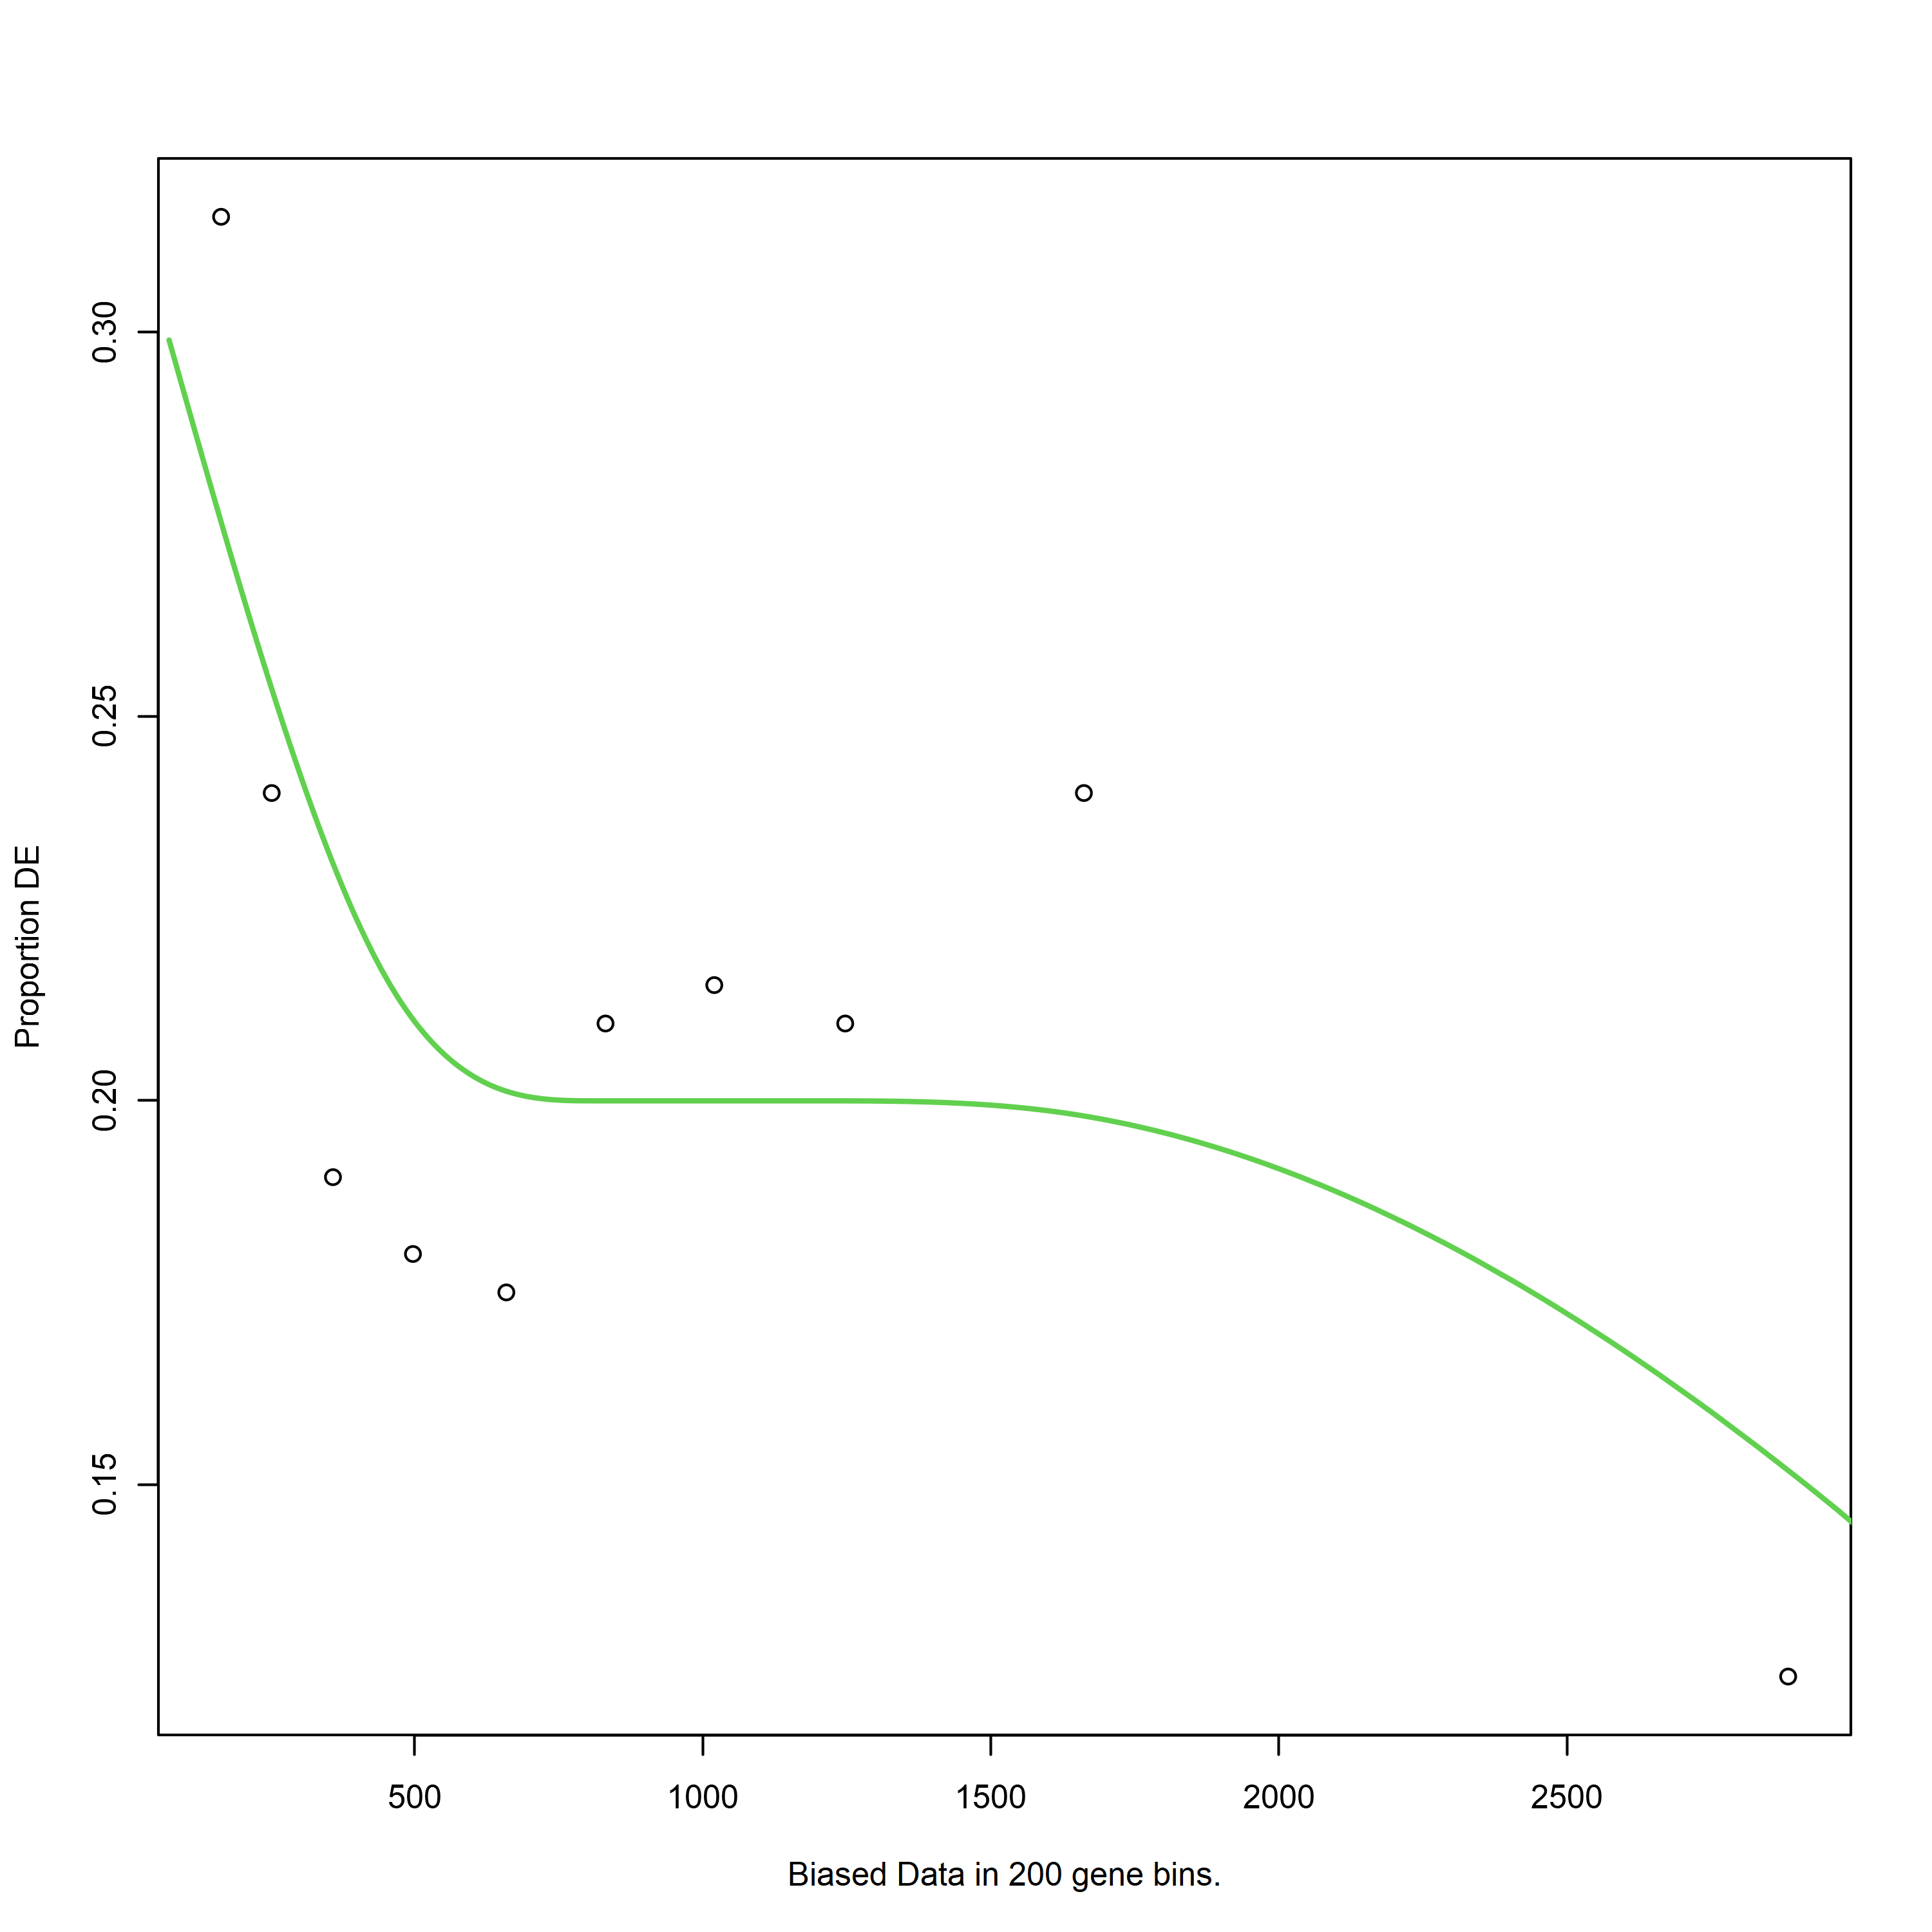

Using manually entered categories.

For 818 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 417 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



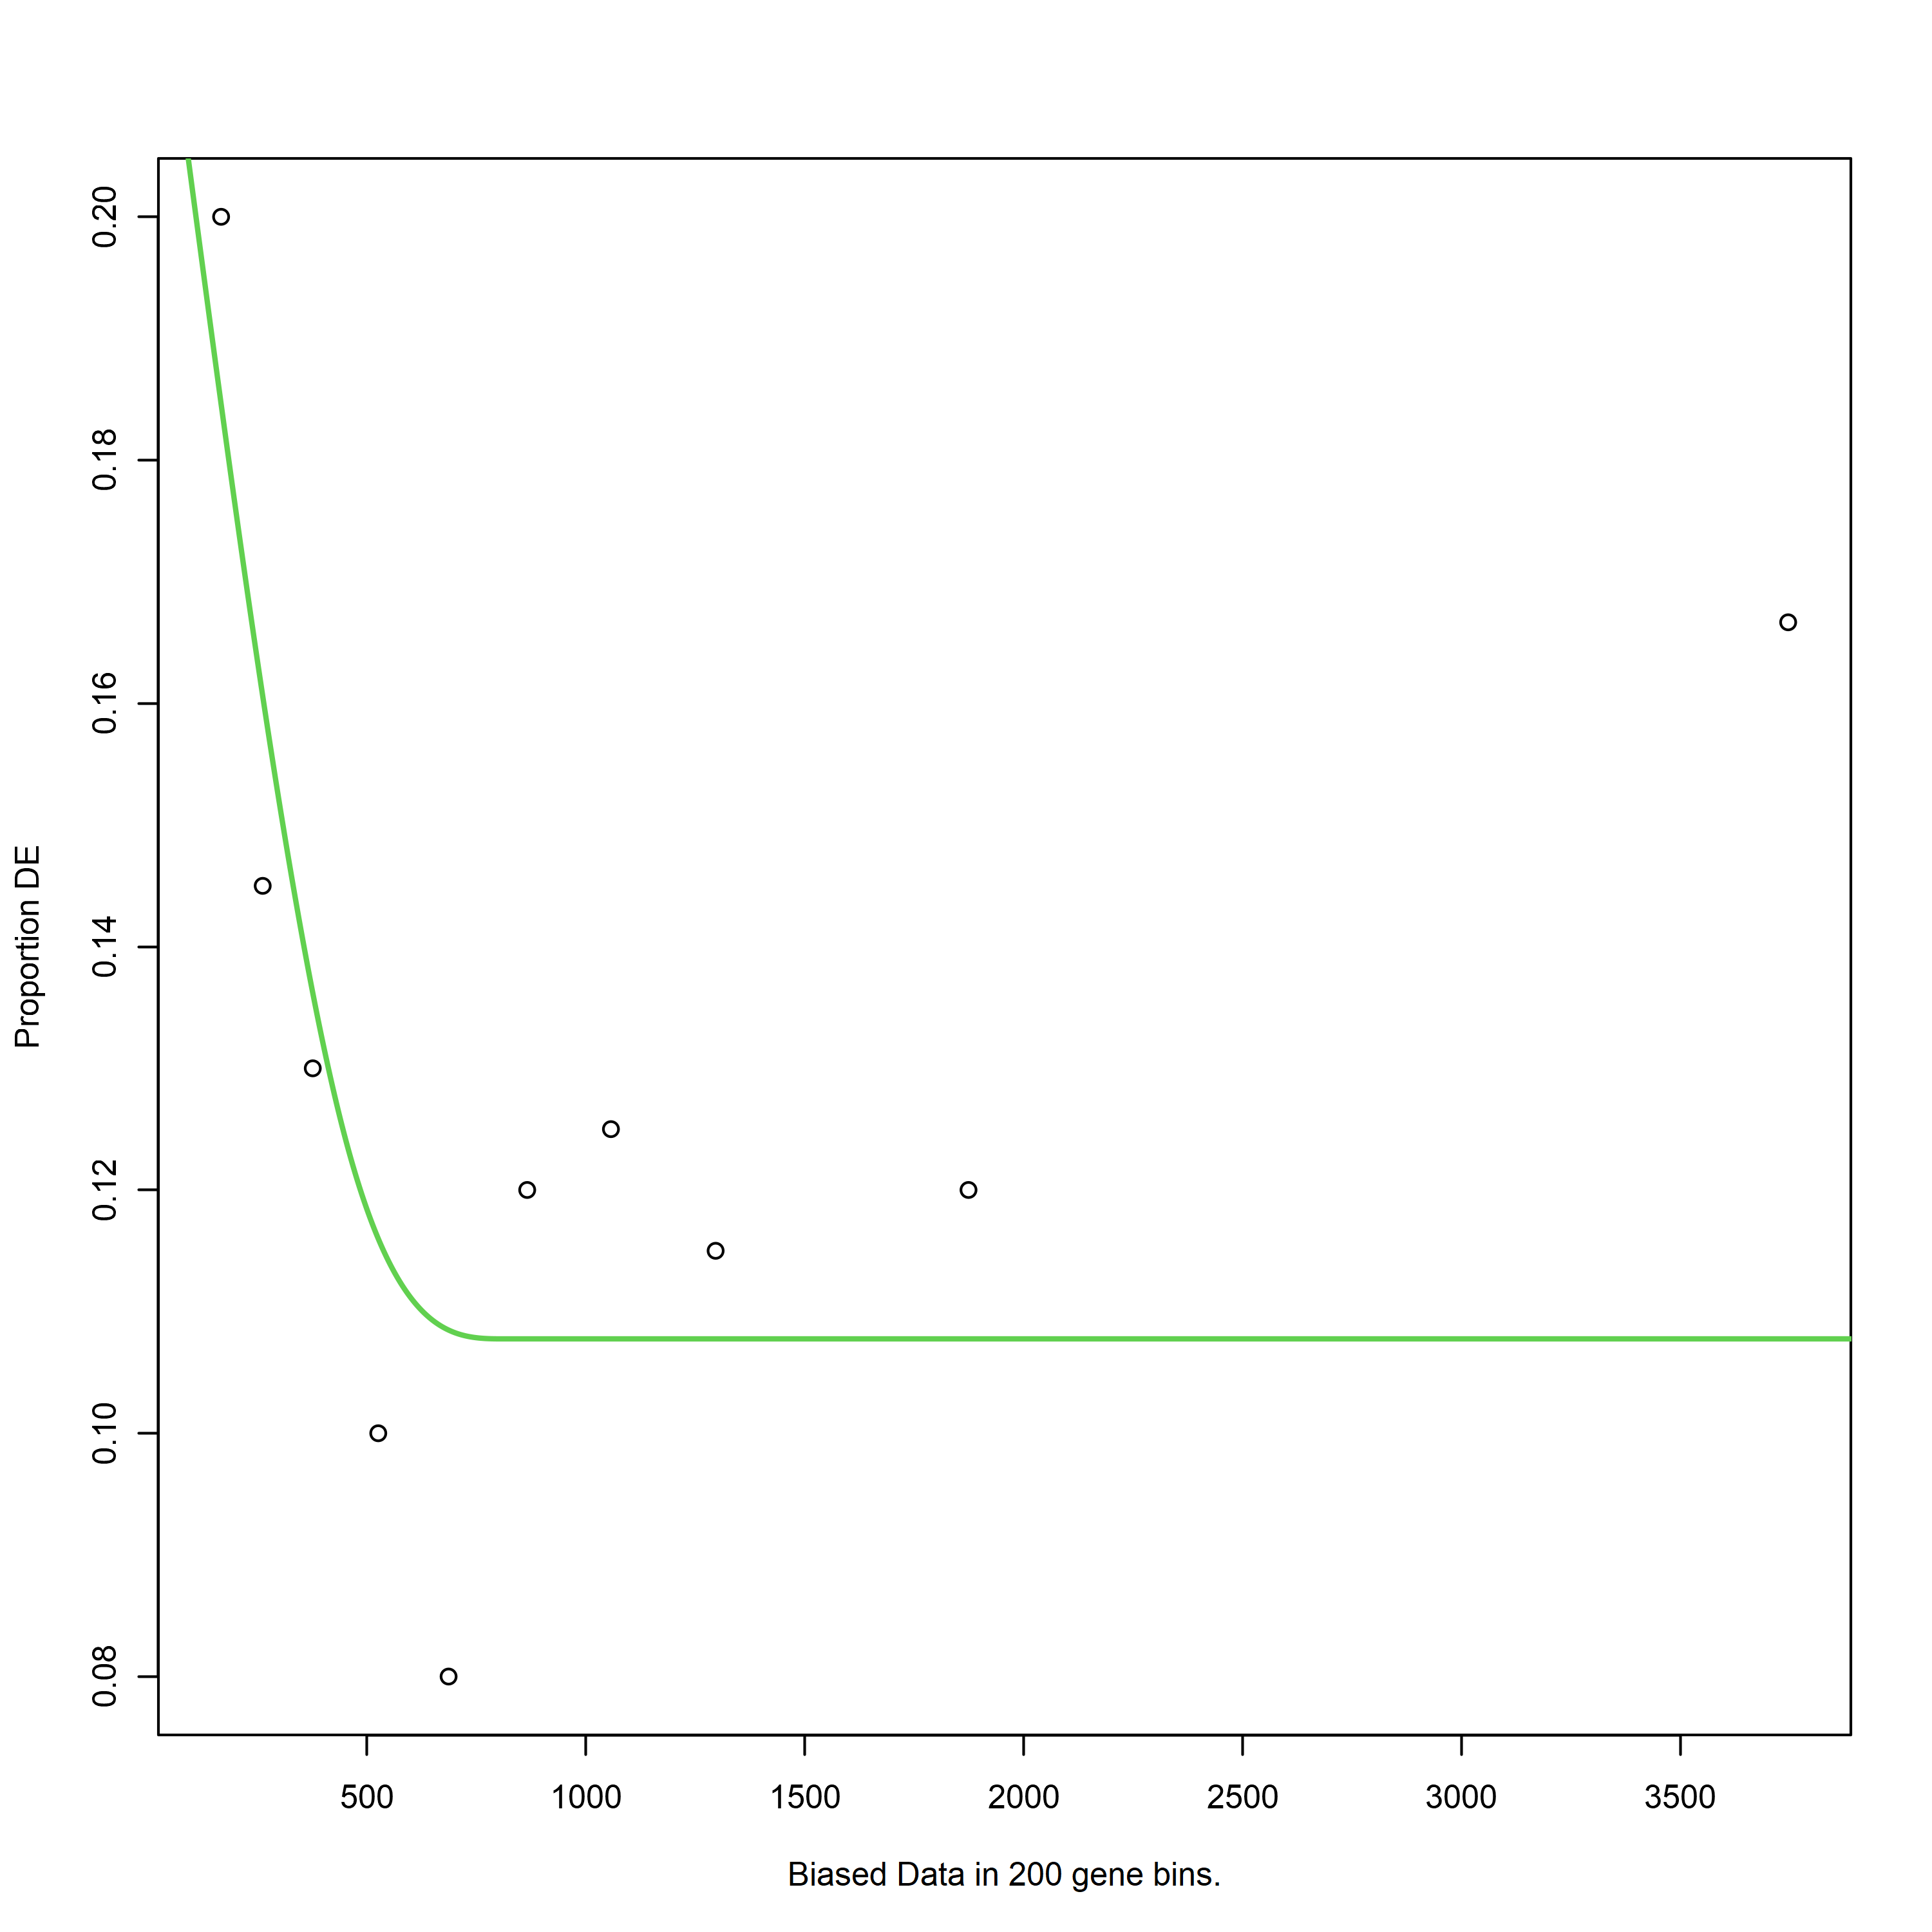

Using manually entered categories.

For 417 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



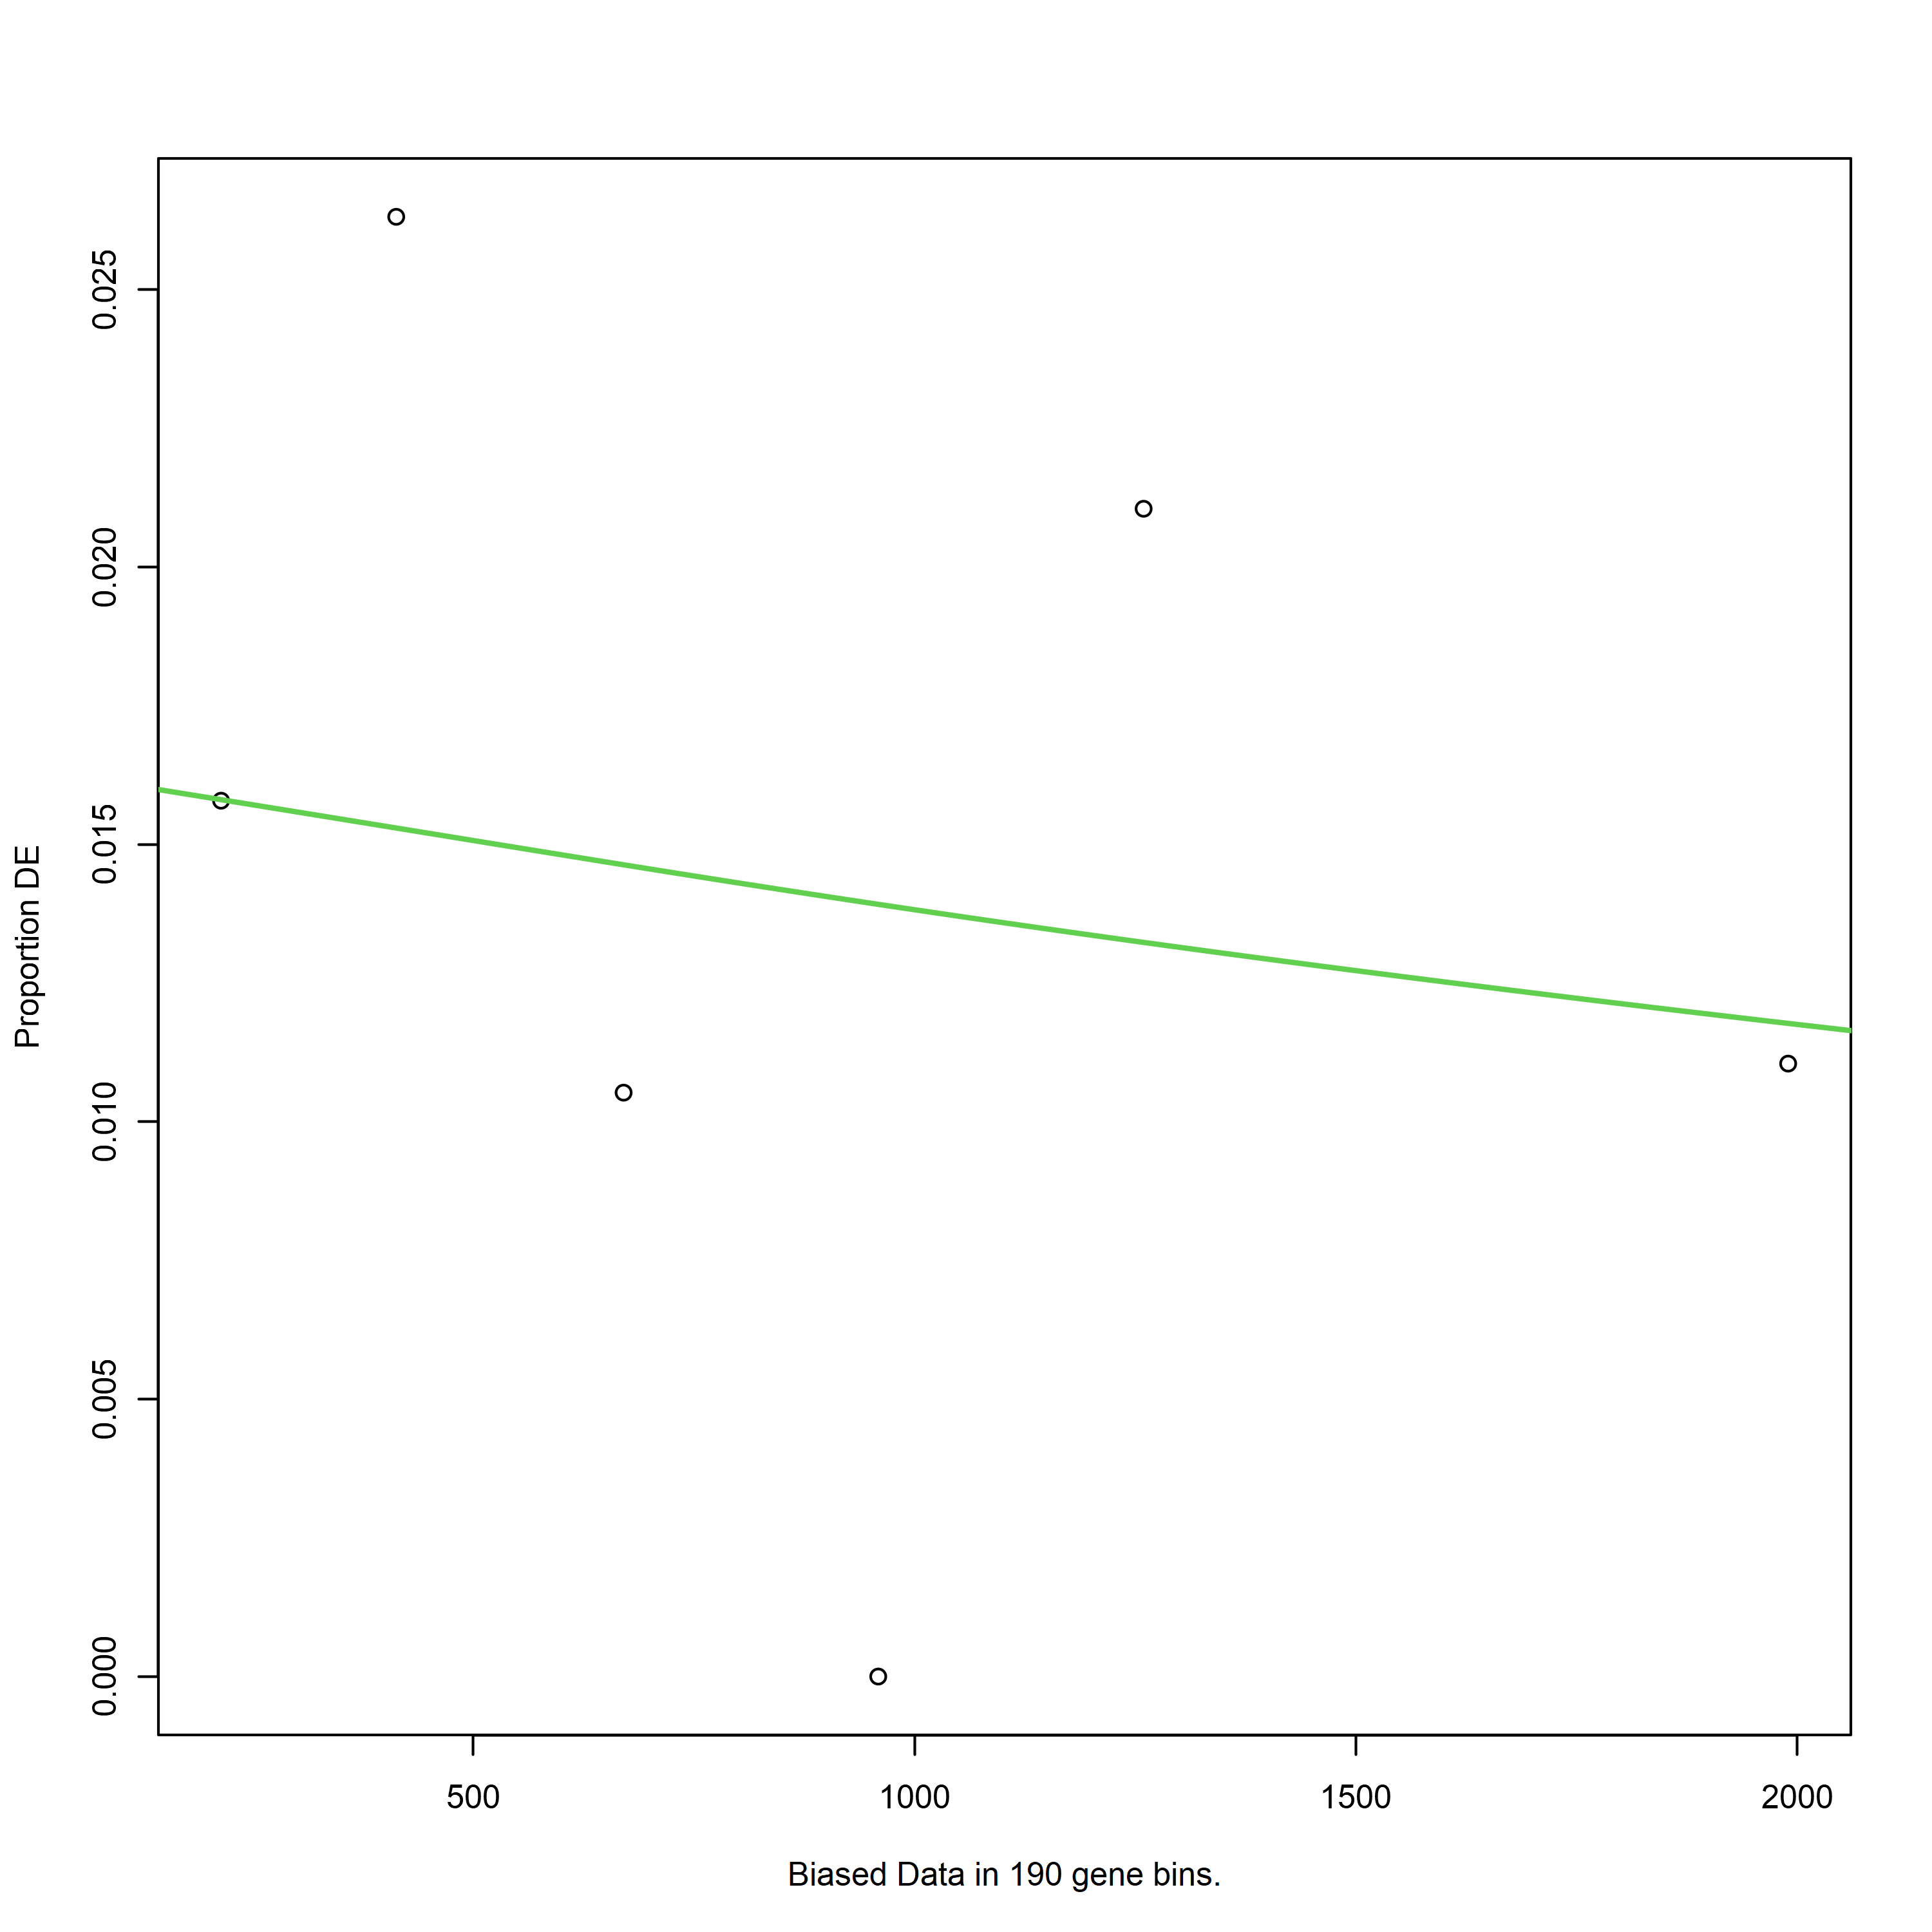

Using manually entered categories.

For 849 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Using manually entered categories.

For 818 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



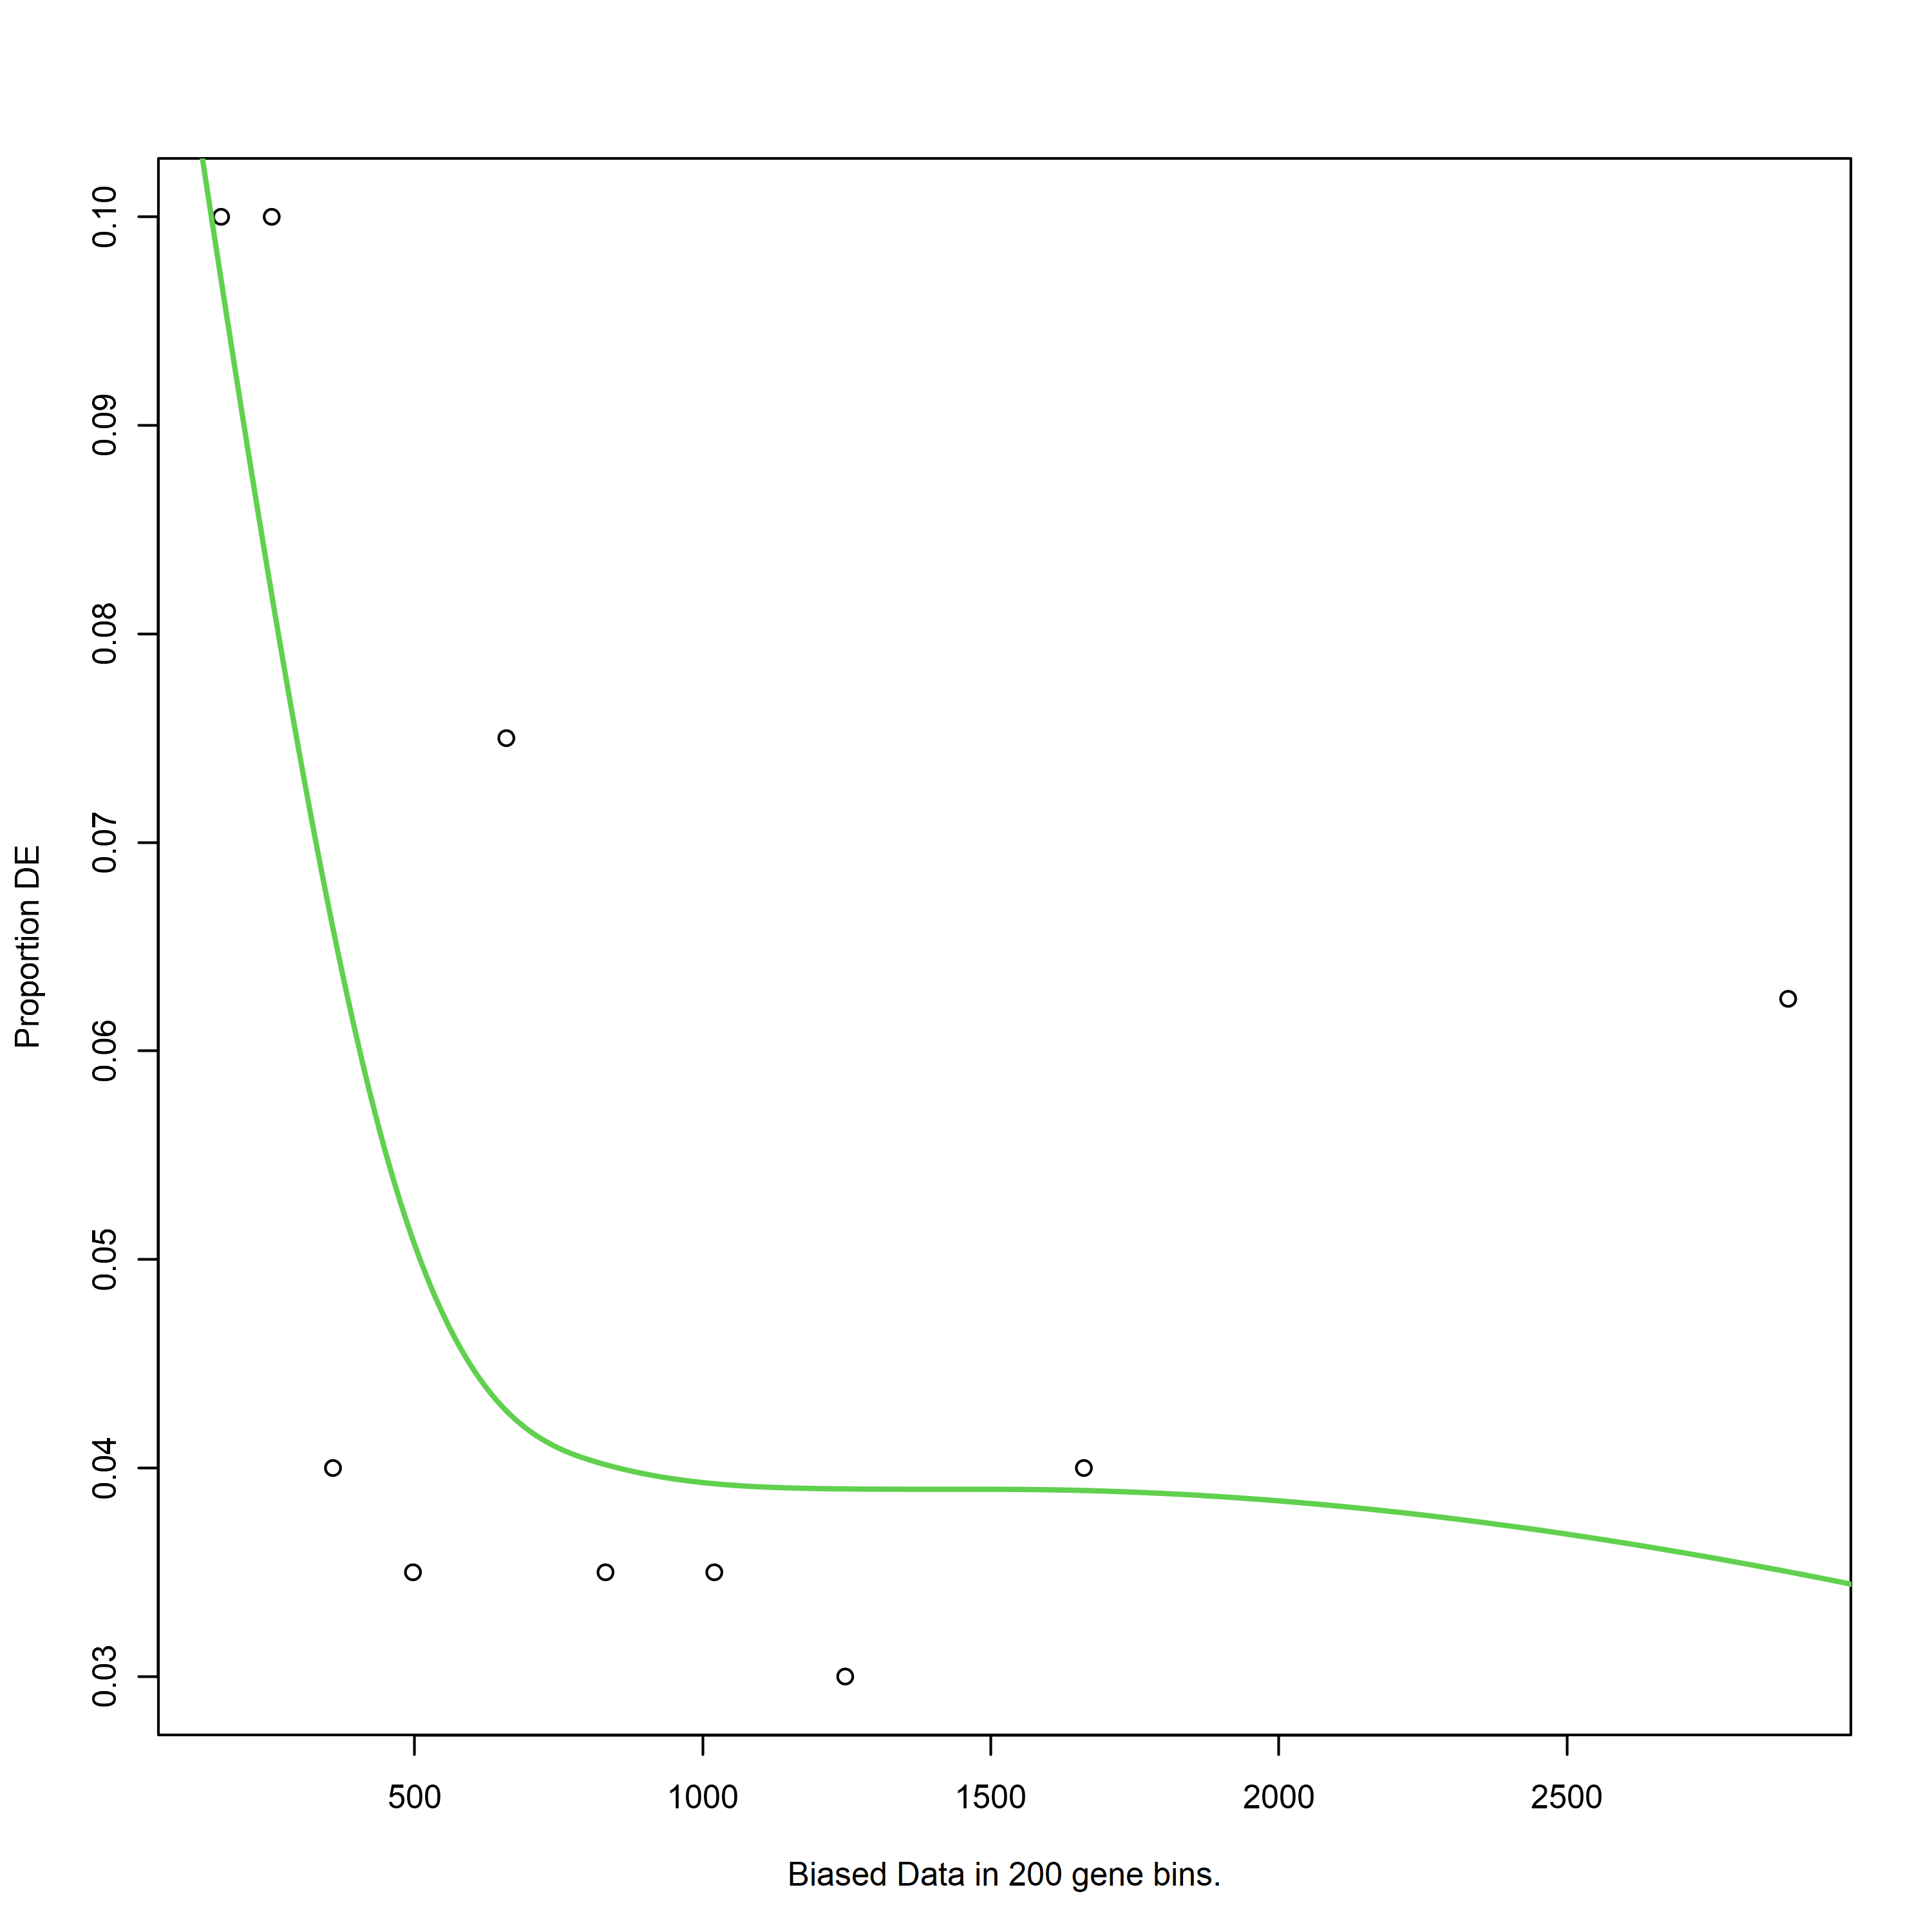

Using manually entered categories.

For 818 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...



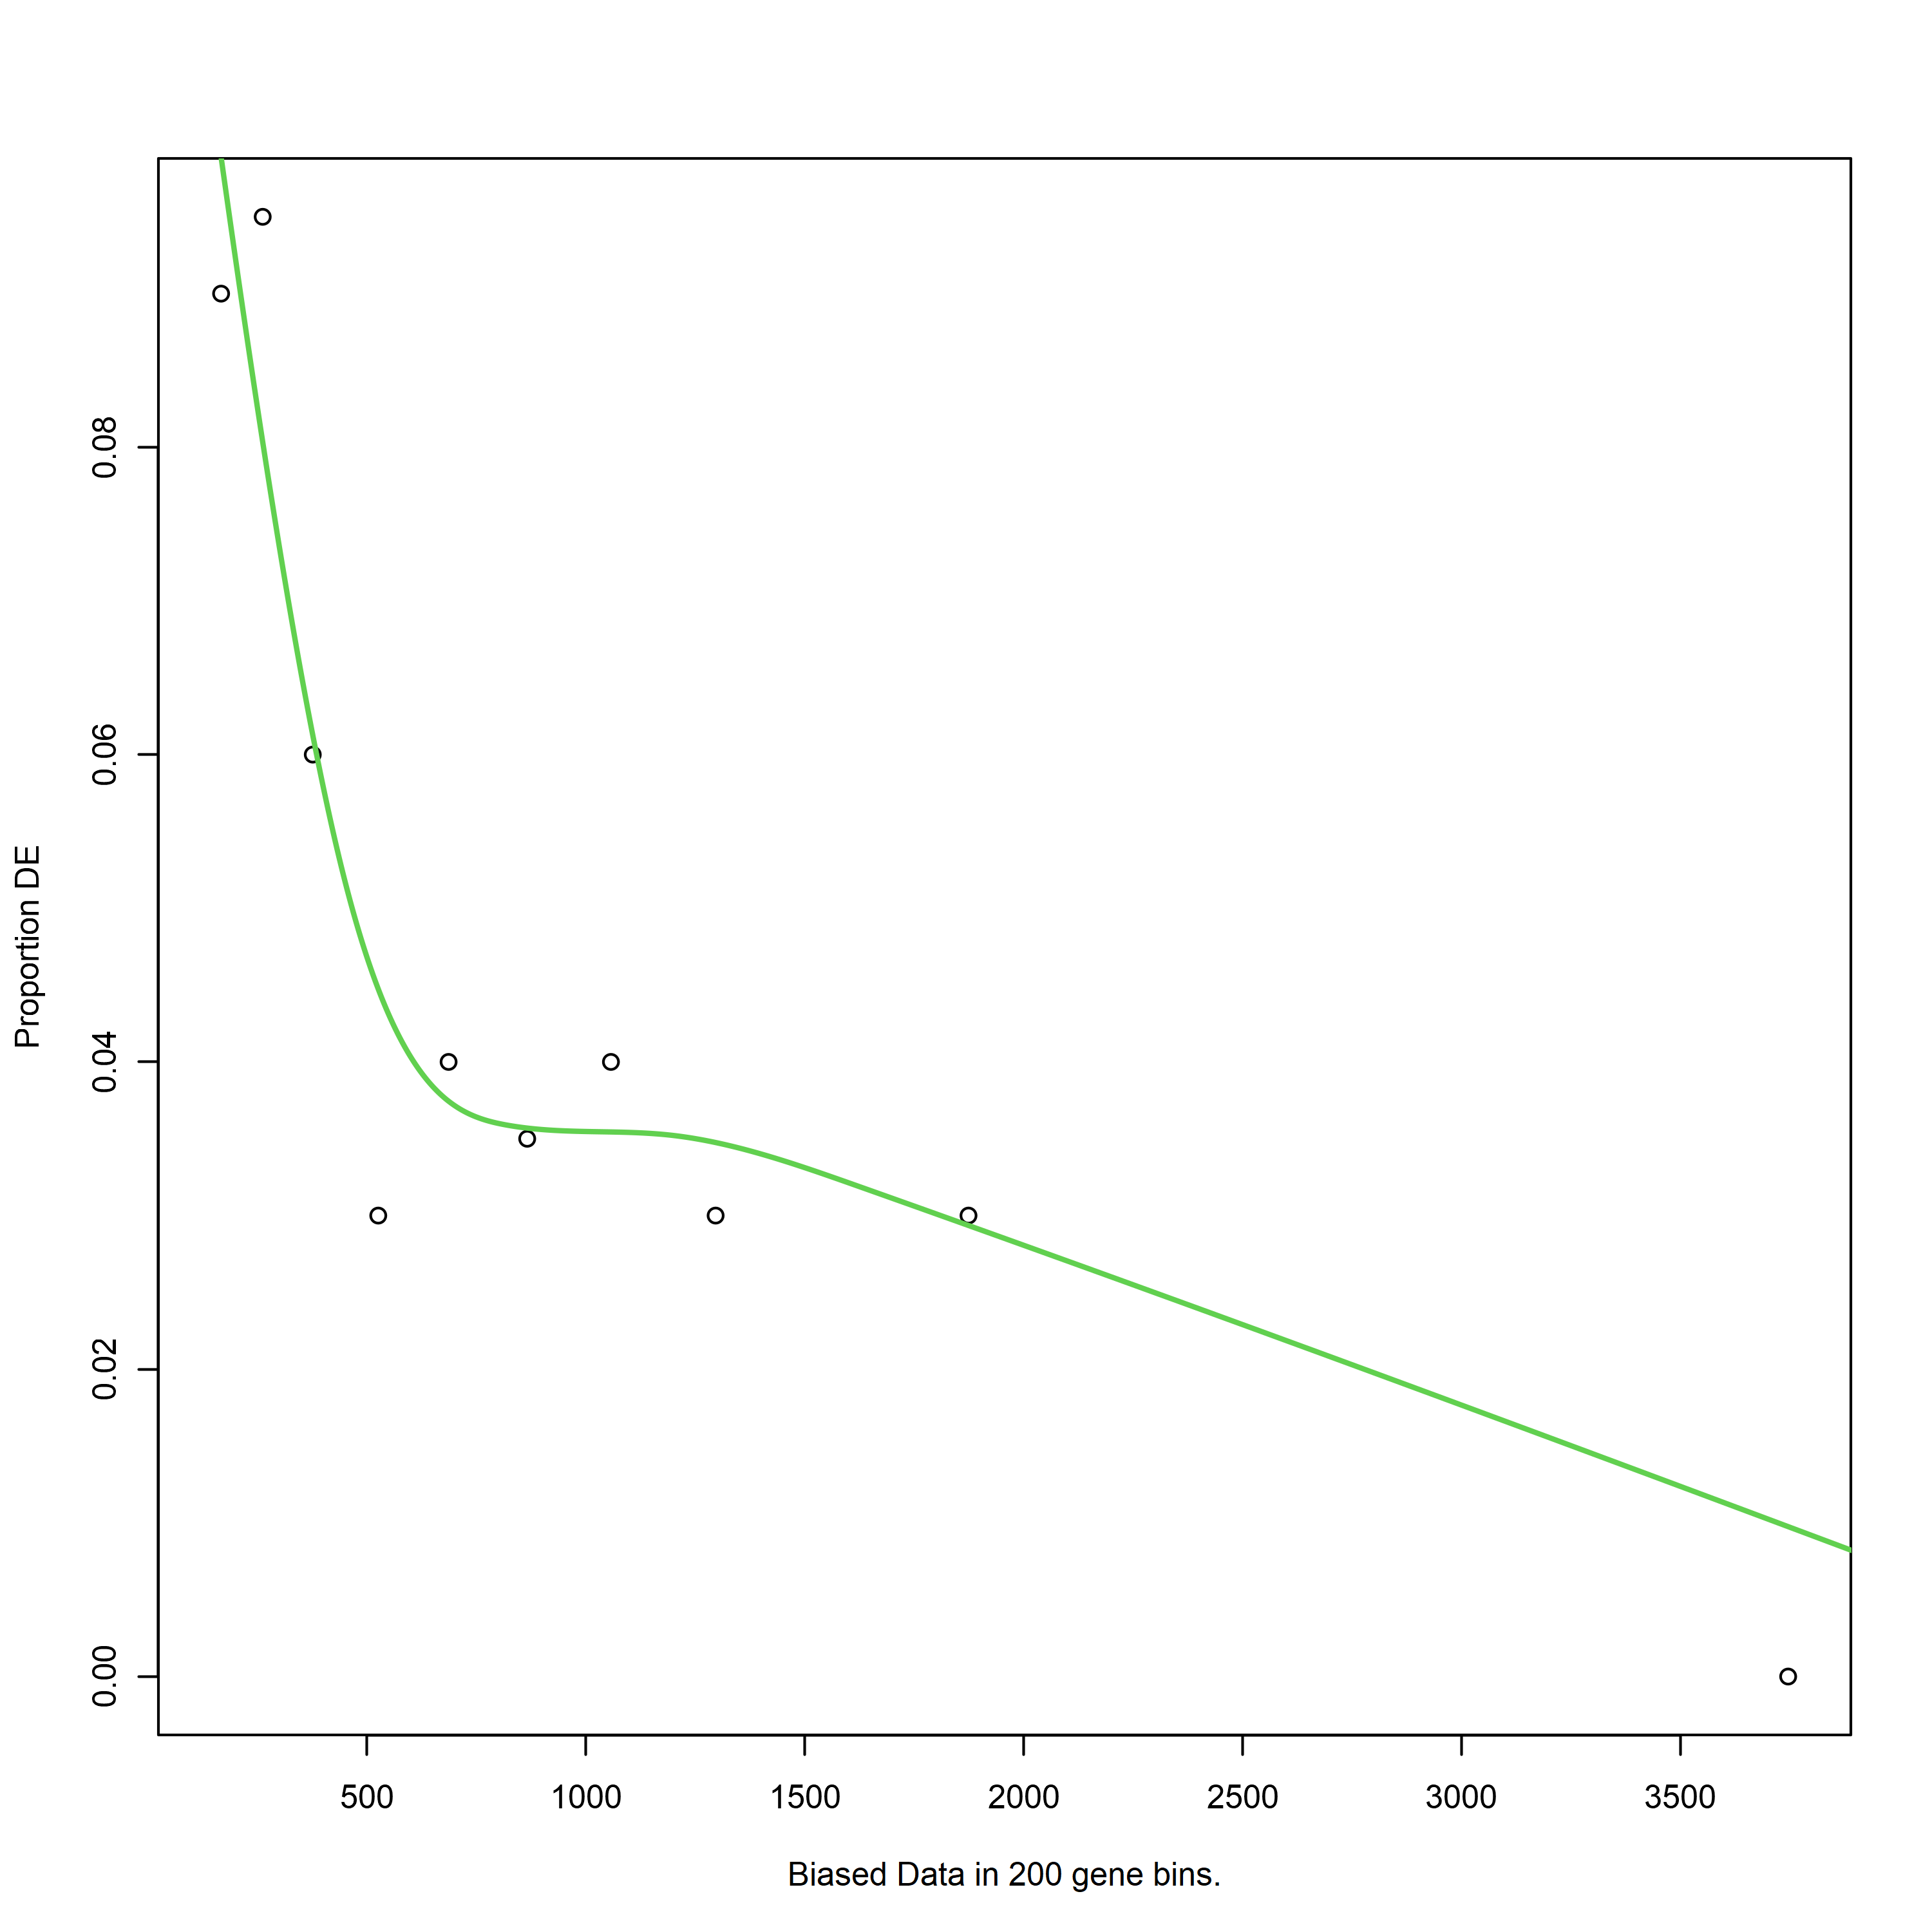

In [34]:
dlist = list()

for (contrastname in unique(df_all$contrast1)) 
{
    for (col in c('sub' ,'path')  #, 'main','ecpath')
             ) 
        {
        for (test in c('is_de')) 
            {
              dlist[[length(dlist) + 1]] <- run_enrichment(contrastname, col, test)
        }

    }
}
goseq_res = bind_rows(dlist)


In [35]:
t(goseq_res)

[,1]         [,2]         [,3]         [,4]        
category                 09101        09102        09183        09122       
over_represented_pvalue  3.732524e-03 1.599816e-02 3.714287e-02 4.320352e-02
padj                     9.331310e-02 1.999770e-01 2.700220e-01 2.700220e-01
under_represented_pvalue 9.984458e-01 9.923071e-01 9.795549e-01 9.795881e-01
numDEInCat                22           21           24           14         
numInCat                  90          105          128           74         
type                     is_de        is_de        is_de        is_de       
enrich                   sub          sub          sub          sub         
contrast                 C2vsC1_prot  C2vsC1_prot  C2vsC1_prot  C2vsC1_prot 
organism                 MED4         MED4         MED4         MED4        
                         [,5]         [,6]         [,7]         [,8]        
category                 09131        09111        09132        09182       
over_represented_pvalue  7.201734e-02 7.622804e-02 1.100652e-01 2.541968e-01
padj                     3.176168e-01 3.176168e-01 3.930900e-01 7.311753e-01
under_represented_pvalue 9.694974e-01 9.811611e-01 9.580418e-01 8.082757e-01
numDEInCat                 9            4            6           40         
numInCat                  41           14           27          275         
type                     is_de        is_de        is_de        is_de       
enrich                   sub          sub          sub          sub         
contrast                 C2vsC1_prot  C2vsC1_prot  C2vsC1_prot  C2vsC1_prot 
organism                 MED4         MED4         MED4         MED4        
                         [,9]         [,10]        [,11] [,12]       
category                 09104        09143        ⋯     03060       
over_represented_pvalue  2.632231e-01 3.336091e-01 ⋯     1.000000e+00
padj                     7.311753e-01 8.340228e-01 ⋯     1.000000e+00
under_represented_pvalue 8.466345e-01 8.656926e-01 ⋯     4.627007e-01
numDEInCat                 9            3          ⋯       0         
numInCat                  55           15          ⋯      15         
type                     is_de        is_de        ⋯     is_de       
enrich                   sub          sub          ⋯     path        
contrast                 C2vsC1_prot  C2vsC1_prot  ⋯     C5vsC4_rna  
organism                 MED4         MED4         ⋯     MED4        
                         [,13]        [,14]        [,15]        [,16]       
category                 03070        03110        03410        03420       
over_represented_pvalue  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
padj                     1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
under_represented_pvalue 5.416930e-01 3.875771e-01 7.262736e-01 7.910779e-01
numDEInCat                 0            0            0            0         
numInCat                  12           24            9            9         
type                     is_de        is_de        is_de        is_de       
enrich                   path         path         path         path        
contrast                 C5vsC4_rna   C5vsC4_rna   C5vsC4_rna   C5vsC4_rna  
organism                 MED4         MED4         MED4         MED4        
                         [,17]        [,18]        [,19]        [,20]       
category                 04122        04812        99985        99995       
over_represented_pvalue  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
padj                     1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
under_represented_pvalue 7.912693e-01 7.746220e-01 7.322338e-01 8.047158e-01
numDEInCat                 0            0            0            0         
numInCat                   5            6            5            5         
type                     is_de        is_de        is_de        is_de       
enrich                   path         path         path         path        
contrast             

In [36]:
duplicated_sub_list = c("09102 Energy metabolism", "09181 Protein families: metabolism", 
"09183 Protein families: signaling and cellular processes", "09191 Unclassified: metabolism", 
"09193 Unclassified: signaling and cellular processes")
duplicated_category_list = c( "Energy/Carbohydrate/Glycan", "Env. Info/Cellular Process", "Metabolism" )

sub_names_df = kegg_df %>% 
    distinct(main, sub, Category)  %>% filter(main != '') %>%
    #mutate(duplicate = (Category %in% duplicated_sub_list) | !(Category %in% duplicated_category_list))
    filter(!(
        (sub %in% duplicated_sub_list) & 
        !(Category %in% duplicated_category_list)
    )) %>%
    filter(!(
        (sub == '09191 Unclassified: metabolism') & !(Category  == 'Energy/Carbohydrate/Glycan')
    )) %>%
    mutate(
        PATH = sub,
        enrich = 'sub',
        category = word(PATH)
    )
    
path_names_df  = kegg_df %>% 
    distinct(main, sub, path, Category)  %>% filter(main != '') %>%
    
    mutate(
        PATH = path,
        enrich = 'path',
        category = word(PATH)
    )


final_names_df = bind_rows(sub_names_df, path_names_df) 

In [37]:
final_names_df %>% filter(category %in% (final_names_df %>% count(category) %>% filter(n>1))$category) %>% arrange(category)

main sub Category PATH enrich category path

In [38]:
goseq_res = left_join(goseq_res, final_names_df, by=c('category', 'enrich')) 

In [39]:
goseq_res

category over_represented_pvalue padj        under_represented_pvalue
1    09101    3.732524e-03            0.093313096 0.99844585              
2    09102    1.599816e-02            0.199977014 0.99230706              
3    09183    3.714287e-02            0.270022022 0.97955487              
4    09122    4.320352e-02            0.270022022 0.97958809              
5    09131    7.201734e-02            0.317616820 0.96949740              
6    09111    7.622804e-02            0.317616820 0.98116112              
7    09132    1.100652e-01            0.393089964 0.95804183              
8    09182    2.541968e-01            0.731175287 0.80827565              
9    09104    2.632231e-01            0.731175287 0.84663454              
10   09143    3.336091e-01            0.834022756 0.86569258              
11   09105    3.720954e-01            0.845671452 0.73224608              
12   09106    4.614711e-01            0.961398168 0.72574548              
13   09123    6.041341e-01            1.000000000 0.61008608              
14   09124    6.965180e-01            1.000000000 0.48679527              
15   09192    7.016209e-01            1.000000000 0.68386777              
16   09145    8.411302e-01            1.000000000 0.37907790              
17   09110    8.508267e-01            1.000000000 0.36072864              
18   09191    8.554397e-01            1.000000000 0.28725842              
19   09109    8.727098e-01            1.000000000 0.32222770              
20   09194    9.010560e-01            1.000000000 0.26569931              
21   09108    9.400637e-01            1.000000000 0.10563804              
22   09103    9.579221e-01            1.000000000 0.18656737              
23   09181    9.884271e-01            1.000000000 0.02370371              
24   09107    9.945574e-01            1.000000000 0.03668274              
25   09193    1.000000e+00            1.000000000 0.25628407              
26   00910    1.307705e-05            0.001268474 1.00000000              
27   03011    5.690925e-04            0.027600985 0.99985588              
28   03010    1.668605e-03            0.053951550 0.99954291              
29   00680    3.980320e-03            0.096522766 0.99945728              
30   00020    5.019864e-03            0.097385363 0.99946343              
⋮    ⋮        ⋮                       ⋮           ⋮                       
3955 00920    1                       1           0.6508178               
3956 00970    1                       1           0.4558319               
3957 00983    1                       1           0.7011689               
3958 01003    1                       1           0.7845009               
3959 01004    1                       1           0.6429837               
3960 01005    1                       1           0.7446398               
3961 01006    1                       1           0.7498168               
3962 01011    1                       1           0.4970895               
3963 02020    1                       1           0.4487846               
3964 02022    1                       1           0.7529778               
3965 02024    1                       1           0.5225943               
3966 02026    1                       1           0.8087675               
3967 02044    1                       1           0.4645030               
3968 02048    1                       1           0.8081673               
3969 03000    1                       1           0.6586726               
3970 03012    1                       1           0.5070456               
3971 03018    1                       1           0.7219788               
3972 03019    1                       1           0.6957434               
3973 03021    1                       1           0.6489303               
3974 03036    1                       1           0.4075713               
3975 03060    1                       1           0.4627007               
3976 03070    1               

In [40]:
goseq_res = goseq_res %>% 
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
#    extract(main, c("Category"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
#    mutate(pathway = str_replace(pathway, "in photosynthetic organisms", "")) %>%
#    mutate(Category = word(Category)) %>%
    mutate(pathway = str_trim(pathway), #Category = str_trim(Category)
          ) 



In [41]:
goseq_res = goseq_res %>% 
    extract(sub, c("module"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
    mutate(module = str_replace(module, "in photosynthetic organisms", "")) %>%
    mutate(module = str_replace(module, "metabolism", "")) %>%
    mutate(module = str_replace(module, "Biosynthesis of", "")) %>%
    mutate(module = str_replace(module, "Metabolism of", "")) %>%
    mutate(module = str_replace(module, "biosynthesis", "")) %>%
    mutate(module = str_trim(module)) 



In [42]:
t(head(goseq_res))

1                            
category                 09101                        
over_represented_pvalue  0.003732524                  
padj                     0.0933131                    
under_represented_pvalue 0.9984458                    
numDEInCat               22                           
numInCat                  90                          
type                     is_de                        
enrich                   sub                          
contrast                 C2vsC1_prot                  
organism                 MED4                         
main                     09100 Metabolism             
sub                      09101 Carbohydrate metabolism
module                   Carbohydrate                 
Category                 Energy/Carbohydrate/Glycan   
PATH                     09101 Carbohydrate metabolism
pathway                  Carbohydrate metabolism      
path                     NA                           
                         2                         
category                 09102                     
over_represented_pvalue  0.015998161               
padj                     0.1999770                 
under_represented_pvalue 0.9923071                 
numDEInCat               21                        
numInCat                 105                       
type                     is_de                     
enrich                   sub                       
contrast                 C2vsC1_prot               
organism                 MED4                      
main                     09100 Metabolism          
sub                      09102 Energy metabolism   
module                   Energy                    
Category                 Energy/Carbohydrate/Glycan
PATH                     09102 Energy metabolism   
pathway                  Energy metabolism         
path                     NA                        
                         3                                                       
category                 09183                                                   
over_represented_pvalue  0.037142870                                             
padj                     0.2700220                                               
under_represented_pvalue 0.9795549                                               
numDEInCat               24                                                      
numInCat                 128                                                     
type                     is_de                                                   
enrich                   sub                                                     
contrast                 C2vsC1_prot                                             
organism                 MED4                                                    
main                     09180 Brite Hierarchies                                 
sub                      09183 Protein families: signaling and cellular processes
module                   Protein families: signaling and cellular processes      
Category                 Env. Info/Cellular Process                              
PATH                     09183 Protein families: signaling and cellular processes
pathway                  Protein families: signaling and cellular processes      
path                     NA                                                      
                         4                                   
category                 09122                               
over_represented_pvalue  0.043203524                         
padj                     0.2700220                           
under_represented_pvalue 0.9795881                           
numDEInCat               14                                  
numInCat                  74                                 
type                     is_de                               
enrich                   sub                                 
contrast                 C2vsC1_prot                         
org

In [43]:
goseq_res %>% write_csv(file.path('DE_results', 'MED4_GOSEQ_results_isDE.csv'))

In [49]:
top10 = goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  #filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(path %in% top10$PATH) %>% select(main,sub, path) %>% distinct() %>% arrange(main)

main                   
1  09100 Metabolism       
2  09100 Metabolism       
3  09100 Metabolism       
4  09100 Metabolism       
5  09100 Metabolism       
6  09100 Metabolism       
7  09100 Metabolism       
8  09100 Metabolism       
9  09100 Metabolism       
10 09100 Metabolism       
11 09100 Metabolism       
12 09100 Metabolism       
13 09100 Metabolism       
14 09180 Brite Hierarchies
15 09180 Brite Hierarchies
16 09180 Brite Hierarchies
17 09180 Brite Hierarchies
18 09180 Brite Hierarchies
19 09180 Brite Hierarchies
20 09180 Brite Hierarchies
21 09180 Brite Hierarchies
   sub                                                     
1  09108 Metabolism of cofactors and vitamins              
2  09106 Metabolism of other amino acids                   
3  09102 Energy metabolism                                 
4  09109 Metabolism of terpenoids and polyketides          
5  09101 Carbohydrate metabolism                           
6  09109 Metabolism of terpenoids and polyketides          
7  09105 Amino acid metabolism                             
8  09102 Energy metabolism                                 
9  09101 Carbohydrate metabolism                           
10 09105 Amino acid metabolism                             
11 09102 Energy metabolism                                 
12 09101 Carbohydrate metabolism                           
13 09108 Metabolism of cofactors and vitamins              
14 09182 Protein families: genetic information processing  
15 09183 Protein families: signaling and cellular processes
16 09181 Protein families: metabolism                      
17 09181 Protein families: metabolism                      
18 09183 Protein families: signaling and cellular processes
19 09183 Protein families: signaling and cellular processes
20 09182 Protein families: genetic information processing  
21 09181 Protein families: metabolism                      
   path                                                            
1  00860 Porphyrin metabolism [PATH:ko00860]                       
2  00450 Selenocompound metabolism [PATH:ko00450]                  
3  00920 Sulfur metabolism [PATH:ko00920]                          
4  00906 Carotenoid biosynthesis [PATH:ko00906]                    
5  00520 Amino sugar and nucleotide sugar metabolism [PATH:ko00520]
6  00900 Terpenoid backbone biosynthesis [PATH:ko00900]            
7  00270 Cysteine and methionine metabolism [PATH:ko00270]         
8  00910 Nitrogen metabolism [PATH:ko00910]                        
9  00030 Pentose phosphate pathway [PATH:ko00030]                  
10 00260 Glycine, serine and threonine metabolism [PATH:ko00260]   
11 00680 Methane metabolism [PATH:ko00680]                         
12 00500 Starch and sucrose metabolism [PATH:ko00500]              
13 00670 One carbon pool by folate [PATH:ko00670]                  
14 03021 Transcription machinery [BR:ko03021]                      
15 02000 Transporters [BR:ko02000]                                 
16 01002 Peptidases and inhibitors [BR:ko01002]                    
17 01003 Glycosyltransferases [BR:ko01003]                         
18 02048 Prokaryotic defense system [BR:ko02048]                   
19 02022 Two-component system [BR:ko02022]                         
20 03011 Ribosome [BR:ko03011]                                     
21 00194 Photosynthesis proteins [BR:ko00194]

In [50]:
top10 = goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  #filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(sub %in% top10$PATH) %>% select(main,sub) %>% distinct() %>% arrange(main)

main                                      
1  09100 Metabolism                          
2  09100 Metabolism                          
3  09100 Metabolism                          
4  09100 Metabolism                          
5  09100 Metabolism                          
6  09100 Metabolism                          
7  09100 Metabolism                          
8  09130 Environmental Information Processing
9  09180 Brite Hierarchies                   
10 09180 Brite Hierarchies                   
11 09180 Brite Hierarchies                   
   sub                                                     
1  09104 Nucleotide metabolism                             
2  09108 Metabolism of cofactors and vitamins              
3  09105 Amino acid metabolism                             
4  09106 Metabolism of other amino acids                   
5  09102 Energy metabolism                                 
6  09109 Metabolism of terpenoids and polyketides          
7  09101 Carbohydrate metabolism                           
8  09132 Signal transduction                               
9  09182 Protein families: genetic information processing  
10 09183 Protein families: signaling and cellular processes
11 09181 Protein families: metabolism

In [46]:
head(goseq_res)

category over_represented_pvalue padj      under_represented_pvalue
1 09101    0.003732524             0.0933131 0.9984458               
2 09102    0.015998161             0.1999770 0.9923071               
3 09183    0.037142870             0.2700220 0.9795549               
4 09122    0.043203524             0.2700220 0.9795881               
5 09131    0.072017338             0.3176168 0.9694974               
6 09111    0.076228037             0.3176168 0.9811611               
  numDEInCat numInCat type  enrich contrast    organism
1 22          90      is_de sub    C2vsC1_prot MED4    
2 21         105      is_de sub    C2vsC1_prot MED4    
3 24         128      is_de sub    C2vsC1_prot MED4    
4 14          74      is_de sub    C2vsC1_prot MED4    
5  9          41      is_de sub    C2vsC1_prot MED4    
6  4          14      is_de sub    C2vsC1_prot MED4    
  main                                      
1 09100 Metabolism                          
2 09100 Metabolism                          
3 09180 Brite Hierarchies                   
4 09120 Genetic Information Processing      
5 09130 Environmental Information Processing
6 09100 Metabolism                          
  sub                                                     
1 09101 Carbohydrate metabolism                           
2 09102 Energy metabolism                                 
3 09183 Protein families: signaling and cellular processes
4 09122 Translation                                       
5 09131 Membrane transport                                
6 09111 Xenobiotics biodegradation and metabolism         
  module                                             Category                  
1 Carbohydrate                                       Energy/Carbohydrate/Glycan
2 Energy                                             Energy/Carbohydrate/Glycan
3 Protein families: signaling and cellular processes Env. Info/Cellular Process
4 Translation                                        Genetic Info              
5 Membrane transport                                 Membrane transport        
6 Xenobiotics biodegradation and                     Metabolism                
  PATH                                                    
1 09101 Carbohydrate metabolism                           
2 09102 Energy metabolism                                 
3 09183 Protein families: signaling and cellular processes
4 09122 Translation                                       
5 09131 Membrane transport                                
6 09111 Xenobiotics biodegradation and metabolism         
  pathway                                            path
1 Carbohydrate metabolism                            NA  
2 Energy metabolism                                  NA  
3 Protein families: signaling and cellular processes NA  
4 Translation                                        NA  
5 Membrane transport                                 NA  
6 Xenobiotics biodegradation and metabolism          NA

In [47]:
goseq_meta = goseq_res %>% distinct(contrast) %>% 
    separate_wider_delim(contrast, "_", names = c(NA, "Assay"), cols_remove = FALSE) %>%
    mutate(Group = case_when(
        str_detect(contrast, "C1")~ "Coculture", 
        str_detect(contrast, "3|5")~ "Axenic late", 
        TRUE~ "Axenic"
    )) %>% 
    mutate(
        Group = factor(Group, levels=c("Coculture", "Axenic", "Axenic late")),
        Assay = factor(Assay, levels=c("rna", "prot"))
          ) %>%
    arrange(Group, Assay, contrast) %>%
    column_to_rownames('contrast') 
goseq_meta 

Assay Group      
C1vsP1_rna    rna   Coculture  
C2vsC1_rna    rna   Coculture  
C3vsC1_rna    rna   Coculture  
C4vsC1_rna    rna   Coculture  
C5vsC1_rna    rna   Coculture  
LATEvsC1_rna  rna   Coculture  
C2vsC1_prot   prot  Coculture  
C3vsC1_prot   prot  Coculture  
C4vsC1_prot   prot  Coculture  
C5vsC1_prot   prot  Coculture  
LATEvsC1_prot prot  Coculture  
LATEvsC2_rna  rna   Axenic     
LATEvsP1_rna  rna   Axenic     
LATEvsP2_rna  rna   Axenic     
P2vsP1_rna    rna   Axenic     
C4vsC2_prot   prot  Axenic     
LATEvsC2_prot prot  Axenic     
LATEvsP1_prot prot  Axenic     
LATEvsP2_prot prot  Axenic     
P2vsP1_prot   prot  Axenic     
C3vsC2_rna    rna   Axenic late
C4vsC3_rna    rna   Axenic late
C5vsC3_rna    rna   Axenic late
C5vsC4_rna    rna   Axenic late
LATEvsC3_rna  rna   Axenic late
C3vsC2_prot   prot  Axenic late
C4vsC3_prot   prot  Axenic late
C5vsC2_prot   prot  Axenic late
C5vsC3_prot   prot  Axenic late
C5vsC4_prot   prot  Axenic late
LATEvsC3_prot prot  Axenic late
P3vsP1_prot   prot  Axenic late
P5vsP1_prot   prot  Axenic late

In [48]:
sessionInfo()

R version 4.2.2 (2022-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 26100)

Matrix products: default

locale:
[1] LC_COLLATE=English_Israel.utf8  LC_CTYPE=English_Israel.utf8   
[3] LC_MONETARY=English_Israel.utf8 LC_NUMERIC=C                   
[5] LC_TIME=English_Israel.utf8    

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ComplexHeatmap_2.14.0       ggrepel_0.9.3              
 [3] ComplexUpset_1.3.3          circlize_0.4.15            
 [5] corrplot_0.92               pheatmap_1.0.12            
 [7] lubridate_1.9.2             forcats_1.0.0              
 [9] stringr_1.5.0               dplyr_1.1.0                
[11] purrr_1.0.1                 readr_2.1.4                
[13] tidyr_1.3.0                 tibble_3.1.8               
[15] tidyverse_2.0.0             readxl_1.4.2               
[17] goseq_1.50.0                gen